In [1]:
import pandas as pd
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import ADASYN
from sklearn.ensemble import GradientBoostingClassifier,StackingClassifier,AdaBoostClassifier,RandomForestClassifier,VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, plot_confusion_matrix,f1_score,precision_score,recall_score,RocCurveDisplay,PrecisionRecallDisplay
from sklearn.model_selection import train_test_split
rs = 0

In [2]:
#To prevent warnings being displayed
import sys
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore") #ignoring the warnings

In [3]:
#Splitting the dataset into train dataset and test dataset
data_df = pd.read_csv("data_df.csv")
data_df_features = data_df.drop(columns=["class","unique_id"]) #Extracting Features
data_df_class = data_df[["class"]] #Saving only Class labels

X_train, X_test, y_train, y_test = train_test_split(data_df_features, data_df_class, test_size=0.20, random_state=rs, stratify = data_df_class)

In [4]:
#Function to obtain different metrics based on predicted class labels
def print_metrics(y_test,y_pred,name):
    cm = confusion_matrix(y_test, y_pred) #Computing the Confusion Matrix
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues") #Initializing the Heatmap
    plt.xlabel("Predicted Labels") #Setting x label
    plt.ylabel("Actual Labels") #Setting y label
    plt.title("Confusion Matrix Obtained") #Setting the title
    plt.show(); #Showing the plot
    f1_value = round(f1_score(y_test,y_pred,labels=np.unique(y_pred),average='macro'),4) #Calculating F1-score value
    prec = round(precision_score(y_test,y_pred,labels=np.unique(y_pred),average='macro'),4) #Calculating Precision value
    rec = round(recall_score(y_test,y_pred,labels=np.unique(y_pred),average='macro'),4) #Calculating Recall value
    print("F1-score obtained is ",f1_value) #Printing F1-score value
    print("Precision obtained is ",prec) #Printing Precision value
    print("Recall obtained is ",rec) #Printing Recall value
    print("Classification Report obtained is :")
    print(classification_report(y_test, y_pred))
    return [f1_value,prec,rec] #return f1-score, precision and recall

In [6]:
best_results_table = []

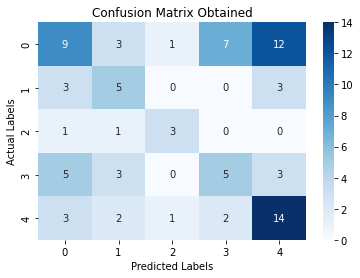

F1-score obtained is  0.4383
Precision obtained is  0.4361
Recall obtained is  0.4569
Classification Report obtained is :
              precision    recall  f1-score   support

           0       0.43      0.28      0.34        32
           1       0.36      0.45      0.40        11
           2       0.60      0.60      0.60         5
           3       0.36      0.31      0.33        16
           4       0.44      0.64      0.52        22

    accuracy                           0.42        86
   macro avg       0.44      0.46      0.44        86
weighted avg       0.42      0.42      0.41        86



In [7]:
dt_pca_pipeline = Pipeline(steps=[('adasyn', ADASYN(random_state=0)),('pca', PCA(n_components=82,random_state=rs)),
                ('dt',
                 DecisionTreeClassifier(max_depth=5, min_samples_leaf=50,
                                        random_state=0))])
dt_pca_pipeline.fit(X_train,y_train)
dt_pca_pipeline_yPred = dt_pca_pipeline.predict(X_test)
dt_list = ["Decision Tree ADASYN - After Hyperparameter Tuning and Feature Selection based on PCA"]
dt_list.extend(print_metrics(y_test, dt_pca_pipeline_yPred,"Decision Tree - PCA"))
best_results_table.append(dt_list)

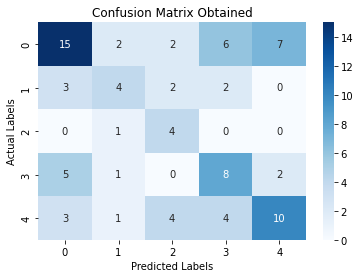

F1-score obtained is  0.464
Precision obtained is  0.4562
Recall obtained is  0.5174
Classification Report obtained is :
              precision    recall  f1-score   support

           0       0.58      0.47      0.52        32
           1       0.44      0.36      0.40        11
           2       0.33      0.80      0.47         5
           3       0.40      0.50      0.44        16
           4       0.53      0.45      0.49        22

    accuracy                           0.48        86
   macro avg       0.46      0.52      0.46        86
weighted avg       0.50      0.48      0.48        86



In [8]:
knn_pca_pipeline = Pipeline(steps=[('adasyn', ADASYN(random_state=0)),('pca' , PCA(n_components=227,random_state=rs)),
                ('knn',KNeighborsClassifier(n_neighbors=1))])
knn_pca_pipeline.fit(X_train,y_train)
knn_pca_pipeline_yPred = knn_pca_pipeline.predict(X_test)
knn_list = ["KNN ADASYN- After Hyperparameter Tuning and Feature Selection based on PCA"]
knn_list.extend(print_metrics(y_test, knn_pca_pipeline_yPred,"KNN - PCA"))
best_results_table.append(knn_list)

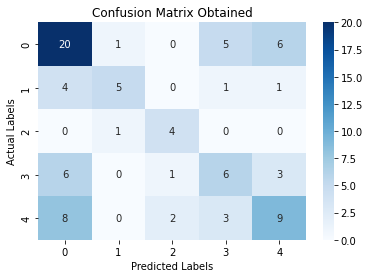

F1-score obtained is  0.524
Precision obtained is  0.5371
Recall obtained is  0.5327
Classification Report obtained is :
              precision    recall  f1-score   support

           0       0.53      0.62      0.57        32
           1       0.71      0.45      0.56        11
           2       0.57      0.80      0.67         5
           3       0.40      0.38      0.39        16
           4       0.47      0.41      0.44        22

    accuracy                           0.51        86
   macro avg       0.54      0.53      0.52        86
weighted avg       0.52      0.51      0.51        86



In [9]:
svm_pca_pipeline = Pipeline(steps=[('adasyn', ADASYN(random_state=0)),('pca' , PCA(n_components=80,random_state=rs)),
                ('svm', SVC(C=11.288378916846883, random_state=0))])
svm_pca_pipeline.fit(X_train,y_train)
svm_pca_pipeline_yPred = svm_pca_pipeline.predict(X_test)
svm_list = ["SVM ADASYN- After Hyperparameter Tuning and Feature Selection based on PCA"]
svm_list.extend(print_metrics(y_test, svm_pca_pipeline_yPred,"SVM - PCA"))
best_results_table.append(svm_list)

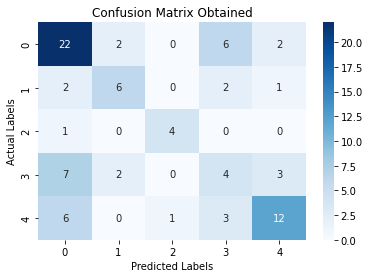

F1-score obtained is  0.5716
Precision obtained is  0.5825
Recall obtained is  0.5657
Classification Report obtained is :
              precision    recall  f1-score   support

           0       0.58      0.69      0.63        32
           1       0.60      0.55      0.57        11
           2       0.80      0.80      0.80         5
           3       0.27      0.25      0.26        16
           4       0.67      0.55      0.60        22

    accuracy                           0.56        86
   macro avg       0.58      0.57      0.57        86
weighted avg       0.56      0.56      0.55        86



In [10]:
rf_pca_pipeline = Pipeline(steps=[('adasyn', ADASYN(random_state=0)),('pca',PCA(n_components=48,random_state=rs)),
                ('rf', RandomForestClassifier(max_depth=15, random_state=0))])
rf_pca_pipeline.fit(X_train,y_train)
rf_pca_pipeline_yPred = rf_pca_pipeline.predict(X_test)
rf_list = ["RF ADASYN- After Hyperparameter Tuning and Feature Selection based on PCA"]
rf_list.extend(print_metrics(y_test, rf_pca_pipeline_yPred,"RF - PCA"))
best_results_table.append(rf_list)

In [11]:
best_results_table

[['Decision Tree ADASYN - After Hyperparameter Tuning and Feature Selection based on PCA',
  0.4383,
  0.4361,
  0.4569],
 ['KNN ADASYN- After Hyperparameter Tuning and Feature Selection based on PCA',
  0.464,
  0.4562,
  0.5174],
 ['SVM ADASYN- After Hyperparameter Tuning and Feature Selection based on PCA',
  0.524,
  0.5371,
  0.5327],
 ['RF ADASYN- After Hyperparameter Tuning and Feature Selection based on PCA',
  0.5716,
  0.5825,
  0.5657]]

In [12]:
#Tabulating the obtained results and displaying the results by formatting
results_df = pd.DataFrame(best_results_table,columns = ["Classifier","f1-score","Precision","Recall"])
with pd.option_context('display.precision', 4):
    formatted_table=(results_df.style.background_gradient(cmap ='Blues'))
formatted_table

,Classifier,f1-score,Precision,Recall
0,Decision Tree ADASYN - After Hyperparameter Tuning and Feature Selection based on PCA,0.4383,0.4361,0.4569
1,KNN ADASYN- After Hyperparameter Tuning and Feature Selection based on PCA,0.4640,0.4562,0.5174
2,SVM ADASYN- After Hyperparameter Tuning and Feature Selection based on PCA,0.5240,0.5371,0.5327
3,RF ADASYN- After Hyperparameter Tuning and Feature Selection based on PCA,0.5716,0.5825,0.5657


In [13]:
stack_estimators = [dt_pca_pipeline,knn_pca_pipeline,svm_pca_pipeline,rf_pca_pipeline]
stack_estimators = {str(model)+"_pipeline" : estimator for estimator, model in zip(stack_estimators,["dt","knn","svm","rf"])}
print(stack_estimators)

{'dt_pipeline': Pipeline(steps=[('adasyn', ADASYN(random_state=0)),
                ('pca', PCA(n_components=82, random_state=0)),
                ('dt',
                 DecisionTreeClassifier(max_depth=5, min_samples_leaf=50,
                                        random_state=0))]), 'knn_pipeline': Pipeline(steps=[('adasyn', ADASYN(random_state=0)),
                ('pca', PCA(n_components=227, random_state=0)),
                ('knn', KNeighborsClassifier(n_neighbors=1))]), 'svm_pipeline': Pipeline(steps=[('adasyn', ADASYN(random_state=0)),
                ('pca', PCA(n_components=80, random_state=0)),
                ('svm', SVC(C=11.288378916846883, random_state=0))]), 'rf_pipeline': Pipeline(steps=[('adasyn', ADASYN(random_state=0)),
                ('pca', PCA(n_components=48, random_state=0)),
                ('rf', RandomForestClassifier(max_depth=15, random_state=0))])}


In [14]:
stack_results = dict()
stack_results_table = []

Results when Random Forest is used as Stacking Classifier


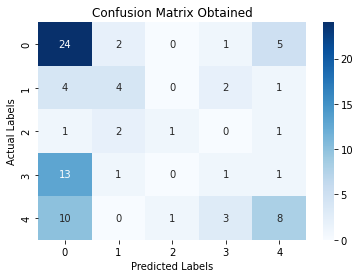

F1-score obtained is  0.353
Precision obtained is  0.4098
Recall obtained is  0.348
Classification Report obtained is :
              precision    recall  f1-score   support

           0       0.46      0.75      0.57        32
           1       0.44      0.36      0.40        11
           2       0.50      0.20      0.29         5
           3       0.14      0.06      0.09        16
           4       0.50      0.36      0.42        22

    accuracy                           0.44        86
   macro avg       0.41      0.35      0.35        86
weighted avg       0.41      0.44      0.40        86



In [16]:
from sklearn.base import clone
for model,model_name in zip([RandomForestClassifier(random_state=rs)],["Random Forest"]):
    stacking = StackingClassifier([(estName, clone(est)) for estName, est in stack_estimators.items()], model)
    stacking.fit(X_train, y_train)
    stack_results[f'{model.__class__.__name__}'+"_yPred"] = stacking.predict(X_test)
    stack_list = [f'{model.__class__.__name__}'+" - Stacking Classifier"]
    print("Results when {} is used as Stacking Classifier".format(model_name))
    stack_list.extend(print_metrics(y_test, stack_results[f'{model.__class__.__name__}'+"_yPred"], f'{model.__class__.__name__}'+" - Stacking Classifier"))
    stack_results_table.append(stack_list)

Results when AdaBoost is used as Stacking Classifier


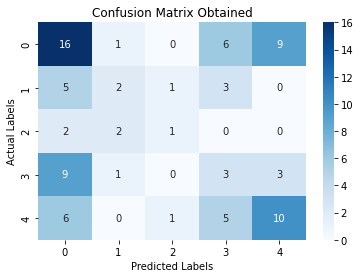

F1-score obtained is  0.3158
Precision obtained is  0.3437
Recall obtained is  0.3048
Classification Report obtained is :
              precision    recall  f1-score   support

           0       0.42      0.50      0.46        32
           1       0.33      0.18      0.24        11
           2       0.33      0.20      0.25         5
           3       0.18      0.19      0.18        16
           4       0.45      0.45      0.45        22

    accuracy                           0.37        86
   macro avg       0.34      0.30      0.32        86
weighted avg       0.37      0.37      0.36        86



In [16]:
from sklearn.base import clone
for model,model_name in zip([AdaBoostClassifier(random_state = rs)],["AdaBoost"]):
    stacking = StackingClassifier([(estName, clone(est)) for estName, est in stack_estimators.items()], model)
    stacking.fit(X_train, y_train)
    stack_results[f'{model.__class__.__name__}'+"_yPred"] = stacking.predict(X_test)
    stack_list = [f'{model.__class__.__name__}'+" - Stacking Classifier"]
    print("Results when {} is used as Stacking Classifier".format(model_name))
    stack_list.extend(print_metrics(y_test, stack_results[f'{model.__class__.__name__}'+"_yPred"], f'{model.__class__.__name__}'+" - Stacking Classifier"))
    stack_results_table.append(stack_list)

[16:02:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Results when XGBoost is used as Stacking Classifier


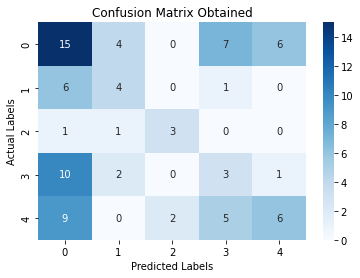

F1-score obtained is  0.381
Precision obtained is  0.3957
Recall obtained is  0.3785
Classification Report obtained is :
              precision    recall  f1-score   support

           0       0.37      0.47      0.41        32
           1       0.36      0.36      0.36        11
           2       0.60      0.60      0.60         5
           3       0.19      0.19      0.19        16
           4       0.46      0.27      0.34        22

    accuracy                           0.36        86
   macro avg       0.40      0.38      0.38        86
weighted avg       0.37      0.36      0.36        86



In [17]:
from xgboost import XGBClassifier
for model,model_name in zip([XGBClassifier(objective="binary:logistic", random_state=rs)],["XGBoost"]):
    stacking = StackingClassifier([(estName, clone(est)) for estName, est in stack_estimators.items()], model)
    stacking.fit(X_train, y_train)
    stack_results[f'{model.__class__.__name__}'+"_yPred"] = stacking.predict(X_test)
    stack_list = [f'{model.__class__.__name__}'+" - Stacking Classifier"]
    print("Results when {} is used as Stacking Classifier".format(model_name))
    stack_list.extend(print_metrics(y_test, stack_results[f'{model.__class__.__name__}'+"_yPred"], f'{model.__class__.__name__}'+" - Stacking Classifier"))
    stack_results_table.append(stack_list)

Results when Gradient-Boosted Decision Tree is used as Stacking Classifier


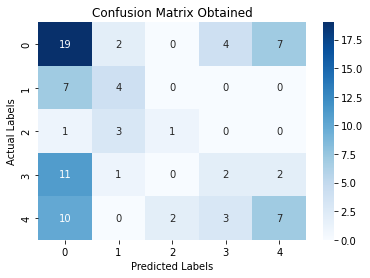

F1-score obtained is  0.3269
Precision obtained is  0.3578
Recall obtained is  0.3201
Classification Report obtained is :
              precision    recall  f1-score   support

           0       0.40      0.59      0.48        32
           1       0.40      0.36      0.38        11
           2       0.33      0.20      0.25         5
           3       0.22      0.12      0.16        16
           4       0.44      0.32      0.37        22

    accuracy                           0.38        86
   macro avg       0.36      0.32      0.33        86
weighted avg       0.37      0.38      0.36        86



In [18]:
for model,model_name in zip([GradientBoostingClassifier(random_state = rs)],["Gradient-Boosted Decision Tree"]):
    stacking = StackingClassifier([(estName, clone(est)) for estName, est in stack_estimators.items()], model)
    stacking.fit(X_train, y_train)
    stack_results[f'{model.__class__.__name__}'+"_yPred"] = stacking.predict(X_test)
    stack_list = [f'{model.__class__.__name__}'+" - Stacking Classifier"]
    print("Results when {} is used as Stacking Classifier".format(model_name))
    stack_list.extend(print_metrics(y_test, stack_results[f'{model.__class__.__name__}'+"_yPred"], f'{model.__class__.__name__}'+" - Stacking Classifier"))
    stack_results_table.append(stack_list)

Results when Decision Tree is used as Stacking Classifier


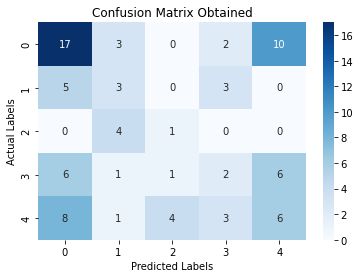

F1-score obtained is  0.2739
Precision obtained is  0.2723
Recall obtained is  0.2803
Classification Report obtained is :
              precision    recall  f1-score   support

           0       0.47      0.53      0.50        32
           1       0.25      0.27      0.26        11
           2       0.17      0.20      0.18         5
           3       0.20      0.12      0.15        16
           4       0.27      0.27      0.27        22

    accuracy                           0.34        86
   macro avg       0.27      0.28      0.27        86
weighted avg       0.32      0.34      0.33        86



In [19]:
for model,model_name in zip([DecisionTreeClassifier(random_state=rs)],["Decision Tree"]):
    stacking = StackingClassifier([(estName, clone(est)) for estName, est in stack_estimators.items()], model)
    stacking.fit(X_train, y_train)
    stack_results[f'{model.__class__.__name__}'+"_yPred"] = stacking.predict(X_test)
    stack_list = [f'{model.__class__.__name__}'+" - Stacking Classifier"]
    print("Results when {} is used as Stacking Classifier".format(model_name))
    stack_list.extend(print_metrics(y_test, stack_results[f'{model.__class__.__name__}'+"_yPred"], f'{model.__class__.__name__}'+" - Stacking Classifier"))
    stack_results_table.append(stack_list)

In [20]:
stack_results_table

[['AdaBoostClassifier - Stacking Classifier', 0.3158, 0.3437, 0.3048],
 ['XGBClassifier - Stacking Classifier', 0.381, 0.3957, 0.3785],
 ['GradientBoostingClassifier - Stacking Classifier', 0.3269, 0.3578, 0.3201],
 ['DecisionTreeClassifier - Stacking Classifier', 0.2739, 0.2723, 0.2803]]

In [21]:
#Tabulating the obtained results and displaying the results by formatting
results_df = pd.DataFrame(stack_results_table,columns = ["Classifier","f1-score","Precision","Recall"])
with pd.option_context('display.precision', 4):
    formatted_table=(results_df.style.background_gradient(cmap ='Blues'))
formatted_table

,Classifier,f1-score,Precision,Recall
0,AdaBoostClassifier - Stacking Classifier,0.3158,0.3437,0.3048
1,XGBClassifier - Stacking Classifier,0.3810,0.3957,0.3785
2,GradientBoostingClassifier - Stacking Classifier,0.3269,0.3578,0.3201
3,DecisionTreeClassifier - Stacking Classifier,0.2739,0.2723,0.2803


{'dt_pipeline': Pipeline(steps=[('adasyn', ADASYN(random_state=0)),
                ('pca', PCA(n_components=82, random_state=0)),
                ('dt',
                 DecisionTreeClassifier(max_depth=5, min_samples_leaf=50,
                                        random_state=0))]), 'knn_pipeline': Pipeline(steps=[('adasyn', ADASYN(random_state=0)),
                ('pca', PCA(n_components=227, random_state=0)),
                ('knn', KNeighborsClassifier(n_neighbors=1))]), 'svm_pipeline': Pipeline(steps=[('adasyn', ADASYN(random_state=0)),
                ('pca', PCA(n_components=80, random_state=0)),
                ('svm', SVC(C=11.288378916846883, random_state=0))]), 'rf_pipeline': Pipeline(steps=[('adasyn', ADASYN(random_state=0)),
                ('pca', PCA(n_components=48, random_state=0)),
                ('rf', RandomForestClassifier(max_depth=15, random_state=0))])}
Results when {} is used as Voting Classifier


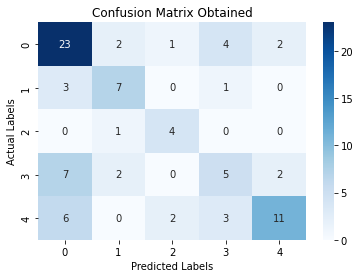

F1-score obtained is  0.5725
Precision obtained is  0.5725
Recall obtained is  0.5935
Classification Report obtained is :
              precision    recall  f1-score   support

           0       0.59      0.72      0.65        32
           1       0.58      0.64      0.61        11
           2       0.57      0.80      0.67         5
           3       0.38      0.31      0.34        16
           4       0.73      0.50      0.59        22

    accuracy                           0.58        86
   macro avg       0.57      0.59      0.57        86
weighted avg       0.59      0.58      0.57        86



In [22]:
stack_estimators = [dt_pca_pipeline,knn_pca_pipeline,svm_pca_pipeline,rf_pca_pipeline]
stack_estimators = {str(model)+"_pipeline" : estimator for estimator, model in zip(stack_estimators,["dt","knn","svm","rf"])}
print(stack_estimators)

stack_results = dict()
stack_results_table = []
voting_classifier = VotingClassifier([(estName, clone(est)) for estName, est in stack_estimators.items()], voting='hard')
model = voting_classifier
voting_classifier.fit(X_train, y_train)
stack_results[f'{model.__class__.__name__}'+"_yPred"] = voting_classifier.predict(X_test)
stack_list = [f'{model.__class__.__name__}'+" - Stacking Classifier"]
print("Results when {} is used as Voting Classifier")
stack_list.extend(print_metrics(y_test, stack_results[f'{model.__class__.__name__}'+"_yPred"], f'{model.__class__.__name__}'+" - Stacking Classifier"))
stack_results_table.append(stack_list)

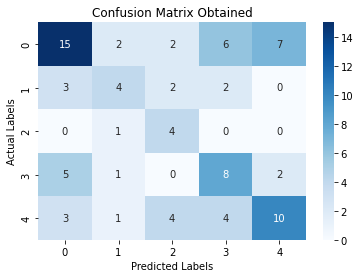

F1-score obtained is  0.464
Precision obtained is  0.4562
Recall obtained is  0.5174
Classification Report obtained is :
              precision    recall  f1-score   support

           0       0.58      0.47      0.52        32
           1       0.44      0.36      0.40        11
           2       0.33      0.80      0.47         5
           3       0.40      0.50      0.44        16
           4       0.53      0.45      0.49        22

    accuracy                           0.48        86
   macro avg       0.46      0.52      0.46        86
weighted avg       0.50      0.48      0.48        86



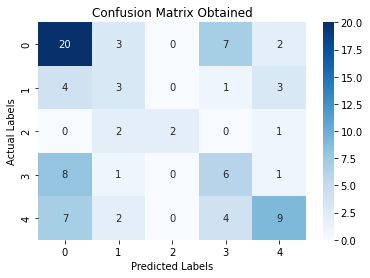

F1-score obtained is  0.4468
Precision obtained is  0.5363
Recall obtained is  0.4164
Classification Report obtained is :
              precision    recall  f1-score   support

           0       0.51      0.62      0.56        32
           1       0.27      0.27      0.27        11
           2       1.00      0.40      0.57         5
           3       0.33      0.38      0.35        16
           4       0.56      0.41      0.47        22

    accuracy                           0.47        86
   macro avg       0.54      0.42      0.45        86
weighted avg       0.49      0.47      0.46        86



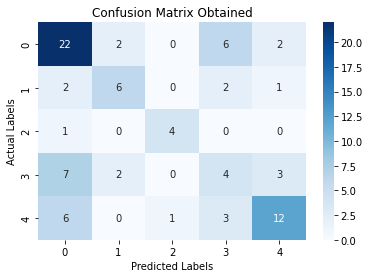

F1-score obtained is  0.5716
Precision obtained is  0.5825
Recall obtained is  0.5657
Classification Report obtained is :
              precision    recall  f1-score   support

           0       0.58      0.69      0.63        32
           1       0.60      0.55      0.57        11
           2       0.80      0.80      0.80         5
           3       0.27      0.25      0.26        16
           4       0.67      0.55      0.60        22

    accuracy                           0.56        86
   macro avg       0.58      0.57      0.57        86
weighted avg       0.56      0.56      0.55        86



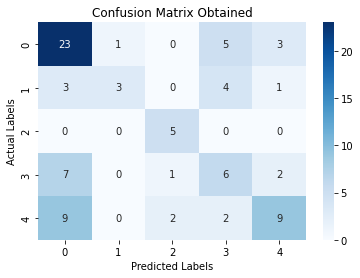

F1-score obtained is  0.5282
Precision obtained is  0.5751
Recall obtained is  0.5551
Classification Report obtained is :
              precision    recall  f1-score   support

           0       0.55      0.72      0.62        32
           1       0.75      0.27      0.40        11
           2       0.62      1.00      0.77         5
           3       0.35      0.38      0.36        16
           4       0.60      0.41      0.49        22

    accuracy                           0.53        86
   macro avg       0.58      0.56      0.53        86
weighted avg       0.56      0.53      0.52        86



,Classifier,f1-score,Precision,Recall
0,KNN ADASYN- After Hyperparameter Tuning and Feature Selection based on PCA,0.4640,0.4562,0.5174
1,Decision Tree - After Hyperparameter Tuning and Feature Selection based on PCA,0.4468,0.5363,0.4164
2,RF ADASYN- After Hyperparameter Tuning and Feature Selection based on PCA,0.5716,0.5825,0.5657
3,SVM ADASYN,0.5282,0.5751,0.5551


In [23]:
best_results_table = []

knn_pca_pipeline = Pipeline(steps=[('adasyn', ADASYN(random_state=0)),('pca' , PCA(n_components=227,random_state=rs)),
                ('knn',KNeighborsClassifier(n_neighbors=1))])
knn_pca_pipeline.fit(X_train,y_train)
knn_pca_pipeline_yPred = knn_pca_pipeline.predict(X_test)
knn_list = ["KNN ADASYN- After Hyperparameter Tuning and Feature Selection based on PCA"]
knn_list.extend(print_metrics(y_test, knn_pca_pipeline_yPred,"KNN - PCA"))
best_results_table.append(knn_list)

dt = DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=10, random_state=0)
pca = PCA(n_components=102,random_state=rs)
dt_pca_pipeline = Pipeline([('pca', pca), ('dt', dt)])
dt_pca_pipeline.fit(X_train,y_train)
dt_pca_pipeline_yPred = dt_pca_pipeline.predict(X_test)
dt_list = ["Decision Tree - After Hyperparameter Tuning and Feature Selection based on PCA"]
dt_list.extend(print_metrics(y_test, dt_pca_pipeline_yPred,"Decision Tree - PCA"))
best_results_table.append(dt_list)

rf_pca_pipeline = Pipeline(steps=[('adasyn', ADASYN(random_state=0)),('pca',PCA(n_components=48,random_state=rs)),
                ('rf', RandomForestClassifier(max_depth=15, random_state=0))])
rf_pca_pipeline.fit(X_train,y_train)
rf_pca_pipeline_yPred = rf_pca_pipeline.predict(X_test)
rf_list = ["RF ADASYN- After Hyperparameter Tuning and Feature Selection based on PCA"]
rf_list.extend(print_metrics(y_test, rf_pca_pipeline_yPred,"RF - PCA"))
best_results_table.append(rf_list)

svm_pca_pipeline = Pipeline(steps=[('adasyn', ADASYN(random_state=0)),
                ('svm', SVC(C=11.288378916846883, random_state=0))])
svm_pca_pipeline.fit(X_train,y_train)
svm_pca_pipeline_yPred = svm_pca_pipeline.predict(X_test)
svm_list = ["SVM ADASYN"]
svm_list.extend(print_metrics(y_test, svm_pca_pipeline_yPred,"SVM - PCA"))
best_results_table.append(svm_list)

#Tabulating the obtained results and displaying the results by formatting
results_df = pd.DataFrame(best_results_table,columns = ["Classifier","f1-score","Precision","Recall"])
with pd.option_context('display.precision', 4):
    formatted_table=(results_df.style.background_gradient(cmap ='Blues'))
formatted_table

{'dt_pipeline': Pipeline(steps=[('pca', PCA(n_components=102, random_state=0)),
                ('dt',
                 DecisionTreeClassifier(criterion='entropy', max_depth=5,
                                        min_samples_leaf=10, random_state=0))]), 'knn_pipeline': Pipeline(steps=[('adasyn', ADASYN(random_state=0)),
                ('pca', PCA(n_components=227, random_state=0)),
                ('knn', KNeighborsClassifier(n_neighbors=1))]), 'svm_pipeline': Pipeline(steps=[('adasyn', ADASYN(random_state=0)),
                ('svm', SVC(C=11.288378916846883, random_state=0))]), 'rf_pipeline': Pipeline(steps=[('adasyn', ADASYN(random_state=0)),
                ('pca', PCA(n_components=48, random_state=0)),
                ('rf', RandomForestClassifier(max_depth=15, random_state=0))])}
Results when {} is used as Voting Classifier


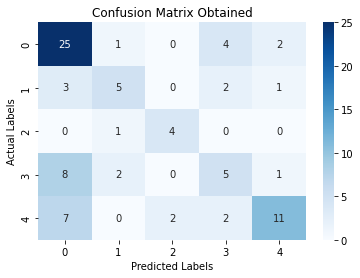

F1-score obtained is  0.5667
Precision obtained is  0.5843
Recall obtained is  0.5697
Classification Report obtained is :
              precision    recall  f1-score   support

           0       0.58      0.78      0.67        32
           1       0.56      0.45      0.50        11
           2       0.67      0.80      0.73         5
           3       0.38      0.31      0.34        16
           4       0.73      0.50      0.59        22

    accuracy                           0.58        86
   macro avg       0.58      0.57      0.57        86
weighted avg       0.59      0.58      0.57        86



In [24]:
stack_estimators = [dt_pca_pipeline,knn_pca_pipeline,svm_pca_pipeline,rf_pca_pipeline]
stack_estimators = {str(model)+"_pipeline" : estimator for estimator, model in zip(stack_estimators,["dt","knn","svm","rf"])}
print(stack_estimators)

stack_results = dict()
stack_results_table = []
voting_classifier = VotingClassifier([(estName, clone(est)) for estName, est in stack_estimators.items()], voting='hard')
model = voting_classifier
voting_classifier.fit(X_train, y_train)
stack_results[f'{model.__class__.__name__}'+"_yPred"] = voting_classifier.predict(X_test)
stack_list = [f'{model.__class__.__name__}'+" - Stacking Classifier"]
print("Results when {} is used as Voting Classifier")
stack_list.extend(print_metrics(y_test, stack_results[f'{model.__class__.__name__}'+"_yPred"], f'{model.__class__.__name__}'+" - Stacking Classifier"))
stack_results_table.append(stack_list)

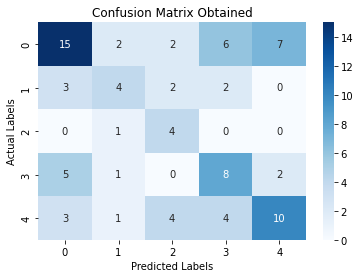

F1-score obtained is  0.464
Precision obtained is  0.4562
Recall obtained is  0.5174
Classification Report obtained is :
              precision    recall  f1-score   support

           0       0.58      0.47      0.52        32
           1       0.44      0.36      0.40        11
           2       0.33      0.80      0.47         5
           3       0.40      0.50      0.44        16
           4       0.53      0.45      0.49        22

    accuracy                           0.48        86
   macro avg       0.46      0.52      0.46        86
weighted avg       0.50      0.48      0.48        86



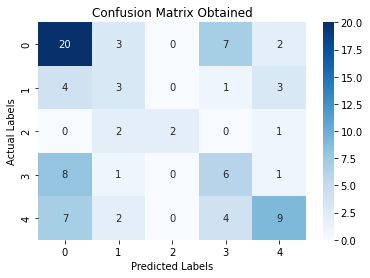

F1-score obtained is  0.4468
Precision obtained is  0.5363
Recall obtained is  0.4164
Classification Report obtained is :
              precision    recall  f1-score   support

           0       0.51      0.62      0.56        32
           1       0.27      0.27      0.27        11
           2       1.00      0.40      0.57         5
           3       0.33      0.38      0.35        16
           4       0.56      0.41      0.47        22

    accuracy                           0.47        86
   macro avg       0.54      0.42      0.45        86
weighted avg       0.49      0.47      0.46        86



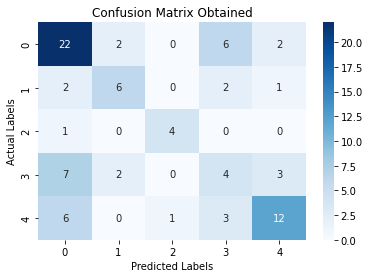

F1-score obtained is  0.5716
Precision obtained is  0.5825
Recall obtained is  0.5657
Classification Report obtained is :
              precision    recall  f1-score   support

           0       0.58      0.69      0.63        32
           1       0.60      0.55      0.57        11
           2       0.80      0.80      0.80         5
           3       0.27      0.25      0.26        16
           4       0.67      0.55      0.60        22

    accuracy                           0.56        86
   macro avg       0.58      0.57      0.57        86
weighted avg       0.56      0.56      0.55        86



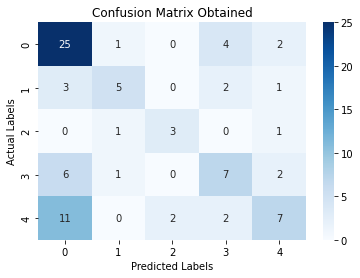

F1-score obtained is  0.5255
Precision obtained is  0.5571
Recall obtained is  0.5183
Classification Report obtained is :
              precision    recall  f1-score   support

           0       0.56      0.78      0.65        32
           1       0.62      0.45      0.53        11
           2       0.60      0.60      0.60         5
           3       0.47      0.44      0.45        16
           4       0.54      0.32      0.40        22

    accuracy                           0.55        86
   macro avg       0.56      0.52      0.53        86
weighted avg       0.55      0.55      0.53        86



,Classifier,f1-score,Precision,Recall
0,KNN ADASYN- After Hyperparameter Tuning and Feature Selection based on PCA,0.4640,0.4562,0.5174
1,Decision Tree - After Hyperparameter Tuning and Feature Selection based on PCA,0.4468,0.5363,0.4164
2,RF ADASYN- After Hyperparameter Tuning and Feature Selection based on PCA,0.5716,0.5825,0.5657
3,SVM - After Hyperparameter Tuning and Feature Selection based on PCA,0.5255,0.5571,0.5183


In [25]:
best_results_table = []

knn_pca_pipeline = Pipeline(steps=[('adasyn', ADASYN(random_state=0)),('pca' , PCA(n_components=227,random_state=rs)),
                ('knn',KNeighborsClassifier(n_neighbors=1))])
knn_pca_pipeline.fit(X_train,y_train)
knn_pca_pipeline_yPred = knn_pca_pipeline.predict(X_test)
knn_list = ["KNN ADASYN- After Hyperparameter Tuning and Feature Selection based on PCA"]
knn_list.extend(print_metrics(y_test, knn_pca_pipeline_yPred,"KNN - PCA"))
best_results_table.append(knn_list)

dt = DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=10, random_state=0)
pca = PCA(n_components=102,random_state=rs)
dt_pca_pipeline = Pipeline([('pca', pca), ('dt', dt)])
dt_pca_pipeline.fit(X_train,y_train)
dt_pca_pipeline_yPred = dt_pca_pipeline.predict(X_test)
dt_list = ["Decision Tree - After Hyperparameter Tuning and Feature Selection based on PCA"]
dt_list.extend(print_metrics(y_test, dt_pca_pipeline_yPred,"Decision Tree - PCA"))
best_results_table.append(dt_list)

rf_pca_pipeline = Pipeline(steps=[('adasyn', ADASYN(random_state=0)),('pca',PCA(n_components=48,random_state=rs)),
                ('rf', RandomForestClassifier(max_depth=15, random_state=0))])
rf_pca_pipeline.fit(X_train,y_train)
rf_pca_pipeline_yPred = rf_pca_pipeline.predict(X_test)
rf_list = ["RF ADASYN- After Hyperparameter Tuning and Feature Selection based on PCA"]
rf_list.extend(print_metrics(y_test, rf_pca_pipeline_yPred,"RF - PCA"))
best_results_table.append(rf_list)

svm = SVC(C=29.763514416313132, random_state=0)
pca = PCA(n_components=76,random_state=rs)

svm_pca_pipeline = Pipeline([('pca', pca), ('svm', svm)])
svm_pca_pipeline.fit(X_train,y_train)
svm_pca_pipeline_yPred = svm_pca_pipeline.predict(X_test)
svm_list = ["SVM - After Hyperparameter Tuning and Feature Selection based on PCA"]
svm_list.extend(print_metrics(y_test, svm_pca_pipeline_yPred,"SVM - PCA"))
best_results_table.append(svm_list)

#Tabulating the obtained results and displaying the results by formatting
results_df = pd.DataFrame(best_results_table,columns = ["Classifier","f1-score","Precision","Recall"])
with pd.option_context('display.precision', 4):
    formatted_table=(results_df.style.background_gradient(cmap ='Blues'))
formatted_table

{'dt_pipeline': Pipeline(steps=[('pca', PCA(n_components=102, random_state=0)),
                ('dt',
                 DecisionTreeClassifier(criterion='entropy', max_depth=5,
                                        min_samples_leaf=10, random_state=0))]), 'knn_pipeline': Pipeline(steps=[('adasyn', ADASYN(random_state=0)),
                ('pca', PCA(n_components=227, random_state=0)),
                ('knn', KNeighborsClassifier(n_neighbors=1))]), 'svm_pipeline': Pipeline(steps=[('pca', PCA(n_components=76, random_state=0)),
                ('svm', SVC(C=29.763514416313132, random_state=0))]), 'rf_pipeline': Pipeline(steps=[('adasyn', ADASYN(random_state=0)),
                ('pca', PCA(n_components=48, random_state=0)),
                ('rf', RandomForestClassifier(max_depth=15, random_state=0))])}
Results when {} is used as Voting Classifier


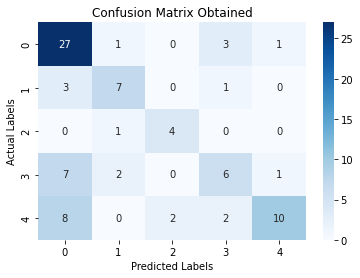

F1-score obtained is  0.6163
Precision obtained is  0.6473
Recall obtained is  0.6219
Classification Report obtained is :
              precision    recall  f1-score   support

           0       0.60      0.84      0.70        32
           1       0.64      0.64      0.64        11
           2       0.67      0.80      0.73         5
           3       0.50      0.38      0.43        16
           4       0.83      0.45      0.59        22

    accuracy                           0.63        86
   macro avg       0.65      0.62      0.62        86
weighted avg       0.65      0.63      0.61        86



In [26]:
stack_estimators = [dt_pca_pipeline,knn_pca_pipeline,svm_pca_pipeline,rf_pca_pipeline]
stack_estimators = {str(model)+"_pipeline" : estimator for estimator, model in zip(stack_estimators,["dt","knn","svm","rf"])}
print(stack_estimators)

stack_results = dict()
stack_results_table = []
voting_classifier = VotingClassifier([(estName, clone(est)) for estName, est in stack_estimators.items()], voting='hard')
model = voting_classifier
voting_classifier.fit(X_train, y_train)
stack_results[f'{model.__class__.__name__}'+"_yPred"] = voting_classifier.predict(X_test)
stack_list = [f'{model.__class__.__name__}'+" - Stacking Classifier"]
print("Results when {} is used as Voting Classifier")
stack_list.extend(print_metrics(y_test, stack_results[f'{model.__class__.__name__}'+"_yPred"], f'{model.__class__.__name__}'+" - Stacking Classifier"))
stack_results_table.append(stack_list)

In [45]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_validate
knn_pca_pipeline = Pipeline(steps=[('adasyn', ADASYN(random_state=0)),('pca' , PCA(n_components=227,random_state=rs)),
                ('knn',KNeighborsClassifier(n_neighbors=1))])

dt_pca_pipeline = Pipeline([('pca', PCA(n_components=102,random_state=rs)), 
                            ('dt', DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=10, random_state=0))])

rf_pca_pipeline = Pipeline(steps=[('adasyn', ADASYN(random_state=0)),('pca',PCA(n_components=48,random_state=rs)),
                ('rf', RandomForestClassifier(max_depth=15, random_state=0))])

svm_pca_pipeline = Pipeline([('pca', PCA(n_components=76,random_state=rs)), 
                             ('svm', SVC(C=29.763514416313132, random_state=0))])

stack_estimators = [dt_pca_pipeline,knn_pca_pipeline,svm_pca_pipeline,rf_pca_pipeline]
stack_estimators = {str(model)+"_pipeline" : estimator for estimator, model in zip(stack_estimators,["dt","knn","svm","rf"])}
print(stack_estimators)

voting_classifier = VotingClassifier([(estName, clone(est)) for estName, est in stack_estimators.items()], voting='hard')

_scoring = ['f1_macro']


results = cross_validate(estimator=voting_classifier,
                               X=data_df_features,
                               y=data_df_class,
                               cv=5,
                               scoring=_scoring,
                               return_train_score=True)

{'dt_pipeline': Pipeline(steps=[('pca', PCA(n_components=102, random_state=0)),
                ('dt',
                 DecisionTreeClassifier(criterion='entropy', max_depth=5,
                                        min_samples_leaf=10, random_state=0))]), 'knn_pipeline': Pipeline(steps=[('adasyn', ADASYN(random_state=0)),
                ('pca', PCA(n_components=227, random_state=0)),
                ('knn', KNeighborsClassifier(n_neighbors=1))]), 'svm_pipeline': Pipeline(steps=[('pca', PCA(n_components=76, random_state=0)),
                ('svm', SVC(C=29.763514416313132, random_state=0))]), 'rf_pipeline': Pipeline(steps=[('adasyn', ADASYN(random_state=0)),
                ('pca', PCA(n_components=48, random_state=0)),
                ('rf', RandomForestClassifier(max_depth=15, random_state=0))])}


In [46]:
results

{'fit_time': array([5.46398473, 5.71832252, 5.40290332, 6.09679914, 5.97711396]),
 'score_time': array([0.03798914, 0.03999209, 0.03900194, 0.03599906, 0.0409925 ]),
 'test_f1_macro': array([0.4470221 , 0.49277076, 0.3979451 , 0.41139063, 0.50385297]),
 'train_f1_macro': array([1., 1., 1., 1., 1.])}

In [47]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_validate
knn_pca_pipeline = Pipeline(steps=[('adasyn', ADASYN(random_state=0)),('pca' , PCA(n_components=227,random_state=rs)),
                ('knn',KNeighborsClassifier(n_neighbors=1))])

dt_pca_pipeline = Pipeline([('pca', PCA(n_components=102,random_state=rs)), 
                            ('dt', DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=10, random_state=0))])

rf_pca_pipeline = Pipeline(steps=[('adasyn', ADASYN(random_state=0)),('pca',PCA(n_components=48,random_state=rs)),
                ('rf', RandomForestClassifier(max_depth=15, random_state=0))])

svm_pca_pipeline = Pipeline([('pca', PCA(n_components=76,random_state=rs)), 
                             ('svm', SVC(C=29.763514416313132, random_state=0))])

stack_estimators = [dt_pca_pipeline,knn_pca_pipeline,svm_pca_pipeline,rf_pca_pipeline]
stack_estimators = {str(model)+"_pipeline" : estimator for estimator, model in zip(stack_estimators,["dt","knn","svm","rf"])}
print(stack_estimators)

voting_classifier = VotingClassifier([(estName, clone(est)) for estName, est in stack_estimators.items()], voting='hard')

_scoring = ['f1_macro']


results = cross_validate(estimator=voting_classifier,
                               X=X_train,
                               y=y_train,
                               cv=5,
                               scoring=_scoring,
                               return_train_score=True)

{'dt_pipeline': Pipeline(steps=[('pca', PCA(n_components=102, random_state=0)),
                ('dt',
                 DecisionTreeClassifier(criterion='entropy', max_depth=5,
                                        min_samples_leaf=10, random_state=0))]), 'knn_pipeline': Pipeline(steps=[('adasyn', ADASYN(random_state=0)),
                ('pca', PCA(n_components=227, random_state=0)),
                ('knn', KNeighborsClassifier(n_neighbors=1))]), 'svm_pipeline': Pipeline(steps=[('pca', PCA(n_components=76, random_state=0)),
                ('svm', SVC(C=29.763514416313132, random_state=0))]), 'rf_pipeline': Pipeline(steps=[('adasyn', ADASYN(random_state=0)),
                ('pca', PCA(n_components=48, random_state=0)),
                ('rf', RandomForestClassifier(max_depth=15, random_state=0))])}


In [48]:
results

{'fit_time': array([5.53116202, 5.20234609, 5.76893544, 5.61377621, 5.53368306]),
 'score_time': array([0.04599977, 0.03962421, 0.03799939, 0.02999067, 0.03100085]),
 'test_f1_macro': array([0.45833333, 0.33759777, 0.43188728, 0.38015385, 0.43416928]),
 'train_f1_macro': array([1., 1., 1., 1., 1.])}

Results when {} is used as Voting Classifier


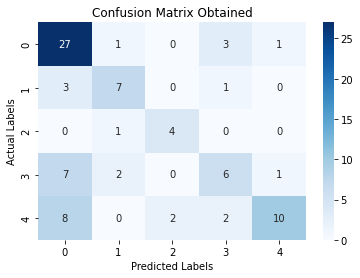

F1-score obtained is  0.6163
Precision obtained is  0.6473
Recall obtained is  0.6219
Classification Report obtained is :
              precision    recall  f1-score   support

           0       0.60      0.84      0.70        32
           1       0.64      0.64      0.64        11
           2       0.67      0.80      0.73         5
           3       0.50      0.38      0.43        16
           4       0.83      0.45      0.59        22

    accuracy                           0.63        86
   macro avg       0.65      0.62      0.62        86
weighted avg       0.65      0.63      0.61        86



In [49]:
voting_classifier.fit(X_train, y_train)
stack_results[f'{model.__class__.__name__}'+"_yPred"] = voting_classifier.predict(X_test)
stack_list = [f'{model.__class__.__name__}'+" - Stacking Classifier"]
print("Results when {} is used as Voting Classifier")
stack_list.extend(print_metrics(y_test, stack_results[f'{model.__class__.__name__}'+"_yPred"], f'{model.__class__.__name__}'+" - Stacking Classifier"))
stack_results_table.append(stack_list)

In [50]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_validate
from sklearn.preprocessing import MinMaxScaler
knn_pca_pipeline = Pipeline(steps=[('scaler',MinMaxScaler()),('adasyn', ADASYN(random_state=0)),('pca' , PCA(n_components=227,random_state=rs)),
                ('knn',KNeighborsClassifier(n_neighbors=1))])

dt_pca_pipeline = Pipeline([('scaler',MinMaxScaler()),('pca', PCA(n_components=102,random_state=rs)), 
                            ('dt', DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=10, random_state=0))])

rf_pca_pipeline = Pipeline([('scaler',MinMaxScaler()),('adasyn', ADASYN(random_state=0)),('pca',PCA(n_components=48,random_state=rs)),
                ('rf', RandomForestClassifier(max_depth=15, random_state=0))])

svm_pca_pipeline = Pipeline([('scaler',MinMaxScaler()),('pca', PCA(n_components=76,random_state=rs)), 
                             ('svm', SVC(C=29.763514416313132, random_state=0))])

stack_estimators = [dt_pca_pipeline,knn_pca_pipeline,svm_pca_pipeline,rf_pca_pipeline]
stack_estimators = {str(model)+"_pipeline" : estimator for estimator, model in zip(stack_estimators,["dt","knn","svm","rf"])}
print(stack_estimators)

voting_classifier = VotingClassifier([(estName, clone(est)) for estName, est in stack_estimators.items()], voting='hard')

_scoring = ['f1_macro']


results = cross_validate(estimator=voting_classifier,
                               X=data_df_features,
                               y=data_df_class,
                               cv=5,
                               scoring=_scoring,
                               return_train_score=True)

{'dt_pipeline': Pipeline(steps=[('scaler', MinMaxScaler()),
                ('pca', PCA(n_components=102, random_state=0)),
                ('dt',
                 DecisionTreeClassifier(criterion='entropy', max_depth=5,
                                        min_samples_leaf=10, random_state=0))]), 'knn_pipeline': Pipeline(steps=[('scaler', MinMaxScaler()), ('adasyn', ADASYN(random_state=0)),
                ('pca', PCA(n_components=227, random_state=0)),
                ('knn', KNeighborsClassifier(n_neighbors=1))]), 'svm_pipeline': Pipeline(steps=[('scaler', MinMaxScaler()),
                ('pca', PCA(n_components=76, random_state=0)),
                ('svm', SVC(C=29.763514416313132, random_state=0))]), 'rf_pipeline': Pipeline(steps=[('scaler', MinMaxScaler()), ('adasyn', ADASYN(random_state=0)),
                ('pca', PCA(n_components=48, random_state=0)),
                ('rf', RandomForestClassifier(max_depth=15, random_state=0))])}


In [51]:
results

{'fit_time': array([5.45191526, 5.3057487 , 4.84850931, 5.28672457, 5.17138886]),
 'score_time': array([0.03799701, 0.03299308, 0.043993  , 0.03599286, 0.04682398]),
 'test_f1_macro': array([0.47205256, 0.40557576, 0.46352092, 0.53276869, 0.51834749]),
 'train_f1_macro': array([1., 1., 1., 1., 1.])}

{'dt_pipeline': Pipeline(steps=[('scaler', MinMaxScaler()),
                ('pca', PCA(n_components=102, random_state=0)),
                ('dt',
                 DecisionTreeClassifier(criterion='entropy', max_depth=5,
                                        min_samples_leaf=10, random_state=0))]), 'knn_pipeline': Pipeline(steps=[('scaler', MinMaxScaler()), ('adasyn', ADASYN(random_state=0)),
                ('pca', PCA(n_components=227, random_state=0)),
                ('knn', KNeighborsClassifier(n_neighbors=1))]), 'svm_pipeline': Pipeline(steps=[('scaler', MinMaxScaler()),
                ('pca', PCA(n_components=76, random_state=0)),
                ('svm', SVC(C=29.763514416313132, random_state=0))]), 'rf_pipeline': Pipeline(steps=[('scaler', MinMaxScaler()), ('adasyn', ADASYN(random_state=0)),
                ('pca', PCA(n_components=48, random_state=0)),
                ('rf', RandomForestClassifier(max_depth=15, random_state=0))])}
Results when {} is used as Voting Classifie

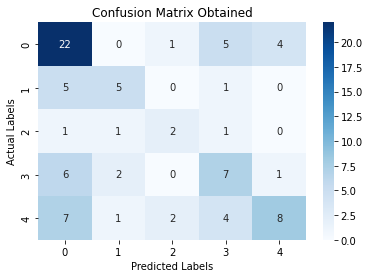

F1-score obtained is  0.4743
Precision obtained is  0.4993
Recall obtained is  0.4686
Classification Report obtained is :
              precision    recall  f1-score   support

           0       0.54      0.69      0.60        32
           1       0.56      0.45      0.50        11
           2       0.40      0.40      0.40         5
           3       0.39      0.44      0.41        16
           4       0.62      0.36      0.46        22

    accuracy                           0.51        86
   macro avg       0.50      0.47      0.47        86
weighted avg       0.52      0.51      0.51        86



In [54]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_validate
from sklearn.preprocessing import MinMaxScaler
knn_pca_pipeline = Pipeline(steps=[('scaler',MinMaxScaler()),('adasyn', ADASYN(random_state=0)),('pca' , PCA(n_components=227,random_state=rs)),
                ('knn',KNeighborsClassifier(n_neighbors=1))])

dt_pca_pipeline = Pipeline([('scaler',MinMaxScaler()),('pca', PCA(n_components=102,random_state=rs)), 
                            ('dt', DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=10, random_state=0))])

rf_pca_pipeline = Pipeline([('scaler',MinMaxScaler()),('adasyn', ADASYN(random_state=0)),('pca',PCA(n_components=48,random_state=rs)),
                ('rf', RandomForestClassifier(max_depth=15, random_state=0))])

svm_pca_pipeline = Pipeline([('scaler',MinMaxScaler()),('pca', PCA(n_components=76,random_state=rs)), 
                             ('svm', SVC(C=29.763514416313132, random_state=0))])

stack_estimators = [dt_pca_pipeline,knn_pca_pipeline,svm_pca_pipeline,rf_pca_pipeline]
stack_estimators = {str(model)+"_pipeline" : estimator for estimator, model in zip(stack_estimators,["dt","knn","svm","rf"])}
print(stack_estimators)

voting_classifier = VotingClassifier([(estName, clone(est)) for estName, est in stack_estimators.items()], voting='hard')

voting_classifier.fit(X_train, y_train)
stack_results[f'{model.__class__.__name__}'+"_yPred"] = voting_classifier.predict(X_test)
stack_list = [f'{model.__class__.__name__}'+" - Stacking Classifier"]
print("Results when {} is used as Voting Classifier")
stack_list.extend(print_metrics(y_test, stack_results[f'{model.__class__.__name__}'+"_yPred"], f'{model.__class__.__name__}'+" - Stacking Classifier"))
stack_results_table.append(stack_list)

{'dt_pipeline': Pipeline(steps=[('pca', PCA(n_components=102, random_state=0)),
                ('dt',
                 DecisionTreeClassifier(criterion='entropy', max_depth=5,
                                        min_samples_leaf=10, random_state=0))]), 'knn_pipeline': Pipeline(steps=[('adasyn', ADASYN(random_state=0)),
                ('pca', PCA(n_components=227, random_state=0)),
                ('knn', KNeighborsClassifier(n_neighbors=1))]), 'svm_pipeline': Pipeline(steps=[('pca', PCA(n_components=76, random_state=0)),
                ('svm', SVC(C=29.763514416313132, random_state=0))]), 'rf_pipeline': Pipeline(steps=[('adasyn', ADASYN(random_state=0)),
                ('pca', PCA(n_components=48, random_state=0)),
                ('rf', RandomForestClassifier(max_depth=15, random_state=0))])}
Results when {} is used as Voting Classifier


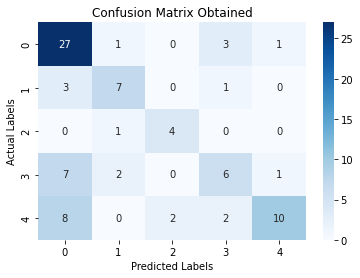

F1-score obtained is  0.6163
Precision obtained is  0.6473
Recall obtained is  0.6219
Classification Report obtained is :
              precision    recall  f1-score   support

           0       0.60      0.84      0.70        32
           1       0.64      0.64      0.64        11
           2       0.67      0.80      0.73         5
           3       0.50      0.38      0.43        16
           4       0.83      0.45      0.59        22

    accuracy                           0.63        86
   macro avg       0.65      0.62      0.62        86
weighted avg       0.65      0.63      0.61        86



In [55]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_validate
from sklearn.preprocessing import MinMaxScaler
knn_pca_pipeline = Pipeline(steps=[('adasyn', ADASYN(random_state=0)),('pca' , PCA(n_components=227,random_state=rs)),
                ('knn',KNeighborsClassifier(n_neighbors=1))])

dt_pca_pipeline = Pipeline([('pca', PCA(n_components=102,random_state=rs)), 
                            ('dt', DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=10, random_state=0))])

rf_pca_pipeline = Pipeline([('adasyn', ADASYN(random_state=0)),('pca',PCA(n_components=48,random_state=rs)),
                ('rf', RandomForestClassifier(max_depth=15, random_state=0))])

svm_pca_pipeline = Pipeline([('pca', PCA(n_components=76,random_state=rs)), 
                             ('svm', SVC(C=29.763514416313132, random_state=0))])

stack_estimators = [dt_pca_pipeline,knn_pca_pipeline,svm_pca_pipeline,rf_pca_pipeline]
stack_estimators = {str(model)+"_pipeline" : estimator for estimator, model in zip(stack_estimators,["dt","knn","svm","rf"])}
print(stack_estimators)

voting_classifier = VotingClassifier([(estName, clone(est)) for estName, est in stack_estimators.items()], voting='hard')

voting_classifier.fit(X_train, y_train)
stack_results[f'{model.__class__.__name__}'+"_yPred"] = voting_classifier.predict(X_test)
stack_list = [f'{model.__class__.__name__}'+" - Stacking Classifier"]
print("Results when {} is used as Voting Classifier")
stack_list.extend(print_metrics(y_test, stack_results[f'{model.__class__.__name__}'+"_yPred"], f'{model.__class__.__name__}'+" - Stacking Classifier"))
stack_results_table.append(stack_list)

In [52]:
rf_pca_pipeline = Pipeline(steps=[('adasyn', ADASYN(random_state=0)),('pca',PCA(n_components=48,random_state=rs)),
                ('rf', RandomForestClassifier(max_depth=15, random_state=0))])


_scoring = ['f1_macro']


results = cross_validate(estimator=rf_pca_pipeline,
                               X=data_df_features,
                               y=data_df_class,
                               cv=5,
                               scoring=_scoring,
                               return_train_score=True)
results


{'fit_time': array([0.97147346, 1.01400018, 1.00300002, 1.07499981, 0.94332409]),
 'score_time': array([0.0119884 , 0.01099896, 0.01499987, 0.01399922, 0.01600528]),
 'test_f1_macro': array([0.41898393, 0.38693438, 0.36430575, 0.49709182, 0.42743966]),
 'train_f1_macro': array([1., 1., 1., 1., 1.])}

In [53]:
rf_pca_pipeline = Pipeline(steps=[('adasyn', ADASYN(random_state=0)),('pca',PCA(n_components=48,random_state=rs)),
                ('rf', RandomForestClassifier(max_depth=15, random_state=0))])


_scoring = ['f1_macro']


results = cross_validate(estimator=rf_pca_pipeline,
                               X=X_train,
                               y=y_train,
                               cv=5,
                               scoring=_scoring,
                               return_train_score=True)
results


{'fit_time': array([1.07400155, 1.07699966, 0.91500783, 1.00699806, 0.87885308]),
 'score_time': array([0.01199865, 0.01400566, 0.01399136, 0.01200271, 0.01300025]),
 'test_f1_macro': array([0.42811028, 0.37534157, 0.40360827, 0.48889483, 0.38192308]),
 'train_f1_macro': array([1., 1., 1., 1., 1.])}

In [59]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_validate
knn_pca_pipeline = Pipeline(steps=[('adasyn', ADASYN(random_state=0)),('pca' , PCA(n_components=227,random_state=rs)),
                ('knn',KNeighborsClassifier(n_neighbors=1))])

dt_pca_pipeline = Pipeline([('pca', PCA(n_components=102,random_state=rs)), 
                            ('dt', DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=10, random_state=0))])

rf_pca_pipeline = Pipeline(steps=[('adasyn', ADASYN(random_state=0)),('pca',PCA(n_components=48,random_state=rs)),
                ('rf', RandomForestClassifier(max_depth=15, random_state=0))])

svm_pca_pipeline = Pipeline([('pca', PCA(n_components=76,random_state=rs)), 
                             ('svm', SVC(C=29.763514416313132, random_state=0))])

stack_estimators = [dt_pca_pipeline,knn_pca_pipeline,svm_pca_pipeline,rf_pca_pipeline]
stack_estimators = {str(model)+"_pipeline" : estimator for estimator, model in zip(stack_estimators,["dt","knn","svm","rf"])}
print(stack_estimators)

model,model_name in zip([GradientBoostingClassifier(random_state = rs)],["Gradient-Boosted Decision Tree"])
stacking = StackingClassifier([(estName, clone(est)) for estName, est in stack_estimators.items()], model)

voting_classifier = VotingClassifier([(estName, clone(est)) for estName, est in stack_estimators.items()], voting='hard')

_scoring = ['f1_macro']

results = cross_validate(estimator=stacking,
                               X=data_df_features,
                               y=data_df_class,
                               cv=5,
                               scoring=_scoring,
                               return_train_score=True)

{'dt_pipeline': Pipeline(steps=[('pca', PCA(n_components=102, random_state=0)),
                ('dt',
                 DecisionTreeClassifier(criterion='entropy', max_depth=5,
                                        min_samples_leaf=10, random_state=0))]), 'knn_pipeline': Pipeline(steps=[('adasyn', ADASYN(random_state=0)),
                ('pca', PCA(n_components=227, random_state=0)),
                ('knn', KNeighborsClassifier(n_neighbors=1))]), 'svm_pipeline': Pipeline(steps=[('pca', PCA(n_components=76, random_state=0)),
                ('svm', SVC(C=29.763514416313132, random_state=0))]), 'rf_pipeline': Pipeline(steps=[('adasyn', ADASYN(random_state=0)),
                ('pca', PCA(n_components=48, random_state=0)),
                ('rf', RandomForestClassifier(max_depth=15, random_state=0))])}


In [60]:
results

{'fit_time': array([31.75942731, 31.94741988, 32.54220724, 32.70086193, 32.72268558]),
 'score_time': array([0., 0., 0., 0., 0.]),
 'test_f1_macro': array([nan, nan, nan, nan, nan]),
 'train_f1_macro': array([nan, nan, nan, nan, nan])}

In [26]:
#Tabulating the obtained results and displaying the results by formatting
results_df = pd.DataFrame(best_results_table,columns = ["Classifier","f1-score","Precision","Recall"])
with pd.option_context('display.precision', 4):
    formatted_table=(results_df.style.background_gradient(cmap ='Blues'))
formatted_table

,Classifier,f1-score,Precision,Recall
0,Decision Tree ADASYN - After Hyperparameter Tuning and Feature Selection based on PCA,0.3755,0.3707,0.3834
1,KNN ADASYN- After Hyperparameter Tuning and Feature Selection based on PCA,0.4640,0.4562,0.5174
2,SVM - After Hyperparameter Tuning and Feature Selection based on PCA,0.5071,0.5524,0.4995
3,RF ADASYN- After Hyperparameter Tuning and Feature Selection based on PCA,0.5762,0.6438,0.5484


{'dt_pipeline': Pipeline(steps=[('adasyn', ADASYN(random_state=0)),
                ('pca', PCA(n_components=18, random_state=0)),
                ('dt',
                 DecisionTreeClassifier(criterion='entropy', max_depth=10,
                                        min_samples_leaf=5, random_state=0))]), 'knn_pipeline': Pipeline(steps=[('adasyn', ADASYN(random_state=0)),
                ('pca', PCA(n_components=227, random_state=0)),
                ('knn', KNeighborsClassifier(n_neighbors=1))]), 'svm_pipeline': Pipeline(steps=[('pca', PCA(n_components=86, random_state=0)),
                ('svm', SVC(C=78.47599703514607, random_state=0))]), 'rf_pipeline': Pipeline(steps=[('adasyn', ADASYN(random_state=0)),
                ('pca', PCA(n_components=125, random_state=0)),
                ('rf',
                 RandomForestClassifier(max_depth=20, n_estimators=80,
                                        random_state=0))])}
Results when Random Forest is used as Stacking Classifier


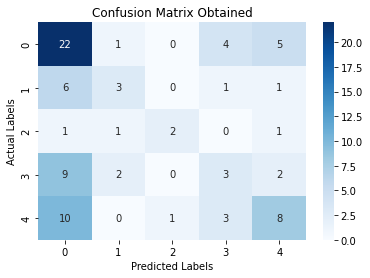

F1-score obtained is  0.4032
Precision obtained is  0.4594
Recall obtained is  0.3823
Classification Report obtained is :
              precision    recall  f1-score   support

           0       0.46      0.69      0.55        32
           1       0.43      0.27      0.33        11
           2       0.67      0.40      0.50         5
           3       0.27      0.19      0.22        16
           4       0.47      0.36      0.41        22

    accuracy                           0.44        86
   macro avg       0.46      0.38      0.40        86
weighted avg       0.44      0.44      0.42        86

Results when AdaBoost is used as Stacking Classifier


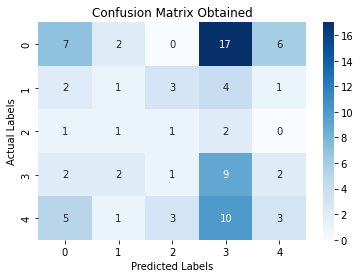

F1-score obtained is  0.2075
Precision obtained is  0.2288
Recall obtained is  0.2417
Classification Report obtained is :
              precision    recall  f1-score   support

           0       0.41      0.22      0.29        32
           1       0.14      0.09      0.11        11
           2       0.12      0.20      0.15         5
           3       0.21      0.56      0.31        16
           4       0.25      0.14      0.18        22

    accuracy                           0.24        86
   macro avg       0.23      0.24      0.21        86
weighted avg       0.28      0.24      0.23        86

[19:10:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Results when XGBoost is used as Stacking Classifier


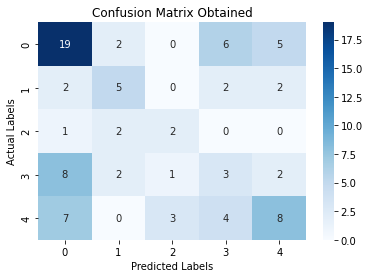

F1-score obtained is  0.3945
Precision obtained is  0.3944
Recall obtained is  0.3999
Classification Report obtained is :
              precision    recall  f1-score   support

           0       0.51      0.59      0.55        32
           1       0.45      0.45      0.45        11
           2       0.33      0.40      0.36         5
           3       0.20      0.19      0.19        16
           4       0.47      0.36      0.41        22

    accuracy                           0.43        86
   macro avg       0.39      0.40      0.39        86
weighted avg       0.43      0.43      0.43        86

Results when Gradient-Boosted Decision Tree is used as Stacking Classifier


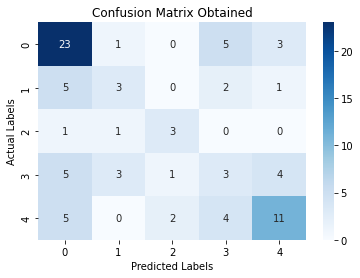

F1-score obtained is  0.4491
Precision obtained is  0.4516
Recall obtained is  0.4558
Classification Report obtained is :
              precision    recall  f1-score   support

           0       0.59      0.72      0.65        32
           1       0.38      0.27      0.32        11
           2       0.50      0.60      0.55         5
           3       0.21      0.19      0.20        16
           4       0.58      0.50      0.54        22

    accuracy                           0.50        86
   macro avg       0.45      0.46      0.45        86
weighted avg       0.48      0.50      0.49        86

Results when Decision Tree is used as Stacking Classifier


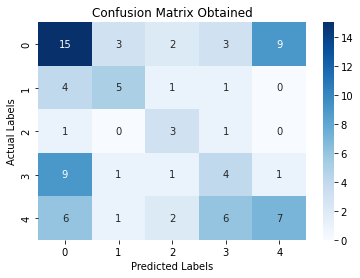

F1-score obtained is  0.3939
Precision obtained is  0.3881
Recall obtained is  0.4183
Classification Report obtained is :
              precision    recall  f1-score   support

           0       0.43      0.47      0.45        32
           1       0.50      0.45      0.48        11
           2       0.33      0.60      0.43         5
           3       0.27      0.25      0.26        16
           4       0.41      0.32      0.36        22

    accuracy                           0.40        86
   macro avg       0.39      0.42      0.39        86
weighted avg       0.40      0.40      0.39        86



,Classifier,f1-score,Precision,Recall
0,RandomForestClassifier - Stacking Classifier,0.4032,0.4594,0.3823
1,AdaBoostClassifier - Stacking Classifier,0.2075,0.2288,0.2417
2,XGBClassifier - Stacking Classifier,0.3945,0.3944,0.3999
3,GradientBoostingClassifier - Stacking Classifier,0.4491,0.4516,0.4558
4,DecisionTreeClassifier - Stacking Classifier,0.3939,0.3881,0.4183


In [27]:
stack_estimators = [dt_pca_pipeline,knn_pca_pipeline,svm_pca_pipeline,rf_pca_pipeline]
stack_estimators = {str(model)+"_pipeline" : estimator for estimator, model in zip(stack_estimators,["dt","knn","svm","rf"])}
print(stack_estimators)

stack_results = dict()
stack_results_table = []

from sklearn.base import clone
for model,model_name in zip([RandomForestClassifier(random_state=rs)],["Random Forest"]):
    stacking = StackingClassifier([(estName, clone(est)) for estName, est in stack_estimators.items()], model)
    stacking.fit(X_train, y_train)
    stack_results[f'{model.__class__.__name__}'+"_yPred"] = stacking.predict(X_test)
    stack_list = [f'{model.__class__.__name__}'+" - Stacking Classifier"]
    print("Results when {} is used as Stacking Classifier".format(model_name))
    stack_list.extend(print_metrics(y_test, stack_results[f'{model.__class__.__name__}'+"_yPred"], f'{model.__class__.__name__}'+" - Stacking Classifier"))
    stack_results_table.append(stack_list)
	
for model,model_name in zip([AdaBoostClassifier(random_state = rs)],["AdaBoost"]):
    stacking = StackingClassifier([(estName, clone(est)) for estName, est in stack_estimators.items()], model)
    stacking.fit(X_train, y_train)
    stack_results[f'{model.__class__.__name__}'+"_yPred"] = stacking.predict(X_test)
    stack_list = [f'{model.__class__.__name__}'+" - Stacking Classifier"]
    print("Results when {} is used as Stacking Classifier".format(model_name))
    stack_list.extend(print_metrics(y_test, stack_results[f'{model.__class__.__name__}'+"_yPred"], f'{model.__class__.__name__}'+" - Stacking Classifier"))
    stack_results_table.append(stack_list)

from xgboost import XGBClassifier
for model,model_name in zip([XGBClassifier(objective="binary:logistic", random_state=rs)],["XGBoost"]):
    stacking = StackingClassifier([(estName, clone(est)) for estName, est in stack_estimators.items()], model)
    stacking.fit(X_train, y_train)
    stack_results[f'{model.__class__.__name__}'+"_yPred"] = stacking.predict(X_test)
    stack_list = [f'{model.__class__.__name__}'+" - Stacking Classifier"]
    print("Results when {} is used as Stacking Classifier".format(model_name))
    stack_list.extend(print_metrics(y_test, stack_results[f'{model.__class__.__name__}'+"_yPred"], f'{model.__class__.__name__}'+" - Stacking Classifier"))
    stack_results_table.append(stack_list)

for model,model_name in zip([GradientBoostingClassifier(random_state = rs)],["Gradient-Boosted Decision Tree"]):
    stacking = StackingClassifier([(estName, clone(est)) for estName, est in stack_estimators.items()], model)
    stacking.fit(X_train, y_train)
    stack_results[f'{model.__class__.__name__}'+"_yPred"] = stacking.predict(X_test)
    stack_list = [f'{model.__class__.__name__}'+" - Stacking Classifier"]
    print("Results when {} is used as Stacking Classifier".format(model_name))
    stack_list.extend(print_metrics(y_test, stack_results[f'{model.__class__.__name__}'+"_yPred"], f'{model.__class__.__name__}'+" - Stacking Classifier"))
    stack_results_table.append(stack_list)

for model,model_name in zip([DecisionTreeClassifier(random_state=rs)],["Decision Tree"]):
    stacking = StackingClassifier([(estName, clone(est)) for estName, est in stack_estimators.items()], model)
    stacking.fit(X_train, y_train)
    stack_results[f'{model.__class__.__name__}'+"_yPred"] = stacking.predict(X_test)
    stack_list = [f'{model.__class__.__name__}'+" - Stacking Classifier"]
    print("Results when {} is used as Stacking Classifier".format(model_name))
    stack_list.extend(print_metrics(y_test, stack_results[f'{model.__class__.__name__}'+"_yPred"], f'{model.__class__.__name__}'+" - Stacking Classifier"))
    stack_results_table.append(stack_list)

stack_results_table

#Tabulating the obtained results and displaying the results by formatting
results_df = pd.DataFrame(stack_results_table,columns = ["Classifier","f1-score","Precision","Recall"])
with pd.option_context('display.precision', 4):
    formatted_table=(results_df.style.background_gradient(cmap ='Blues'))
formatted_table

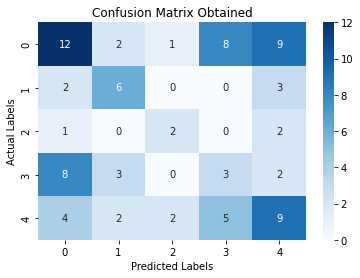

F1-score obtained is  0.3755
Precision obtained is  0.3707
Recall obtained is  0.3834
Classification Report obtained is :
              precision    recall  f1-score   support

           0       0.44      0.38      0.41        32
           1       0.46      0.55      0.50        11
           2       0.40      0.40      0.40         5
           3       0.19      0.19      0.19        16
           4       0.36      0.41      0.38        22

    accuracy                           0.37        86
   macro avg       0.37      0.38      0.38        86
weighted avg       0.37      0.37      0.37        86



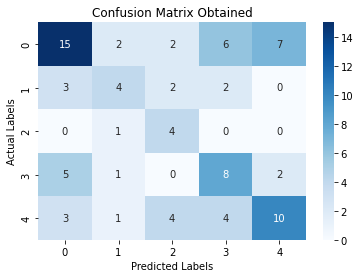

F1-score obtained is  0.464
Precision obtained is  0.4562
Recall obtained is  0.5174
Classification Report obtained is :
              precision    recall  f1-score   support

           0       0.58      0.47      0.52        32
           1       0.44      0.36      0.40        11
           2       0.33      0.80      0.47         5
           3       0.40      0.50      0.44        16
           4       0.53      0.45      0.49        22

    accuracy                           0.48        86
   macro avg       0.46      0.52      0.46        86
weighted avg       0.50      0.48      0.48        86



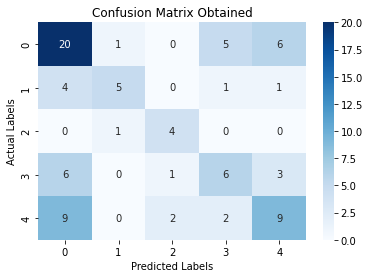

F1-score obtained is  0.5249
Precision obtained is  0.5402
Recall obtained is  0.5327
Classification Report obtained is :
              precision    recall  f1-score   support

           0       0.51      0.62      0.56        32
           1       0.71      0.45      0.56        11
           2       0.57      0.80      0.67         5
           3       0.43      0.38      0.40        16
           4       0.47      0.41      0.44        22

    accuracy                           0.51        86
   macro avg       0.54      0.53      0.52        86
weighted avg       0.52      0.51      0.51        86



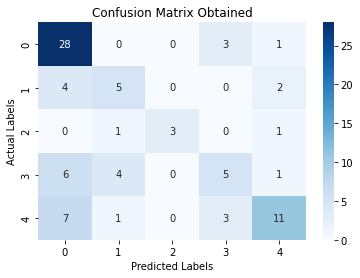

F1-score obtained is  0.5762
Precision obtained is  0.6438
Recall obtained is  0.5484
Classification Report obtained is :
              precision    recall  f1-score   support

           0       0.62      0.88      0.73        32
           1       0.45      0.45      0.45        11
           2       1.00      0.60      0.75         5
           3       0.45      0.31      0.37        16
           4       0.69      0.50      0.58        22

    accuracy                           0.60        86
   macro avg       0.64      0.55      0.58        86
weighted avg       0.61      0.60      0.59        86



,Classifier,f1-score,Precision,Recall
0,Decision Tree ADASYN - After Hyperparameter Tuning and Feature Selection based on PCA,0.3755,0.3707,0.3834
1,KNN ADASYN- After Hyperparameter Tuning and Feature Selection based on PCA,0.4640,0.4562,0.5174
2,SVM - After Hyperparameter Tuning and Feature Selection based on PCA,0.5249,0.5402,0.5327
3,RF ADASYN- After Hyperparameter Tuning and Feature Selection based on PCA,0.5762,0.6438,0.5484


In [28]:
best_results_table = []

dt = DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_leaf=5, random_state=0)
adasyn = ADASYN(random_state=rs)
pca = PCA(n_components=18,random_state=rs)
dt_pca_pipeline = Pipeline([('adasyn',adasyn),('pca', pca), ('dt', dt)])
dt_pca_pipeline.fit(X_train,y_train)
dt_pca_pipeline_yPred = dt_pca_pipeline.predict(X_test)
dt_list = ["Decision Tree ADASYN - After Hyperparameter Tuning and Feature Selection based on PCA"]
dt_list.extend(print_metrics(y_test, dt_pca_pipeline_yPred,"Decision Tree - PCA"))
best_results_table.append(dt_list)

knn = KNeighborsClassifier(n_neighbors=1)
adasyn = ADASYN(random_state=rs)
pca = PCA(n_components=227,random_state=rs)
knn_pca_pipeline = Pipeline([('adasyn',adasyn),('pca', pca), ('knn', knn)])
knn_pca_pipeline.fit(X_train,y_train)
knn_pca_pipeline_yPred = knn_pca_pipeline.predict(X_test)
knn_list = ["KNN ADASYN- After Hyperparameter Tuning and Feature Selection based on PCA"]
knn_list.extend(print_metrics(y_test, knn_pca_pipeline_yPred,"KNN - PCA"))
best_results_table.append(knn_list)

svm = SVC(C=78.47599703514607, random_state=0)
adasyn = ADASYN(random_state=rs)
pca = PCA(n_components=86,random_state=rs)
svm_pca_pipeline = Pipeline([('adasyn',adasyn), ('pca', pca), ('svm', svm)])
svm_pca_pipeline.fit(X_train,y_train)
svm_pca_pipeline_yPred = svm_pca_pipeline.predict(X_test)
svm_list = ["SVM - After Hyperparameter Tuning and Feature Selection based on PCA"]
svm_list.extend(print_metrics(y_test, svm_pca_pipeline_yPred,"SVM - PCA"))
best_results_table.append(svm_list)

rf = RandomForestClassifier(max_depth=20, n_estimators=80, random_state=0)
adasyn = ADASYN(random_state=rs)
pca = PCA(n_components=125,random_state=rs)
rf_pca_pipeline = Pipeline([('adasyn',adasyn),('pca', pca), ('rf', rf)])
rf_pca_pipeline.fit(X_train,y_train)
rf_pca_pipeline_yPred = rf_pca_pipeline.predict(X_test)
rf_list = ["RF ADASYN- After Hyperparameter Tuning and Feature Selection based on PCA"]
rf_list.extend(print_metrics(y_test, rf_pca_pipeline_yPred,"RF - PCA"))
best_results_table.append(rf_list)

best_results_table

#Tabulating the obtained results and displaying the results by formatting
results_df = pd.DataFrame(best_results_table,columns = ["Classifier","f1-score","Precision","Recall"])
with pd.option_context('display.precision', 4):
    formatted_table=(results_df.style.background_gradient(cmap ='Blues'))
formatted_table

{'dt_pipeline': Pipeline(steps=[('adasyn', ADASYN(random_state=0)),
                ('pca', PCA(n_components=18, random_state=0)),
                ('dt',
                 DecisionTreeClassifier(criterion='entropy', max_depth=10,
                                        min_samples_leaf=5, random_state=0))]), 'knn_pipeline': Pipeline(steps=[('adasyn', ADASYN(random_state=0)),
                ('pca', PCA(n_components=227, random_state=0)),
                ('knn', KNeighborsClassifier(n_neighbors=1))]), 'svm_pipeline': Pipeline(steps=[('adasyn', ADASYN(random_state=0)),
                ('pca', PCA(n_components=86, random_state=0)),
                ('svm', SVC(C=78.47599703514607, random_state=0))]), 'rf_pipeline': Pipeline(steps=[('adasyn', ADASYN(random_state=0)),
                ('pca', PCA(n_components=125, random_state=0)),
                ('rf',
                 RandomForestClassifier(max_depth=20, n_estimators=80,
                                        random_state=0))])}
Results wh

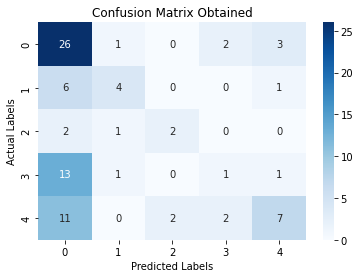

F1-score obtained is  0.3947
Precision obtained is  0.4606
Recall obtained is  0.3914
Classification Report obtained is :
              precision    recall  f1-score   support

           0       0.45      0.81      0.58        32
           1       0.57      0.36      0.44        11
           2       0.50      0.40      0.44         5
           3       0.20      0.06      0.10        16
           4       0.58      0.32      0.41        22

    accuracy                           0.47        86
   macro avg       0.46      0.39      0.39        86
weighted avg       0.46      0.47      0.42        86

Results when AdaBoost is used as Stacking Classifier


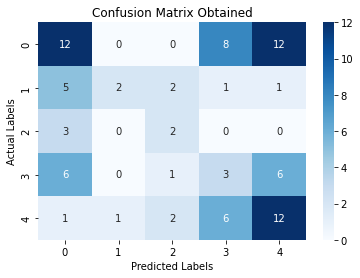

F1-score obtained is  0.331
Precision obtained is  0.3901
Recall obtained is  0.338
Classification Report obtained is :
              precision    recall  f1-score   support

           0       0.44      0.38      0.41        32
           1       0.67      0.18      0.29        11
           2       0.29      0.40      0.33         5
           3       0.17      0.19      0.18        16
           4       0.39      0.55      0.45        22

    accuracy                           0.36        86
   macro avg       0.39      0.34      0.33        86
weighted avg       0.40      0.36      0.36        86

[19:14:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Results when XGBoost is used as Stacking Classifier


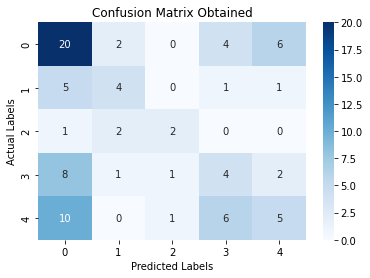

F1-score obtained is  0.3813
Precision obtained is  0.4046
Recall obtained is  0.3732
Classification Report obtained is :
              precision    recall  f1-score   support

           0       0.45      0.62      0.53        32
           1       0.44      0.36      0.40        11
           2       0.50      0.40      0.44         5
           3       0.27      0.25      0.26        16
           4       0.36      0.23      0.28        22

    accuracy                           0.41        86
   macro avg       0.40      0.37      0.38        86
weighted avg       0.40      0.41      0.39        86

Results when Gradient-Boosted Decision Tree is used as Stacking Classifier


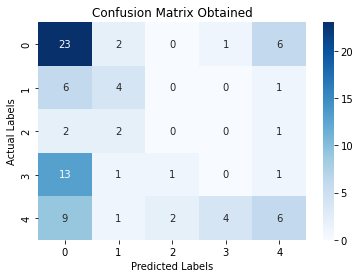

F1-score obtained is  0.2493
Precision obtained is  0.2468
Recall obtained is  0.271
Classification Report obtained is :
              precision    recall  f1-score   support

           0       0.43      0.72      0.54        32
           1       0.40      0.36      0.38        11
           2       0.00      0.00      0.00         5
           3       0.00      0.00      0.00        16
           4       0.40      0.27      0.32        22

    accuracy                           0.38        86
   macro avg       0.25      0.27      0.25        86
weighted avg       0.31      0.38      0.33        86

Results when Decision Tree is used as Stacking Classifier


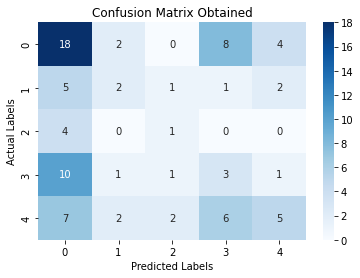

F1-score obtained is  0.2733
Precision obtained is  0.2956
Recall obtained is  0.2718
Classification Report obtained is :
              precision    recall  f1-score   support

           0       0.41      0.56      0.47        32
           1       0.29      0.18      0.22        11
           2       0.20      0.20      0.20         5
           3       0.17      0.19      0.18        16
           4       0.42      0.23      0.29        22

    accuracy                           0.34        86
   macro avg       0.30      0.27      0.27        86
weighted avg       0.34      0.34      0.32        86



,Classifier,f1-score,Precision,Recall
0,RandomForestClassifier - Stacking Classifier,0.3947,0.4606,0.3914
1,AdaBoostClassifier - Stacking Classifier,0.3310,0.3901,0.3380
2,XGBClassifier - Stacking Classifier,0.3813,0.4046,0.3732
3,GradientBoostingClassifier - Stacking Classifier,0.2493,0.2468,0.2710
4,DecisionTreeClassifier - Stacking Classifier,0.2733,0.2956,0.2718


In [29]:
stack_estimators = [dt_pca_pipeline,knn_pca_pipeline,svm_pca_pipeline,rf_pca_pipeline]
stack_estimators = {str(model)+"_pipeline" : estimator for estimator, model in zip(stack_estimators,["dt","knn","svm","rf"])}
print(stack_estimators)

stack_results = dict()
stack_results_table = []

from sklearn.base import clone
for model,model_name in zip([RandomForestClassifier(random_state=rs)],["Random Forest"]):
    stacking = StackingClassifier([(estName, clone(est)) for estName, est in stack_estimators.items()], model)
    stacking.fit(X_train, y_train)
    stack_results[f'{model.__class__.__name__}'+"_yPred"] = stacking.predict(X_test)
    stack_list = [f'{model.__class__.__name__}'+" - Stacking Classifier"]
    print("Results when {} is used as Stacking Classifier".format(model_name))
    stack_list.extend(print_metrics(y_test, stack_results[f'{model.__class__.__name__}'+"_yPred"], f'{model.__class__.__name__}'+" - Stacking Classifier"))
    stack_results_table.append(stack_list)
	
for model,model_name in zip([AdaBoostClassifier(random_state = rs)],["AdaBoost"]):
    stacking = StackingClassifier([(estName, clone(est)) for estName, est in stack_estimators.items()], model)
    stacking.fit(X_train, y_train)
    stack_results[f'{model.__class__.__name__}'+"_yPred"] = stacking.predict(X_test)
    stack_list = [f'{model.__class__.__name__}'+" - Stacking Classifier"]
    print("Results when {} is used as Stacking Classifier".format(model_name))
    stack_list.extend(print_metrics(y_test, stack_results[f'{model.__class__.__name__}'+"_yPred"], f'{model.__class__.__name__}'+" - Stacking Classifier"))
    stack_results_table.append(stack_list)

from xgboost import XGBClassifier
for model,model_name in zip([XGBClassifier(objective="binary:logistic", random_state=rs)],["XGBoost"]):
    stacking = StackingClassifier([(estName, clone(est)) for estName, est in stack_estimators.items()], model)
    stacking.fit(X_train, y_train)
    stack_results[f'{model.__class__.__name__}'+"_yPred"] = stacking.predict(X_test)
    stack_list = [f'{model.__class__.__name__}'+" - Stacking Classifier"]
    print("Results when {} is used as Stacking Classifier".format(model_name))
    stack_list.extend(print_metrics(y_test, stack_results[f'{model.__class__.__name__}'+"_yPred"], f'{model.__class__.__name__}'+" - Stacking Classifier"))
    stack_results_table.append(stack_list)

for model,model_name in zip([GradientBoostingClassifier(random_state = rs)],["Gradient-Boosted Decision Tree"]):
    stacking = StackingClassifier([(estName, clone(est)) for estName, est in stack_estimators.items()], model)
    stacking.fit(X_train, y_train)
    stack_results[f'{model.__class__.__name__}'+"_yPred"] = stacking.predict(X_test)
    stack_list = [f'{model.__class__.__name__}'+" - Stacking Classifier"]
    print("Results when {} is used as Stacking Classifier".format(model_name))
    stack_list.extend(print_metrics(y_test, stack_results[f'{model.__class__.__name__}'+"_yPred"], f'{model.__class__.__name__}'+" - Stacking Classifier"))
    stack_results_table.append(stack_list)

for model,model_name in zip([DecisionTreeClassifier(random_state=rs)],["Decision Tree"]):
    stacking = StackingClassifier([(estName, clone(est)) for estName, est in stack_estimators.items()], model)
    stacking.fit(X_train, y_train)
    stack_results[f'{model.__class__.__name__}'+"_yPred"] = stacking.predict(X_test)
    stack_list = [f'{model.__class__.__name__}'+" - Stacking Classifier"]
    print("Results when {} is used as Stacking Classifier".format(model_name))
    stack_list.extend(print_metrics(y_test, stack_results[f'{model.__class__.__name__}'+"_yPred"], f'{model.__class__.__name__}'+" - Stacking Classifier"))
    stack_results_table.append(stack_list)

stack_results_table

#Tabulating the obtained results and displaying the results by formatting
results_df = pd.DataFrame(stack_results_table,columns = ["Classifier","f1-score","Precision","Recall"])
with pd.option_context('display.precision', 4):
    formatted_table=(results_df.style.background_gradient(cmap ='Blues'))
formatted_table

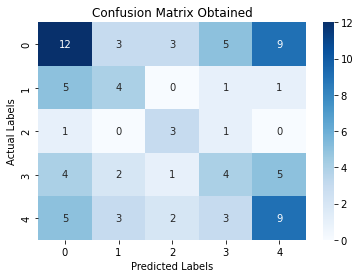

F1-score obtained is  0.3682
Precision obtained is  0.3544
Recall obtained is  0.3995
Classification Report obtained is :
              precision    recall  f1-score   support

           0       0.44      0.38      0.41        32
           1       0.33      0.36      0.35        11
           2       0.33      0.60      0.43         5
           3       0.29      0.25      0.27        16
           4       0.38      0.41      0.39        22

    accuracy                           0.37        86
   macro avg       0.35      0.40      0.37        86
weighted avg       0.38      0.37      0.37        86



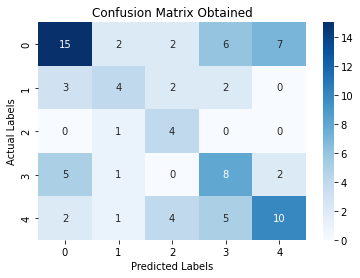

F1-score obtained is  0.4634
Precision obtained is  0.457
Recall obtained is  0.5174
Classification Report obtained is :
              precision    recall  f1-score   support

           0       0.60      0.47      0.53        32
           1       0.44      0.36      0.40        11
           2       0.33      0.80      0.47         5
           3       0.38      0.50      0.43        16
           4       0.53      0.45      0.49        22

    accuracy                           0.48        86
   macro avg       0.46      0.52      0.46        86
weighted avg       0.50      0.48      0.48        86



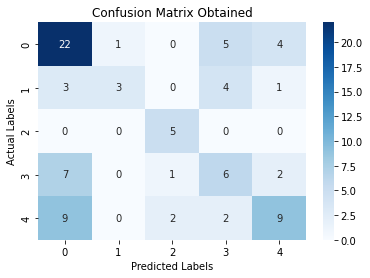

F1-score obtained is  0.5219
Precision obtained is  0.5654
Recall obtained is  0.5489
Classification Report obtained is :
              precision    recall  f1-score   support

           0       0.54      0.69      0.60        32
           1       0.75      0.27      0.40        11
           2       0.62      1.00      0.77         5
           3       0.35      0.38      0.36        16
           4       0.56      0.41      0.47        22

    accuracy                           0.52        86
   macro avg       0.57      0.55      0.52        86
weighted avg       0.54      0.52      0.51        86



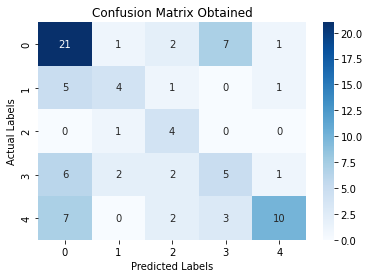

F1-score obtained is  0.4813
Precision obtained is  0.5009
Recall obtained is  0.5174
Classification Report obtained is :
              precision    recall  f1-score   support

           0       0.54      0.66      0.59        32
           1       0.50      0.36      0.42        11
           2       0.36      0.80      0.50         5
           3       0.33      0.31      0.32        16
           4       0.77      0.45      0.57        22

    accuracy                           0.51        86
   macro avg       0.50      0.52      0.48        86
weighted avg       0.54      0.51      0.51        86



,Classifier,f1-score,Precision,Recall
0,Decision Tree ADASYN,0.3682,0.3544,0.3995
1,KNN ADASYN,0.4634,0.4570,0.5174
2,SVM - ADASYN,0.5219,0.5654,0.5489
3,RF ADASYN,0.4813,0.5009,0.5174


In [31]:
best_results_table = []

dt = DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_leaf=5, random_state=0)
adasyn = ADASYN(random_state=rs)
dt_pca_pipeline = Pipeline([('adasyn',adasyn), ('dt', dt)])
dt_pca_pipeline.fit(X_train,y_train)
dt_pca_pipeline_yPred = dt_pca_pipeline.predict(X_test)
dt_list = ["Decision Tree ADASYN"]
dt_list.extend(print_metrics(y_test, dt_pca_pipeline_yPred,"Decision Tree - PCA"))
best_results_table.append(dt_list)

knn = KNeighborsClassifier(n_neighbors=1)
adasyn = ADASYN(random_state=rs)
knn_pca_pipeline = Pipeline([('adasyn',adasyn), ('knn', knn)])
knn_pca_pipeline.fit(X_train,y_train)
knn_pca_pipeline_yPred = knn_pca_pipeline.predict(X_test)
knn_list = ["KNN ADASYN"]
knn_list.extend(print_metrics(y_test, knn_pca_pipeline_yPred,"KNN - PCA"))
best_results_table.append(knn_list)

svm = SVC(C=78.47599703514607, random_state=0)
adasyn = ADASYN(random_state=rs)
svm_pca_pipeline = Pipeline([('adasyn',adasyn), ('svm', svm)])
svm_pca_pipeline.fit(X_train,y_train)
svm_pca_pipeline_yPred = svm_pca_pipeline.predict(X_test)
svm_list = ["SVM - ADASYN"]
svm_list.extend(print_metrics(y_test, svm_pca_pipeline_yPred,"SVM - PCA"))
best_results_table.append(svm_list)

rf = RandomForestClassifier(max_depth=20, n_estimators=80, random_state=0)
adasyn = ADASYN(random_state=rs)
rf_pca_pipeline = Pipeline([('adasyn',adasyn), ('rf', rf)])
rf_pca_pipeline.fit(X_train,y_train)
rf_pca_pipeline_yPred = rf_pca_pipeline.predict(X_test)
rf_list = ["RF ADASYN"]
rf_list.extend(print_metrics(y_test, rf_pca_pipeline_yPred,"RF - PCA"))
best_results_table.append(rf_list)

best_results_table

#Tabulating the obtained results and displaying the results by formatting
results_df = pd.DataFrame(best_results_table,columns = ["Classifier","f1-score","Precision","Recall"])
with pd.option_context('display.precision', 4):
    formatted_table=(results_df.style.background_gradient(cmap ='Blues'))
formatted_table

{'dt_pipeline': Pipeline(steps=[('adasyn', ADASYN(random_state=0)),
                ('dt',
                 DecisionTreeClassifier(criterion='entropy', max_depth=10,
                                        min_samples_leaf=5, random_state=0))]), 'knn_pipeline': Pipeline(steps=[('adasyn', ADASYN(random_state=0)),
                ('knn', KNeighborsClassifier(n_neighbors=1))]), 'svm_pipeline': Pipeline(steps=[('adasyn', ADASYN(random_state=0)),
                ('svm', SVC(C=78.47599703514607, random_state=0))]), 'rf_pipeline': Pipeline(steps=[('adasyn', ADASYN(random_state=0)),
                ('rf',
                 RandomForestClassifier(max_depth=20, n_estimators=80,
                                        random_state=0))])}
Results when Random Forest is used as Stacking Classifier


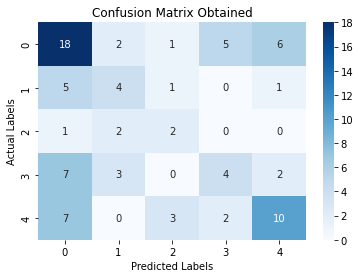

F1-score obtained is  0.3991
Precision obtained is  0.4026
Recall obtained is  0.4061
Classification Report obtained is :
              precision    recall  f1-score   support

           0       0.47      0.56      0.51        32
           1       0.36      0.36      0.36        11
           2       0.29      0.40      0.33         5
           3       0.36      0.25      0.30        16
           4       0.53      0.45      0.49        22

    accuracy                           0.44        86
   macro avg       0.40      0.41      0.40        86
weighted avg       0.44      0.44      0.44        86

Results when AdaBoost is used as Stacking Classifier


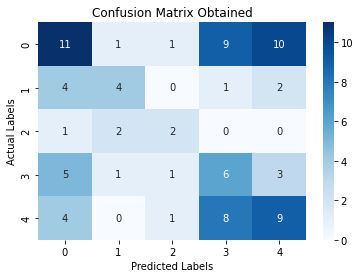

F1-score obtained is  0.3797
Precision obtained is  0.393
Recall obtained is  0.3783
Classification Report obtained is :
              precision    recall  f1-score   support

           0       0.44      0.34      0.39        32
           1       0.50      0.36      0.42        11
           2       0.40      0.40      0.40         5
           3       0.25      0.38      0.30        16
           4       0.38      0.41      0.39        22

    accuracy                           0.37        86
   macro avg       0.39      0.38      0.38        86
weighted avg       0.39      0.37      0.38        86

[19:18:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Results when XGBoost is used as Stacking Classifier


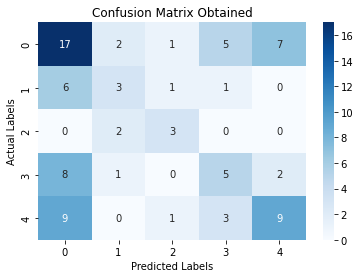

F1-score obtained is  0.4234
Precision obtained is  0.4314
Recall obtained is  0.4251
Classification Report obtained is :
              precision    recall  f1-score   support

           0       0.42      0.53      0.47        32
           1       0.38      0.27      0.32        11
           2       0.50      0.60      0.55         5
           3       0.36      0.31      0.33        16
           4       0.50      0.41      0.45        22

    accuracy                           0.43        86
   macro avg       0.43      0.43      0.42        86
weighted avg       0.43      0.43      0.42        86

Results when Gradient-Boosted Decision Tree is used as Stacking Classifier


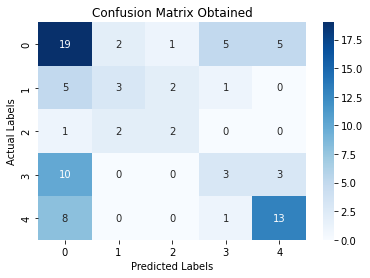

F1-score obtained is  0.4151
Precision obtained is  0.4379
Recall obtained is  0.409
Classification Report obtained is :
              precision    recall  f1-score   support

           0       0.44      0.59      0.51        32
           1       0.43      0.27      0.33        11
           2       0.40      0.40      0.40         5
           3       0.30      0.19      0.23        16
           4       0.62      0.59      0.60        22

    accuracy                           0.47        86
   macro avg       0.44      0.41      0.42        86
weighted avg       0.46      0.47      0.45        86

Results when Decision Tree is used as Stacking Classifier


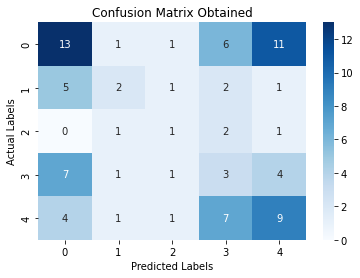

F1-score obtained is  0.2806
Precision obtained is  0.2956
Recall obtained is  0.2769
Classification Report obtained is :
              precision    recall  f1-score   support

           0       0.45      0.41      0.43        32
           1       0.33      0.18      0.24        11
           2       0.20      0.20      0.20         5
           3       0.15      0.19      0.17        16
           4       0.35      0.41      0.38        22

    accuracy                           0.33        86
   macro avg       0.30      0.28      0.28        86
weighted avg       0.34      0.33      0.33        86



,Classifier,f1-score,Precision,Recall
0,RandomForestClassifier - Stacking Classifier,0.3991,0.4026,0.4061
1,AdaBoostClassifier - Stacking Classifier,0.3797,0.3930,0.3783
2,XGBClassifier - Stacking Classifier,0.4234,0.4314,0.4251
3,GradientBoostingClassifier - Stacking Classifier,0.4151,0.4379,0.4090
4,DecisionTreeClassifier - Stacking Classifier,0.2806,0.2956,0.2769


In [32]:
stack_estimators = [dt_pca_pipeline,knn_pca_pipeline,svm_pca_pipeline,rf_pca_pipeline]
stack_estimators = {str(model)+"_pipeline" : estimator for estimator, model in zip(stack_estimators,["dt","knn","svm","rf"])}
print(stack_estimators)

stack_results = dict()
stack_results_table = []

from sklearn.base import clone
for model,model_name in zip([RandomForestClassifier(random_state=rs)],["Random Forest"]):
    stacking = StackingClassifier([(estName, clone(est)) for estName, est in stack_estimators.items()], model)
    stacking.fit(X_train, y_train)
    stack_results[f'{model.__class__.__name__}'+"_yPred"] = stacking.predict(X_test)
    stack_list = [f'{model.__class__.__name__}'+" - Stacking Classifier"]
    print("Results when {} is used as Stacking Classifier".format(model_name))
    stack_list.extend(print_metrics(y_test, stack_results[f'{model.__class__.__name__}'+"_yPred"], f'{model.__class__.__name__}'+" - Stacking Classifier"))
    stack_results_table.append(stack_list)
	
for model,model_name in zip([AdaBoostClassifier(random_state = rs)],["AdaBoost"]):
    stacking = StackingClassifier([(estName, clone(est)) for estName, est in stack_estimators.items()], model)
    stacking.fit(X_train, y_train)
    stack_results[f'{model.__class__.__name__}'+"_yPred"] = stacking.predict(X_test)
    stack_list = [f'{model.__class__.__name__}'+" - Stacking Classifier"]
    print("Results when {} is used as Stacking Classifier".format(model_name))
    stack_list.extend(print_metrics(y_test, stack_results[f'{model.__class__.__name__}'+"_yPred"], f'{model.__class__.__name__}'+" - Stacking Classifier"))
    stack_results_table.append(stack_list)

from xgboost import XGBClassifier
for model,model_name in zip([XGBClassifier(objective="binary:logistic", random_state=rs)],["XGBoost"]):
    stacking = StackingClassifier([(estName, clone(est)) for estName, est in stack_estimators.items()], model)
    stacking.fit(X_train, y_train)
    stack_results[f'{model.__class__.__name__}'+"_yPred"] = stacking.predict(X_test)
    stack_list = [f'{model.__class__.__name__}'+" - Stacking Classifier"]
    print("Results when {} is used as Stacking Classifier".format(model_name))
    stack_list.extend(print_metrics(y_test, stack_results[f'{model.__class__.__name__}'+"_yPred"], f'{model.__class__.__name__}'+" - Stacking Classifier"))
    stack_results_table.append(stack_list)

for model,model_name in zip([GradientBoostingClassifier(random_state = rs)],["Gradient-Boosted Decision Tree"]):
    stacking = StackingClassifier([(estName, clone(est)) for estName, est in stack_estimators.items()], model)
    stacking.fit(X_train, y_train)
    stack_results[f'{model.__class__.__name__}'+"_yPred"] = stacking.predict(X_test)
    stack_list = [f'{model.__class__.__name__}'+" - Stacking Classifier"]
    print("Results when {} is used as Stacking Classifier".format(model_name))
    stack_list.extend(print_metrics(y_test, stack_results[f'{model.__class__.__name__}'+"_yPred"], f'{model.__class__.__name__}'+" - Stacking Classifier"))
    stack_results_table.append(stack_list)

for model,model_name in zip([DecisionTreeClassifier(random_state=rs)],["Decision Tree"]):
    stacking = StackingClassifier([(estName, clone(est)) for estName, est in stack_estimators.items()], model)
    stacking.fit(X_train, y_train)
    stack_results[f'{model.__class__.__name__}'+"_yPred"] = stacking.predict(X_test)
    stack_list = [f'{model.__class__.__name__}'+" - Stacking Classifier"]
    print("Results when {} is used as Stacking Classifier".format(model_name))
    stack_list.extend(print_metrics(y_test, stack_results[f'{model.__class__.__name__}'+"_yPred"], f'{model.__class__.__name__}'+" - Stacking Classifier"))
    stack_results_table.append(stack_list)

stack_results_table

#Tabulating the obtained results and displaying the results by formatting
results_df = pd.DataFrame(stack_results_table,columns = ["Classifier","f1-score","Precision","Recall"])
with pd.option_context('display.precision', 4):
    formatted_table=(results_df.style.background_gradient(cmap ='Blues'))
formatted_table

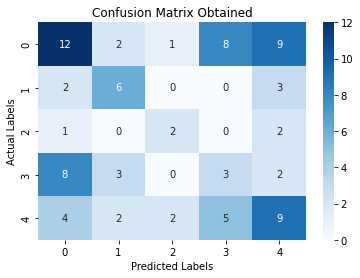

F1-score obtained is  0.3755
Precision obtained is  0.3707
Recall obtained is  0.3834
Classification Report obtained is :
              precision    recall  f1-score   support

           0       0.44      0.38      0.41        32
           1       0.46      0.55      0.50        11
           2       0.40      0.40      0.40         5
           3       0.19      0.19      0.19        16
           4       0.36      0.41      0.38        22

    accuracy                           0.37        86
   macro avg       0.37      0.38      0.38        86
weighted avg       0.37      0.37      0.37        86



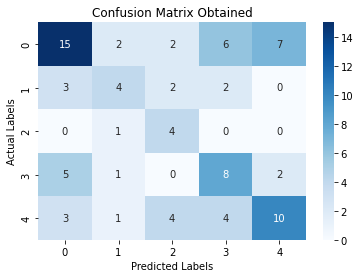

F1-score obtained is  0.464
Precision obtained is  0.4562
Recall obtained is  0.5174
Classification Report obtained is :
              precision    recall  f1-score   support

           0       0.58      0.47      0.52        32
           1       0.44      0.36      0.40        11
           2       0.33      0.80      0.47         5
           3       0.40      0.50      0.44        16
           4       0.53      0.45      0.49        22

    accuracy                           0.48        86
   macro avg       0.46      0.52      0.46        86
weighted avg       0.50      0.48      0.48        86



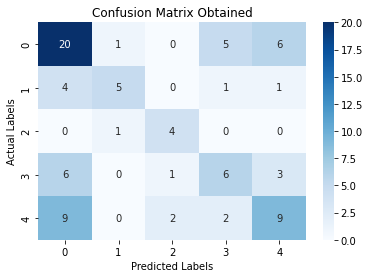

F1-score obtained is  0.5249
Precision obtained is  0.5402
Recall obtained is  0.5327
Classification Report obtained is :
              precision    recall  f1-score   support

           0       0.51      0.62      0.56        32
           1       0.71      0.45      0.56        11
           2       0.57      0.80      0.67         5
           3       0.43      0.38      0.40        16
           4       0.47      0.41      0.44        22

    accuracy                           0.51        86
   macro avg       0.54      0.53      0.52        86
weighted avg       0.52      0.51      0.51        86



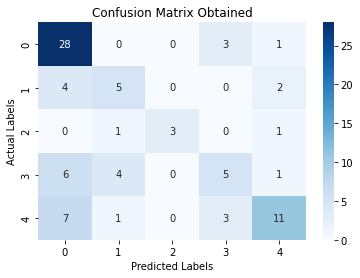

F1-score obtained is  0.5762
Precision obtained is  0.6438
Recall obtained is  0.5484
Classification Report obtained is :
              precision    recall  f1-score   support

           0       0.62      0.88      0.73        32
           1       0.45      0.45      0.45        11
           2       1.00      0.60      0.75         5
           3       0.45      0.31      0.37        16
           4       0.69      0.50      0.58        22

    accuracy                           0.60        86
   macro avg       0.64      0.55      0.58        86
weighted avg       0.61      0.60      0.59        86



,Classifier,f1-score,Precision,Recall
0,Decision Tree ADASYN - After Hyperparameter Tuning and Feature Selection based on PCA,0.3755,0.3707,0.3834
1,KNN ADASYN- After Hyperparameter Tuning and Feature Selection based on PCA,0.4640,0.4562,0.5174
2,SVM ADASYN- After Hyperparameter Tuning and Feature Selection based on PCA,0.5249,0.5402,0.5327
3,RF ADASYN- After Hyperparameter Tuning and Feature Selection based on PCA,0.5762,0.6438,0.5484


In [34]:
best_results_table = []

dt = DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_leaf=5, random_state=0)
adasyn = ADASYN(random_state=rs)
pca = PCA(n_components=18,random_state=rs)
dt_pca_pipeline = Pipeline([('adasyn',adasyn),('pca', pca), ('dt', dt)])
dt_pca_pipeline.fit(X_train,y_train)
dt_pca_pipeline_yPred = dt_pca_pipeline.predict(X_test)
dt_list = ["Decision Tree ADASYN - After Hyperparameter Tuning and Feature Selection based on PCA"]
dt_list.extend(print_metrics(y_test, dt_pca_pipeline_yPred,"Decision Tree - PCA"))
best_results_table.append(dt_list)

knn = KNeighborsClassifier(n_neighbors=1)
adasyn = ADASYN(random_state=rs)
pca = PCA(n_components=227,random_state=rs)
knn_pca_pipeline = Pipeline([('adasyn',adasyn),('pca', pca), ('knn', knn)])
knn_pca_pipeline.fit(X_train,y_train)
knn_pca_pipeline_yPred = knn_pca_pipeline.predict(X_test)
knn_list = ["KNN ADASYN- After Hyperparameter Tuning and Feature Selection based on PCA"]
knn_list.extend(print_metrics(y_test, knn_pca_pipeline_yPred,"KNN - PCA"))
best_results_table.append(knn_list)

svm = SVC(C=78.47599703514607, random_state=0)
adasyn = ADASYN(random_state=rs)
pca = PCA(n_components=86,random_state=rs)
svm_pca_pipeline = Pipeline([('adasyn',adasyn), ('pca', pca), ('svm', svm)])
svm_pca_pipeline.fit(X_train,y_train)
svm_pca_pipeline_yPred = svm_pca_pipeline.predict(X_test)
svm_list = ["SVM ADASYN- After Hyperparameter Tuning and Feature Selection based on PCA"]
svm_list.extend(print_metrics(y_test, svm_pca_pipeline_yPred,"SVM - PCA"))
best_results_table.append(svm_list)

rf = RandomForestClassifier(max_depth=20, n_estimators=80, random_state=0)
adasyn = ADASYN(random_state=rs)
pca = PCA(n_components=125,random_state=rs)
rf_pca_pipeline = Pipeline([('adasyn',adasyn),('pca', pca), ('rf', rf)])
rf_pca_pipeline.fit(X_train,y_train)
rf_pca_pipeline_yPred = rf_pca_pipeline.predict(X_test)
rf_list = ["RF ADASYN- After Hyperparameter Tuning and Feature Selection based on PCA"]
rf_list.extend(print_metrics(y_test, rf_pca_pipeline_yPred,"RF - PCA"))
best_results_table.append(rf_list)

best_results_table

#Tabulating the obtained results and displaying the results by formatting
results_df = pd.DataFrame(best_results_table,columns = ["Classifier","f1-score","Precision","Recall"])
with pd.option_context('display.precision', 4):
    formatted_table=(results_df.style.background_gradient(cmap ='Blues'))
formatted_table

{'knn_pipeline': Pipeline(steps=[('adasyn', ADASYN(random_state=0)),
                ('pca', PCA(n_components=227, random_state=0)),
                ('knn', KNeighborsClassifier(n_neighbors=1))]), 'svm_pipeline': Pipeline(steps=[('adasyn', ADASYN(random_state=0)),
                ('pca', PCA(n_components=86, random_state=0)),
                ('svm', SVC(C=78.47599703514607, random_state=0))]), 'rf_pipeline': Pipeline(steps=[('adasyn', ADASYN(random_state=0)),
                ('pca', PCA(n_components=125, random_state=0)),
                ('rf',
                 RandomForestClassifier(max_depth=20, n_estimators=80,
                                        random_state=0))])}
Results when Random Forest is used as Stacking Classifier


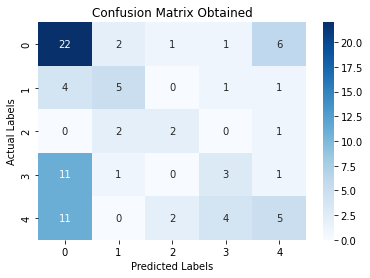

F1-score obtained is  0.3888
Precision obtained is  0.4098
Recall obtained is  0.3914
Classification Report obtained is :
              precision    recall  f1-score   support

           0       0.46      0.69      0.55        32
           1       0.50      0.45      0.48        11
           2       0.40      0.40      0.40         5
           3       0.33      0.19      0.24        16
           4       0.36      0.23      0.28        22

    accuracy                           0.43        86
   macro avg       0.41      0.39      0.39        86
weighted avg       0.41      0.43      0.40        86

Results when AdaBoost is used as Stacking Classifier


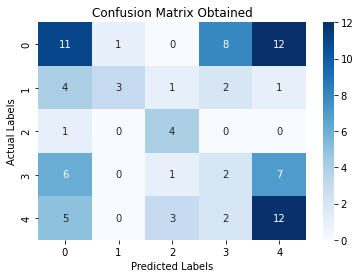

F1-score obtained is  0.3844
Precision obtained is  0.4239
Recall obtained is  0.4174
Classification Report obtained is :
              precision    recall  f1-score   support

           0       0.41      0.34      0.37        32
           1       0.75      0.27      0.40        11
           2       0.44      0.80      0.57         5
           3       0.14      0.12      0.13        16
           4       0.38      0.55      0.44        22

    accuracy                           0.37        86
   macro avg       0.42      0.42      0.38        86
weighted avg       0.40      0.37      0.36        86

[19:25:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Results when XGBoost is used as Stacking Classifier


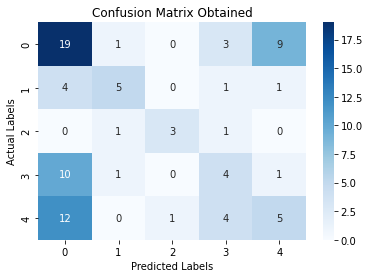

F1-score obtained is  0.4451
Precision obtained is  0.4835
Recall obtained is  0.4251
Classification Report obtained is :
              precision    recall  f1-score   support

           0       0.42      0.59      0.49        32
           1       0.62      0.45      0.53        11
           2       0.75      0.60      0.67         5
           3       0.31      0.25      0.28        16
           4       0.31      0.23      0.26        22

    accuracy                           0.42        86
   macro avg       0.48      0.43      0.45        86
weighted avg       0.42      0.42      0.41        86

Results when Gradient-Boosted Decision Tree is used as Stacking Classifier


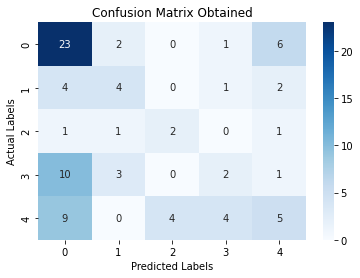

F1-score obtained is  0.3528
Precision obtained is  0.3612
Recall obtained is  0.3669
Classification Report obtained is :
              precision    recall  f1-score   support

           0       0.49      0.72      0.58        32
           1       0.40      0.36      0.38        11
           2       0.33      0.40      0.36         5
           3       0.25      0.12      0.17        16
           4       0.33      0.23      0.27        22

    accuracy                           0.42        86
   macro avg       0.36      0.37      0.35        86
weighted avg       0.38      0.42      0.39        86

Results when Decision Tree is used as Stacking Classifier


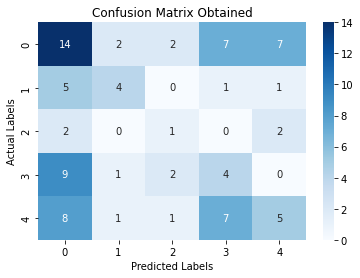

F1-score obtained is  0.3003
Precision obtained is  0.3158
Recall obtained is  0.2957
Classification Report obtained is :
              precision    recall  f1-score   support

           0       0.37      0.44      0.40        32
           1       0.50      0.36      0.42        11
           2       0.17      0.20      0.18         5
           3       0.21      0.25      0.23        16
           4       0.33      0.23      0.27        22

    accuracy                           0.33        86
   macro avg       0.32      0.30      0.30        86
weighted avg       0.34      0.33      0.32        86



,Classifier,f1-score,Precision,Recall
0,RandomForestClassifier - Stacking Classifier,0.3888,0.4098,0.3914
1,AdaBoostClassifier - Stacking Classifier,0.3844,0.4239,0.4174
2,XGBClassifier - Stacking Classifier,0.4451,0.4835,0.4251
3,GradientBoostingClassifier - Stacking Classifier,0.3528,0.3612,0.3669
4,DecisionTreeClassifier - Stacking Classifier,0.3003,0.3158,0.2957


In [35]:
stack_estimators = [knn_pca_pipeline,svm_pca_pipeline,rf_pca_pipeline]
stack_estimators = {str(model)+"_pipeline" : estimator for estimator, model in zip(stack_estimators,["knn","svm","rf"])}
print(stack_estimators)

stack_results = dict()
stack_results_table = []

from sklearn.base import clone
for model,model_name in zip([RandomForestClassifier(random_state=rs)],["Random Forest"]):
    stacking = StackingClassifier([(estName, clone(est)) for estName, est in stack_estimators.items()], model)
    stacking.fit(X_train, y_train)
    stack_results[f'{model.__class__.__name__}'+"_yPred"] = stacking.predict(X_test)
    stack_list = [f'{model.__class__.__name__}'+" - Stacking Classifier"]
    print("Results when {} is used as Stacking Classifier".format(model_name))
    stack_list.extend(print_metrics(y_test, stack_results[f'{model.__class__.__name__}'+"_yPred"], f'{model.__class__.__name__}'+" - Stacking Classifier"))
    stack_results_table.append(stack_list)
	
for model,model_name in zip([AdaBoostClassifier(random_state = rs)],["AdaBoost"]):
    stacking = StackingClassifier([(estName, clone(est)) for estName, est in stack_estimators.items()], model)
    stacking.fit(X_train, y_train)
    stack_results[f'{model.__class__.__name__}'+"_yPred"] = stacking.predict(X_test)
    stack_list = [f'{model.__class__.__name__}'+" - Stacking Classifier"]
    print("Results when {} is used as Stacking Classifier".format(model_name))
    stack_list.extend(print_metrics(y_test, stack_results[f'{model.__class__.__name__}'+"_yPred"], f'{model.__class__.__name__}'+" - Stacking Classifier"))
    stack_results_table.append(stack_list)

from xgboost import XGBClassifier
for model,model_name in zip([XGBClassifier(objective="binary:logistic", random_state=rs)],["XGBoost"]):
    stacking = StackingClassifier([(estName, clone(est)) for estName, est in stack_estimators.items()], model)
    stacking.fit(X_train, y_train)
    stack_results[f'{model.__class__.__name__}'+"_yPred"] = stacking.predict(X_test)
    stack_list = [f'{model.__class__.__name__}'+" - Stacking Classifier"]
    print("Results when {} is used as Stacking Classifier".format(model_name))
    stack_list.extend(print_metrics(y_test, stack_results[f'{model.__class__.__name__}'+"_yPred"], f'{model.__class__.__name__}'+" - Stacking Classifier"))
    stack_results_table.append(stack_list)

for model,model_name in zip([GradientBoostingClassifier(random_state = rs)],["Gradient-Boosted Decision Tree"]):
    stacking = StackingClassifier([(estName, clone(est)) for estName, est in stack_estimators.items()], model)
    stacking.fit(X_train, y_train)
    stack_results[f'{model.__class__.__name__}'+"_yPred"] = stacking.predict(X_test)
    stack_list = [f'{model.__class__.__name__}'+" - Stacking Classifier"]
    print("Results when {} is used as Stacking Classifier".format(model_name))
    stack_list.extend(print_metrics(y_test, stack_results[f'{model.__class__.__name__}'+"_yPred"], f'{model.__class__.__name__}'+" - Stacking Classifier"))
    stack_results_table.append(stack_list)

for model,model_name in zip([DecisionTreeClassifier(random_state=rs)],["Decision Tree"]):
    stacking = StackingClassifier([(estName, clone(est)) for estName, est in stack_estimators.items()], model)
    stacking.fit(X_train, y_train)
    stack_results[f'{model.__class__.__name__}'+"_yPred"] = stacking.predict(X_test)
    stack_list = [f'{model.__class__.__name__}'+" - Stacking Classifier"]
    print("Results when {} is used as Stacking Classifier".format(model_name))
    stack_list.extend(print_metrics(y_test, stack_results[f'{model.__class__.__name__}'+"_yPred"], f'{model.__class__.__name__}'+" - Stacking Classifier"))
    stack_results_table.append(stack_list)

stack_results_table

#Tabulating the obtained results and displaying the results by formatting
results_df = pd.DataFrame(stack_results_table,columns = ["Classifier","f1-score","Precision","Recall"])
with pd.option_context('display.precision', 4):
    formatted_table=(results_df.style.background_gradient(cmap ='Blues'))
formatted_table

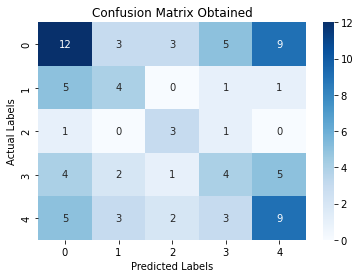

F1-score obtained is  0.3682
Precision obtained is  0.3544
Recall obtained is  0.3995
Classification Report obtained is :
              precision    recall  f1-score   support

           0       0.44      0.38      0.41        32
           1       0.33      0.36      0.35        11
           2       0.33      0.60      0.43         5
           3       0.29      0.25      0.27        16
           4       0.38      0.41      0.39        22

    accuracy                           0.37        86
   macro avg       0.35      0.40      0.37        86
weighted avg       0.38      0.37      0.37        86



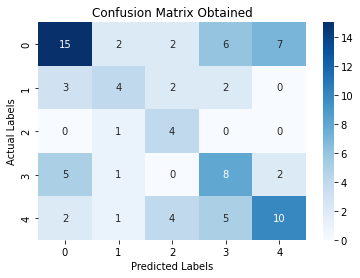

F1-score obtained is  0.4634
Precision obtained is  0.457
Recall obtained is  0.5174
Classification Report obtained is :
              precision    recall  f1-score   support

           0       0.60      0.47      0.53        32
           1       0.44      0.36      0.40        11
           2       0.33      0.80      0.47         5
           3       0.38      0.50      0.43        16
           4       0.53      0.45      0.49        22

    accuracy                           0.48        86
   macro avg       0.46      0.52      0.46        86
weighted avg       0.50      0.48      0.48        86



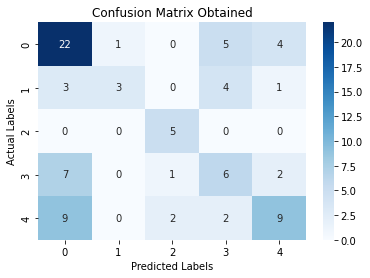

F1-score obtained is  0.5219
Precision obtained is  0.5654
Recall obtained is  0.5489
Classification Report obtained is :
              precision    recall  f1-score   support

           0       0.54      0.69      0.60        32
           1       0.75      0.27      0.40        11
           2       0.62      1.00      0.77         5
           3       0.35      0.38      0.36        16
           4       0.56      0.41      0.47        22

    accuracy                           0.52        86
   macro avg       0.57      0.55      0.52        86
weighted avg       0.54      0.52      0.51        86



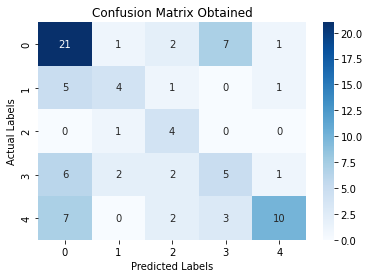

F1-score obtained is  0.4813
Precision obtained is  0.5009
Recall obtained is  0.5174
Classification Report obtained is :
              precision    recall  f1-score   support

           0       0.54      0.66      0.59        32
           1       0.50      0.36      0.42        11
           2       0.36      0.80      0.50         5
           3       0.33      0.31      0.32        16
           4       0.77      0.45      0.57        22

    accuracy                           0.51        86
   macro avg       0.50      0.52      0.48        86
weighted avg       0.54      0.51      0.51        86



,Classifier,f1-score,Precision,Recall
0,Decision Tree ADASYN,0.3682,0.3544,0.3995
1,KNN ADASYN,0.4634,0.4570,0.5174
2,SVM - ADASYN,0.5219,0.5654,0.5489
3,RF ADASYN,0.4813,0.5009,0.5174


In [36]:
best_results_table = []

dt = DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_leaf=5, random_state=0)
adasyn = ADASYN(random_state=rs)
dt_pca_pipeline = Pipeline([('adasyn',adasyn), ('dt', dt)])
dt_pca_pipeline.fit(X_train,y_train)
dt_pca_pipeline_yPred = dt_pca_pipeline.predict(X_test)
dt_list = ["Decision Tree ADASYN"]
dt_list.extend(print_metrics(y_test, dt_pca_pipeline_yPred,"Decision Tree - PCA"))
best_results_table.append(dt_list)

knn = KNeighborsClassifier(n_neighbors=1)
adasyn = ADASYN(random_state=rs)
knn_pca_pipeline = Pipeline([('adasyn',adasyn), ('knn', knn)])
knn_pca_pipeline.fit(X_train,y_train)
knn_pca_pipeline_yPred = knn_pca_pipeline.predict(X_test)
knn_list = ["KNN ADASYN"]
knn_list.extend(print_metrics(y_test, knn_pca_pipeline_yPred,"KNN - PCA"))
best_results_table.append(knn_list)

svm = SVC(C=78.47599703514607, random_state=0)
adasyn = ADASYN(random_state=rs)
svm_pca_pipeline = Pipeline([('adasyn',adasyn), ('svm', svm)])
svm_pca_pipeline.fit(X_train,y_train)
svm_pca_pipeline_yPred = svm_pca_pipeline.predict(X_test)
svm_list = ["SVM - ADASYN"]
svm_list.extend(print_metrics(y_test, svm_pca_pipeline_yPred,"SVM - PCA"))
best_results_table.append(svm_list)

rf = RandomForestClassifier(max_depth=20, n_estimators=80, random_state=0)
adasyn = ADASYN(random_state=rs)
rf_pca_pipeline = Pipeline([('adasyn',adasyn), ('rf', rf)])
rf_pca_pipeline.fit(X_train,y_train)
rf_pca_pipeline_yPred = rf_pca_pipeline.predict(X_test)
rf_list = ["RF ADASYN"]
rf_list.extend(print_metrics(y_test, rf_pca_pipeline_yPred,"RF - PCA"))
best_results_table.append(rf_list)

best_results_table

#Tabulating the obtained results and displaying the results by formatting
results_df = pd.DataFrame(best_results_table,columns = ["Classifier","f1-score","Precision","Recall"])
with pd.option_context('display.precision', 4):
    formatted_table=(results_df.style.background_gradient(cmap ='Blues'))
formatted_table

{'knn_pipeline': Pipeline(steps=[('adasyn', ADASYN(random_state=0)),
                ('knn', KNeighborsClassifier(n_neighbors=1))]), 'svm_pipeline': Pipeline(steps=[('adasyn', ADASYN(random_state=0)),
                ('svm', SVC(C=78.47599703514607, random_state=0))]), 'rf_pipeline': Pipeline(steps=[('adasyn', ADASYN(random_state=0)),
                ('rf',
                 RandomForestClassifier(max_depth=20, n_estimators=80,
                                        random_state=0))])}
Results when Random Forest is used as Stacking Classifier


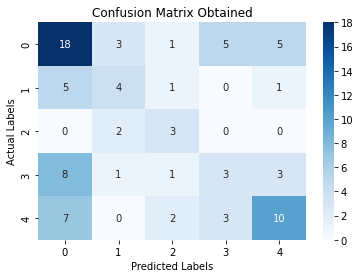

F1-score obtained is  0.4134
Precision obtained is  0.4095
Recall obtained is  0.4336
Classification Report obtained is :
              precision    recall  f1-score   support

           0       0.47      0.56      0.51        32
           1       0.40      0.36      0.38        11
           2       0.38      0.60      0.46         5
           3       0.27      0.19      0.22        16
           4       0.53      0.45      0.49        22

    accuracy                           0.44        86
   macro avg       0.41      0.43      0.41        86
weighted avg       0.43      0.44      0.43        86

Results when AdaBoost is used as Stacking Classifier


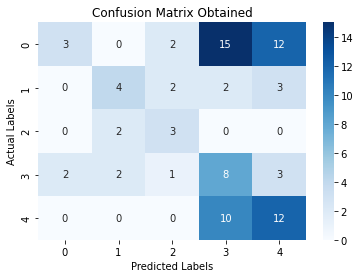

F1-score obtained is  0.364
Precision obtained is  0.4207
Recall obtained is  0.4206
Classification Report obtained is :
              precision    recall  f1-score   support

           0       0.60      0.09      0.16        32
           1       0.50      0.36      0.42        11
           2       0.38      0.60      0.46         5
           3       0.23      0.50      0.31        16
           4       0.40      0.55      0.46        22

    accuracy                           0.35        86
   macro avg       0.42      0.42      0.36        86
weighted avg       0.45      0.35      0.32        86

[19:30:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Results when XGBoost is used as Stacking Classifier


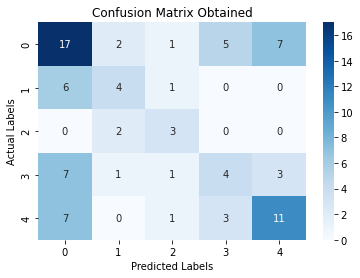

F1-score obtained is  0.438
Precision obtained is  0.4379
Recall obtained is  0.449
Classification Report obtained is :
              precision    recall  f1-score   support

           0       0.46      0.53      0.49        32
           1       0.44      0.36      0.40        11
           2       0.43      0.60      0.50         5
           3       0.33      0.25      0.29        16
           4       0.52      0.50      0.51        22

    accuracy                           0.45        86
   macro avg       0.44      0.45      0.44        86
weighted avg       0.45      0.45      0.45        86

Results when Gradient-Boosted Decision Tree is used as Stacking Classifier


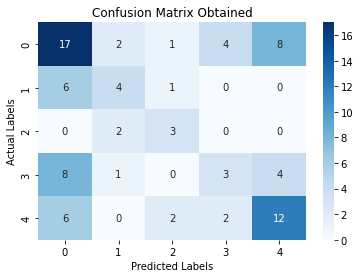

F1-score obtained is  0.4309
Precision obtained is  0.4332
Recall obtained is  0.4456
Classification Report obtained is :
              precision    recall  f1-score   support

           0       0.46      0.53      0.49        32
           1       0.44      0.36      0.40        11
           2       0.43      0.60      0.50         5
           3       0.33      0.19      0.24        16
           4       0.50      0.55      0.52        22

    accuracy                           0.45        86
   macro avg       0.43      0.45      0.43        86
weighted avg       0.44      0.45      0.44        86

Results when Decision Tree is used as Stacking Classifier


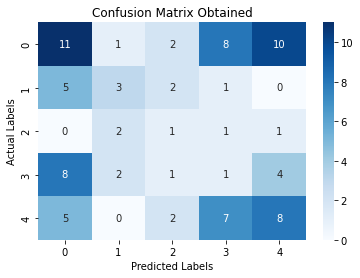

F1-score obtained is  0.2489
Precision obtained is  0.2565
Recall obtained is  0.2485
Classification Report obtained is :
              precision    recall  f1-score   support

           0       0.38      0.34      0.36        32
           1       0.38      0.27      0.32        11
           2       0.12      0.20      0.15         5
           3       0.06      0.06      0.06        16
           4       0.35      0.36      0.36        22

    accuracy                           0.28        86
   macro avg       0.26      0.25      0.25        86
weighted avg       0.30      0.28      0.29        86



,Classifier,f1-score,Precision,Recall
0,RandomForestClassifier - Stacking Classifier,0.4134,0.4095,0.4336
1,AdaBoostClassifier - Stacking Classifier,0.3640,0.4207,0.4206
2,XGBClassifier - Stacking Classifier,0.4380,0.4379,0.4490
3,GradientBoostingClassifier - Stacking Classifier,0.4309,0.4332,0.4456
4,DecisionTreeClassifier - Stacking Classifier,0.2489,0.2565,0.2485


In [37]:
stack_estimators = [knn_pca_pipeline,svm_pca_pipeline,rf_pca_pipeline]
stack_estimators = {str(model)+"_pipeline" : estimator for estimator, model in zip(stack_estimators,["knn","svm","rf"])}
print(stack_estimators)

stack_results = dict()
stack_results_table = []

from sklearn.base import clone
for model,model_name in zip([RandomForestClassifier(random_state=rs)],["Random Forest"]):
    stacking = StackingClassifier([(estName, clone(est)) for estName, est in stack_estimators.items()], model)
    stacking.fit(X_train, y_train)
    stack_results[f'{model.__class__.__name__}'+"_yPred"] = stacking.predict(X_test)
    stack_list = [f'{model.__class__.__name__}'+" - Stacking Classifier"]
    print("Results when {} is used as Stacking Classifier".format(model_name))
    stack_list.extend(print_metrics(y_test, stack_results[f'{model.__class__.__name__}'+"_yPred"], f'{model.__class__.__name__}'+" - Stacking Classifier"))
    stack_results_table.append(stack_list)
	
for model,model_name in zip([AdaBoostClassifier(random_state = rs)],["AdaBoost"]):
    stacking = StackingClassifier([(estName, clone(est)) for estName, est in stack_estimators.items()], model)
    stacking.fit(X_train, y_train)
    stack_results[f'{model.__class__.__name__}'+"_yPred"] = stacking.predict(X_test)
    stack_list = [f'{model.__class__.__name__}'+" - Stacking Classifier"]
    print("Results when {} is used as Stacking Classifier".format(model_name))
    stack_list.extend(print_metrics(y_test, stack_results[f'{model.__class__.__name__}'+"_yPred"], f'{model.__class__.__name__}'+" - Stacking Classifier"))
    stack_results_table.append(stack_list)

from xgboost import XGBClassifier
for model,model_name in zip([XGBClassifier(objective="binary:logistic", random_state=rs)],["XGBoost"]):
    stacking = StackingClassifier([(estName, clone(est)) for estName, est in stack_estimators.items()], model)
    stacking.fit(X_train, y_train)
    stack_results[f'{model.__class__.__name__}'+"_yPred"] = stacking.predict(X_test)
    stack_list = [f'{model.__class__.__name__}'+" - Stacking Classifier"]
    print("Results when {} is used as Stacking Classifier".format(model_name))
    stack_list.extend(print_metrics(y_test, stack_results[f'{model.__class__.__name__}'+"_yPred"], f'{model.__class__.__name__}'+" - Stacking Classifier"))
    stack_results_table.append(stack_list)

for model,model_name in zip([GradientBoostingClassifier(random_state = rs)],["Gradient-Boosted Decision Tree"]):
    stacking = StackingClassifier([(estName, clone(est)) for estName, est in stack_estimators.items()], model)
    stacking.fit(X_train, y_train)
    stack_results[f'{model.__class__.__name__}'+"_yPred"] = stacking.predict(X_test)
    stack_list = [f'{model.__class__.__name__}'+" - Stacking Classifier"]
    print("Results when {} is used as Stacking Classifier".format(model_name))
    stack_list.extend(print_metrics(y_test, stack_results[f'{model.__class__.__name__}'+"_yPred"], f'{model.__class__.__name__}'+" - Stacking Classifier"))
    stack_results_table.append(stack_list)

for model,model_name in zip([DecisionTreeClassifier(random_state=rs)],["Decision Tree"]):
    stacking = StackingClassifier([(estName, clone(est)) for estName, est in stack_estimators.items()], model)
    stacking.fit(X_train, y_train)
    stack_results[f'{model.__class__.__name__}'+"_yPred"] = stacking.predict(X_test)
    stack_list = [f'{model.__class__.__name__}'+" - Stacking Classifier"]
    print("Results when {} is used as Stacking Classifier".format(model_name))
    stack_list.extend(print_metrics(y_test, stack_results[f'{model.__class__.__name__}'+"_yPred"], f'{model.__class__.__name__}'+" - Stacking Classifier"))
    stack_results_table.append(stack_list)

stack_results_table

#Tabulating the obtained results and displaying the results by formatting
results_df = pd.DataFrame(stack_results_table,columns = ["Classifier","f1-score","Precision","Recall"])
with pd.option_context('display.precision', 4):
    formatted_table=(results_df.style.background_gradient(cmap ='Blues'))
formatted_table

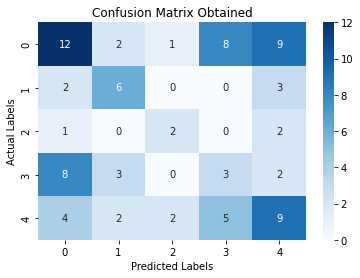

F1-score obtained is  0.3755
Precision obtained is  0.3707
Recall obtained is  0.3834
Classification Report obtained is :
              precision    recall  f1-score   support

           0       0.44      0.38      0.41        32
           1       0.46      0.55      0.50        11
           2       0.40      0.40      0.40         5
           3       0.19      0.19      0.19        16
           4       0.36      0.41      0.38        22

    accuracy                           0.37        86
   macro avg       0.37      0.38      0.38        86
weighted avg       0.37      0.37      0.37        86



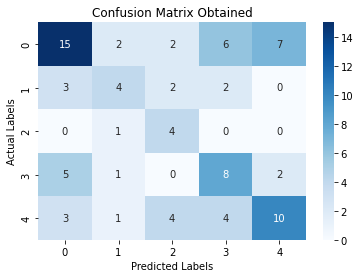

F1-score obtained is  0.464
Precision obtained is  0.4562
Recall obtained is  0.5174
Classification Report obtained is :
              precision    recall  f1-score   support

           0       0.58      0.47      0.52        32
           1       0.44      0.36      0.40        11
           2       0.33      0.80      0.47         5
           3       0.40      0.50      0.44        16
           4       0.53      0.45      0.49        22

    accuracy                           0.48        86
   macro avg       0.46      0.52      0.46        86
weighted avg       0.50      0.48      0.48        86



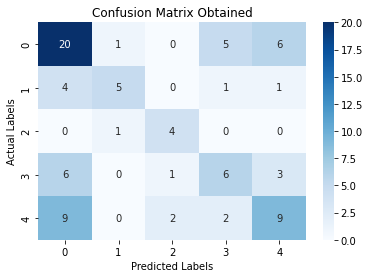

F1-score obtained is  0.5249
Precision obtained is  0.5402
Recall obtained is  0.5327
Classification Report obtained is :
              precision    recall  f1-score   support

           0       0.51      0.62      0.56        32
           1       0.71      0.45      0.56        11
           2       0.57      0.80      0.67         5
           3       0.43      0.38      0.40        16
           4       0.47      0.41      0.44        22

    accuracy                           0.51        86
   macro avg       0.54      0.53      0.52        86
weighted avg       0.52      0.51      0.51        86



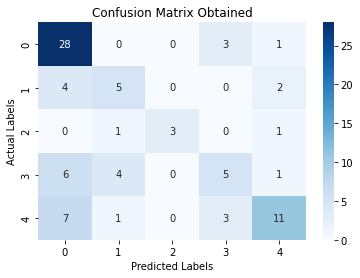

F1-score obtained is  0.5762
Precision obtained is  0.6438
Recall obtained is  0.5484
Classification Report obtained is :
              precision    recall  f1-score   support

           0       0.62      0.88      0.73        32
           1       0.45      0.45      0.45        11
           2       1.00      0.60      0.75         5
           3       0.45      0.31      0.37        16
           4       0.69      0.50      0.58        22

    accuracy                           0.60        86
   macro avg       0.64      0.55      0.58        86
weighted avg       0.61      0.60      0.59        86



,Classifier,f1-score,Precision,Recall
0,Decision Tree ADASYN - After Hyperparameter Tuning and Feature Selection based on PCA,0.3755,0.3707,0.3834
1,KNN ADASYN- After Hyperparameter Tuning and Feature Selection based on PCA,0.4640,0.4562,0.5174
2,SVM ADASYN- After Hyperparameter Tuning and Feature Selection based on PCA,0.5249,0.5402,0.5327
3,RF ADASYN- After Hyperparameter Tuning and Feature Selection based on PCA,0.5762,0.6438,0.5484


In [38]:
best_results_table = []

dt = DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_leaf=5, random_state=0)
adasyn = ADASYN(random_state=rs)
pca = PCA(n_components=18,random_state=rs)
dt_pca_pipeline = Pipeline([('adasyn',adasyn),('pca', pca), ('dt', dt)])
dt_pca_pipeline.fit(X_train,y_train)
dt_pca_pipeline_yPred = dt_pca_pipeline.predict(X_test)
dt_list = ["Decision Tree ADASYN - After Hyperparameter Tuning and Feature Selection based on PCA"]
dt_list.extend(print_metrics(y_test, dt_pca_pipeline_yPred,"Decision Tree - PCA"))
best_results_table.append(dt_list)

knn = KNeighborsClassifier(n_neighbors=1)
adasyn = ADASYN(random_state=rs)
pca = PCA(n_components=227,random_state=rs)
knn_pca_pipeline = Pipeline([('adasyn',adasyn),('pca', pca), ('knn', knn)])
knn_pca_pipeline.fit(X_train,y_train)
knn_pca_pipeline_yPred = knn_pca_pipeline.predict(X_test)
knn_list = ["KNN ADASYN- After Hyperparameter Tuning and Feature Selection based on PCA"]
knn_list.extend(print_metrics(y_test, knn_pca_pipeline_yPred,"KNN - PCA"))
best_results_table.append(knn_list)

svm = SVC(C=78.47599703514607, random_state=0)
adasyn = ADASYN(random_state=rs)
pca = PCA(n_components=86,random_state=rs)
svm_pca_pipeline = Pipeline([('adasyn',adasyn), ('pca', pca), ('svm', svm)])
svm_pca_pipeline.fit(X_train,y_train)
svm_pca_pipeline_yPred = svm_pca_pipeline.predict(X_test)
svm_list = ["SVM ADASYN- After Hyperparameter Tuning and Feature Selection based on PCA"]
svm_list.extend(print_metrics(y_test, svm_pca_pipeline_yPred,"SVM - PCA"))
best_results_table.append(svm_list)

rf = RandomForestClassifier(max_depth=20, n_estimators=80, random_state=0)
adasyn = ADASYN(random_state=rs)
pca = PCA(n_components=125,random_state=rs)
rf_pca_pipeline = Pipeline([('adasyn',adasyn),('pca', pca), ('rf', rf)])
rf_pca_pipeline.fit(X_train,y_train)
rf_pca_pipeline_yPred = rf_pca_pipeline.predict(X_test)
rf_list = ["RF ADASYN- After Hyperparameter Tuning and Feature Selection based on PCA"]
rf_list.extend(print_metrics(y_test, rf_pca_pipeline_yPred,"RF - PCA"))
best_results_table.append(rf_list)

best_results_table

#Tabulating the obtained results and displaying the results by formatting
results_df = pd.DataFrame(best_results_table,columns = ["Classifier","f1-score","Precision","Recall"])
with pd.option_context('display.precision', 4):
    formatted_table=(results_df.style.background_gradient(cmap ='Blues'))
formatted_table

{'svm_pipeline': Pipeline(steps=[('adasyn', ADASYN(random_state=0)),
                ('pca', PCA(n_components=86, random_state=0)),
                ('svm', SVC(C=78.47599703514607, random_state=0))]), 'rf_pipeline': Pipeline(steps=[('adasyn', ADASYN(random_state=0)),
                ('pca', PCA(n_components=125, random_state=0)),
                ('rf',
                 RandomForestClassifier(max_depth=20, n_estimators=80,
                                        random_state=0))])}
Results when Random Forest is used as Stacking Classifier


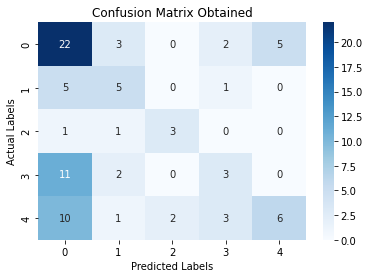

F1-score obtained is  0.4363
Precision obtained is  0.4689
Recall obtained is  0.4405
Classification Report obtained is :
              precision    recall  f1-score   support

           0       0.45      0.69      0.54        32
           1       0.42      0.45      0.43        11
           2       0.60      0.60      0.60         5
           3       0.33      0.19      0.24        16
           4       0.55      0.27      0.36        22

    accuracy                           0.45        86
   macro avg       0.47      0.44      0.44        86
weighted avg       0.46      0.45      0.43        86

Results when AdaBoost is used as Stacking Classifier


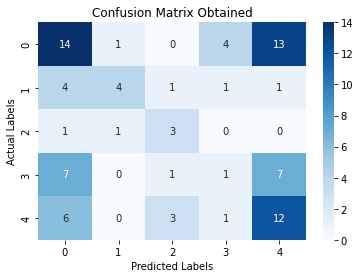

F1-score obtained is  0.3786
Precision obtained is  0.3971
Recall obtained is  0.4018
Classification Report obtained is :
              precision    recall  f1-score   support

           0       0.44      0.44      0.44        32
           1       0.67      0.36      0.47        11
           2       0.38      0.60      0.46         5
           3       0.14      0.06      0.09        16
           4       0.36      0.55      0.44        22

    accuracy                           0.40        86
   macro avg       0.40      0.40      0.38        86
weighted avg       0.39      0.40      0.38        86

[19:33:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Results when XGBoost is used as Stacking Classifier


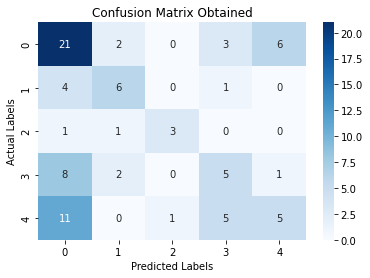

F1-score obtained is  0.477
Precision obtained is  0.5072
Recall obtained is  0.4683
Classification Report obtained is :
              precision    recall  f1-score   support

           0       0.47      0.66      0.55        32
           1       0.55      0.55      0.55        11
           2       0.75      0.60      0.67         5
           3       0.36      0.31      0.33        16
           4       0.42      0.23      0.29        22

    accuracy                           0.47        86
   macro avg       0.51      0.47      0.48        86
weighted avg       0.46      0.47      0.45        86

Results when Gradient-Boosted Decision Tree is used as Stacking Classifier


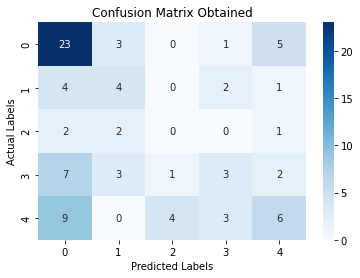

F1-score obtained is  0.3019
Precision obtained is  0.3156
Recall obtained is  0.3085
Classification Report obtained is :
              precision    recall  f1-score   support

           0       0.51      0.72      0.60        32
           1       0.33      0.36      0.35        11
           2       0.00      0.00      0.00         5
           3       0.33      0.19      0.24        16
           4       0.40      0.27      0.32        22

    accuracy                           0.42        86
   macro avg       0.32      0.31      0.30        86
weighted avg       0.40      0.42      0.39        86

Results when Decision Tree is used as Stacking Classifier


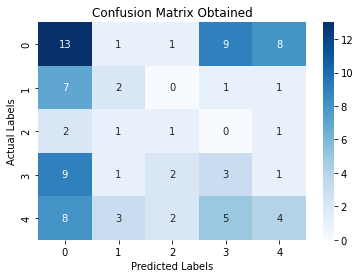

F1-score obtained is  0.2302
Precision obtained is  0.2367
Recall obtained is  0.2315
Classification Report obtained is :
              precision    recall  f1-score   support

           0       0.33      0.41      0.37        32
           1       0.25      0.18      0.21        11
           2       0.17      0.20      0.18         5
           3       0.17      0.19      0.18        16
           4       0.27      0.18      0.22        22

    accuracy                           0.27        86
   macro avg       0.24      0.23      0.23        86
weighted avg       0.26      0.27      0.26        86



,Classifier,f1-score,Precision,Recall
0,RandomForestClassifier - Stacking Classifier,0.4363,0.4689,0.4405
1,AdaBoostClassifier - Stacking Classifier,0.3786,0.3971,0.4018
2,XGBClassifier - Stacking Classifier,0.4770,0.5072,0.4683
3,GradientBoostingClassifier - Stacking Classifier,0.3019,0.3156,0.3085
4,DecisionTreeClassifier - Stacking Classifier,0.2302,0.2367,0.2315


In [39]:
stack_estimators = [svm_pca_pipeline,rf_pca_pipeline]
stack_estimators = {str(model)+"_pipeline" : estimator for estimator, model in zip(stack_estimators,["svm","rf"])}
print(stack_estimators)

stack_results = dict()
stack_results_table = []

from sklearn.base import clone
for model,model_name in zip([RandomForestClassifier(random_state=rs)],["Random Forest"]):
    stacking = StackingClassifier([(estName, clone(est)) for estName, est in stack_estimators.items()], model)
    stacking.fit(X_train, y_train)
    stack_results[f'{model.__class__.__name__}'+"_yPred"] = stacking.predict(X_test)
    stack_list = [f'{model.__class__.__name__}'+" - Stacking Classifier"]
    print("Results when {} is used as Stacking Classifier".format(model_name))
    stack_list.extend(print_metrics(y_test, stack_results[f'{model.__class__.__name__}'+"_yPred"], f'{model.__class__.__name__}'+" - Stacking Classifier"))
    stack_results_table.append(stack_list)
	
for model,model_name in zip([AdaBoostClassifier(random_state = rs)],["AdaBoost"]):
    stacking = StackingClassifier([(estName, clone(est)) for estName, est in stack_estimators.items()], model)
    stacking.fit(X_train, y_train)
    stack_results[f'{model.__class__.__name__}'+"_yPred"] = stacking.predict(X_test)
    stack_list = [f'{model.__class__.__name__}'+" - Stacking Classifier"]
    print("Results when {} is used as Stacking Classifier".format(model_name))
    stack_list.extend(print_metrics(y_test, stack_results[f'{model.__class__.__name__}'+"_yPred"], f'{model.__class__.__name__}'+" - Stacking Classifier"))
    stack_results_table.append(stack_list)

from xgboost import XGBClassifier
for model,model_name in zip([XGBClassifier(objective="binary:logistic", random_state=rs)],["XGBoost"]):
    stacking = StackingClassifier([(estName, clone(est)) for estName, est in stack_estimators.items()], model)
    stacking.fit(X_train, y_train)
    stack_results[f'{model.__class__.__name__}'+"_yPred"] = stacking.predict(X_test)
    stack_list = [f'{model.__class__.__name__}'+" - Stacking Classifier"]
    print("Results when {} is used as Stacking Classifier".format(model_name))
    stack_list.extend(print_metrics(y_test, stack_results[f'{model.__class__.__name__}'+"_yPred"], f'{model.__class__.__name__}'+" - Stacking Classifier"))
    stack_results_table.append(stack_list)

for model,model_name in zip([GradientBoostingClassifier(random_state = rs)],["Gradient-Boosted Decision Tree"]):
    stacking = StackingClassifier([(estName, clone(est)) for estName, est in stack_estimators.items()], model)
    stacking.fit(X_train, y_train)
    stack_results[f'{model.__class__.__name__}'+"_yPred"] = stacking.predict(X_test)
    stack_list = [f'{model.__class__.__name__}'+" - Stacking Classifier"]
    print("Results when {} is used as Stacking Classifier".format(model_name))
    stack_list.extend(print_metrics(y_test, stack_results[f'{model.__class__.__name__}'+"_yPred"], f'{model.__class__.__name__}'+" - Stacking Classifier"))
    stack_results_table.append(stack_list)

for model,model_name in zip([DecisionTreeClassifier(random_state=rs)],["Decision Tree"]):
    stacking = StackingClassifier([(estName, clone(est)) for estName, est in stack_estimators.items()], model)
    stacking.fit(X_train, y_train)
    stack_results[f'{model.__class__.__name__}'+"_yPred"] = stacking.predict(X_test)
    stack_list = [f'{model.__class__.__name__}'+" - Stacking Classifier"]
    print("Results when {} is used as Stacking Classifier".format(model_name))
    stack_list.extend(print_metrics(y_test, stack_results[f'{model.__class__.__name__}'+"_yPred"], f'{model.__class__.__name__}'+" - Stacking Classifier"))
    stack_results_table.append(stack_list)

stack_results_table

#Tabulating the obtained results and displaying the results by formatting
results_df = pd.DataFrame(stack_results_table,columns = ["Classifier","f1-score","Precision","Recall"])
with pd.option_context('display.precision', 4):
    formatted_table=(results_df.style.background_gradient(cmap ='Blues'))
formatted_table

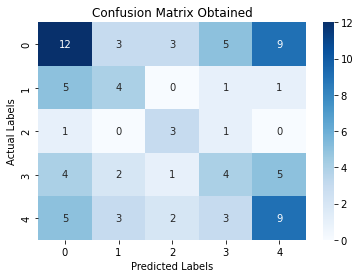

F1-score obtained is  0.3682
Precision obtained is  0.3544
Recall obtained is  0.3995
Classification Report obtained is :
              precision    recall  f1-score   support

           0       0.44      0.38      0.41        32
           1       0.33      0.36      0.35        11
           2       0.33      0.60      0.43         5
           3       0.29      0.25      0.27        16
           4       0.38      0.41      0.39        22

    accuracy                           0.37        86
   macro avg       0.35      0.40      0.37        86
weighted avg       0.38      0.37      0.37        86



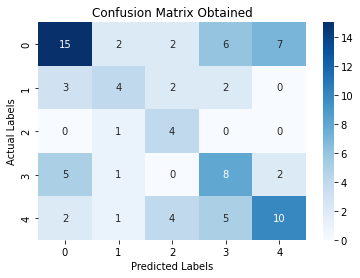

F1-score obtained is  0.4634
Precision obtained is  0.457
Recall obtained is  0.5174
Classification Report obtained is :
              precision    recall  f1-score   support

           0       0.60      0.47      0.53        32
           1       0.44      0.36      0.40        11
           2       0.33      0.80      0.47         5
           3       0.38      0.50      0.43        16
           4       0.53      0.45      0.49        22

    accuracy                           0.48        86
   macro avg       0.46      0.52      0.46        86
weighted avg       0.50      0.48      0.48        86



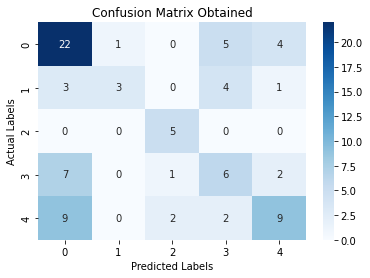

F1-score obtained is  0.5219
Precision obtained is  0.5654
Recall obtained is  0.5489
Classification Report obtained is :
              precision    recall  f1-score   support

           0       0.54      0.69      0.60        32
           1       0.75      0.27      0.40        11
           2       0.62      1.00      0.77         5
           3       0.35      0.38      0.36        16
           4       0.56      0.41      0.47        22

    accuracy                           0.52        86
   macro avg       0.57      0.55      0.52        86
weighted avg       0.54      0.52      0.51        86



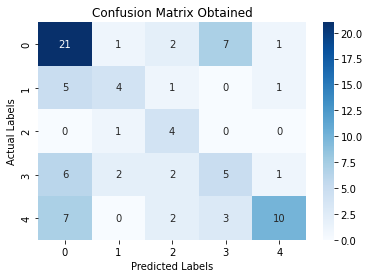

F1-score obtained is  0.4813
Precision obtained is  0.5009
Recall obtained is  0.5174
Classification Report obtained is :
              precision    recall  f1-score   support

           0       0.54      0.66      0.59        32
           1       0.50      0.36      0.42        11
           2       0.36      0.80      0.50         5
           3       0.33      0.31      0.32        16
           4       0.77      0.45      0.57        22

    accuracy                           0.51        86
   macro avg       0.50      0.52      0.48        86
weighted avg       0.54      0.51      0.51        86



,Classifier,f1-score,Precision,Recall
0,Decision Tree ADASYN,0.3682,0.3544,0.3995
1,KNN ADASYN,0.4634,0.4570,0.5174
2,SVM - ADASYN,0.5219,0.5654,0.5489
3,RF ADASYN,0.4813,0.5009,0.5174


In [40]:
best_results_table = []

dt = DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_leaf=5, random_state=0)
adasyn = ADASYN(random_state=rs)
dt_pca_pipeline = Pipeline([('adasyn',adasyn), ('dt', dt)])
dt_pca_pipeline.fit(X_train,y_train)
dt_pca_pipeline_yPred = dt_pca_pipeline.predict(X_test)
dt_list = ["Decision Tree ADASYN"]
dt_list.extend(print_metrics(y_test, dt_pca_pipeline_yPred,"Decision Tree - PCA"))
best_results_table.append(dt_list)

knn = KNeighborsClassifier(n_neighbors=1)
adasyn = ADASYN(random_state=rs)
knn_pca_pipeline = Pipeline([('adasyn',adasyn), ('knn', knn)])
knn_pca_pipeline.fit(X_train,y_train)
knn_pca_pipeline_yPred = knn_pca_pipeline.predict(X_test)
knn_list = ["KNN ADASYN"]
knn_list.extend(print_metrics(y_test, knn_pca_pipeline_yPred,"KNN - PCA"))
best_results_table.append(knn_list)

svm = SVC(C=78.47599703514607, random_state=0)
adasyn = ADASYN(random_state=rs)
svm_pca_pipeline = Pipeline([('adasyn',adasyn), ('svm', svm)])
svm_pca_pipeline.fit(X_train,y_train)
svm_pca_pipeline_yPred = svm_pca_pipeline.predict(X_test)
svm_list = ["SVM - ADASYN"]
svm_list.extend(print_metrics(y_test, svm_pca_pipeline_yPred,"SVM - PCA"))
best_results_table.append(svm_list)

rf = RandomForestClassifier(max_depth=20, n_estimators=80, random_state=0)
adasyn = ADASYN(random_state=rs)
rf_pca_pipeline = Pipeline([('adasyn',adasyn), ('rf', rf)])
rf_pca_pipeline.fit(X_train,y_train)
rf_pca_pipeline_yPred = rf_pca_pipeline.predict(X_test)
rf_list = ["RF ADASYN"]
rf_list.extend(print_metrics(y_test, rf_pca_pipeline_yPred,"RF - PCA"))
best_results_table.append(rf_list)

best_results_table

#Tabulating the obtained results and displaying the results by formatting
results_df = pd.DataFrame(best_results_table,columns = ["Classifier","f1-score","Precision","Recall"])
with pd.option_context('display.precision', 4):
    formatted_table=(results_df.style.background_gradient(cmap ='Blues'))
formatted_table

{'svm_pipeline': Pipeline(steps=[('adasyn', ADASYN(random_state=0)),
                ('svm', SVC(C=78.47599703514607, random_state=0))]), 'rf_pipeline': Pipeline(steps=[('adasyn', ADASYN(random_state=0)),
                ('rf',
                 RandomForestClassifier(max_depth=20, n_estimators=80,
                                        random_state=0))])}
Results when Random Forest is used as Stacking Classifier


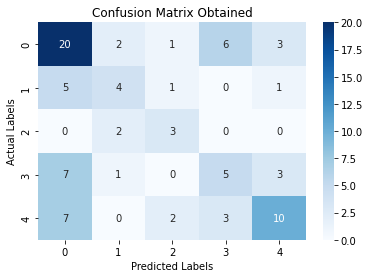

F1-score obtained is  0.4619
Precision obtained is  0.4662
Recall obtained is  0.4711
Classification Report obtained is :
              precision    recall  f1-score   support

           0       0.51      0.62      0.56        32
           1       0.44      0.36      0.40        11
           2       0.43      0.60      0.50         5
           3       0.36      0.31      0.33        16
           4       0.59      0.45      0.51        22

    accuracy                           0.49        86
   macro avg       0.47      0.47      0.46        86
weighted avg       0.49      0.49      0.48        86

Results when AdaBoost is used as Stacking Classifier


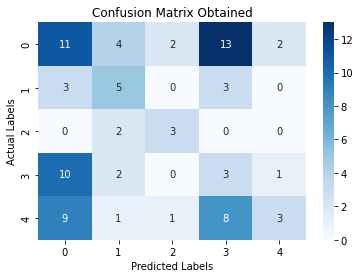

F1-score obtained is  0.3275
Precision obtained is  0.3603
Recall obtained is  0.3444
Classification Report obtained is :
              precision    recall  f1-score   support

           0       0.33      0.34      0.34        32
           1       0.36      0.45      0.40        11
           2       0.50      0.60      0.55         5
           3       0.11      0.19      0.14        16
           4       0.50      0.14      0.21        22

    accuracy                           0.29        86
   macro avg       0.36      0.34      0.33        86
weighted avg       0.35      0.29      0.29        86

[19:36:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Results when XGBoost is used as Stacking Classifier


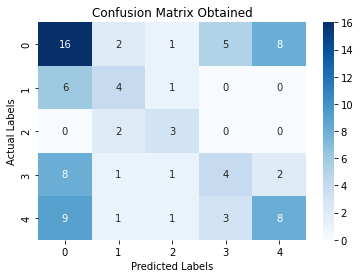

F1-score obtained is  0.4035
Precision obtained is  0.4033
Recall obtained is  0.4155
Classification Report obtained is :
              precision    recall  f1-score   support

           0       0.41      0.50      0.45        32
           1       0.40      0.36      0.38        11
           2       0.43      0.60      0.50         5
           3       0.33      0.25      0.29        16
           4       0.44      0.36      0.40        22

    accuracy                           0.41        86
   macro avg       0.40      0.42      0.40        86
weighted avg       0.40      0.41      0.40        86

Results when Gradient-Boosted Decision Tree is used as Stacking Classifier


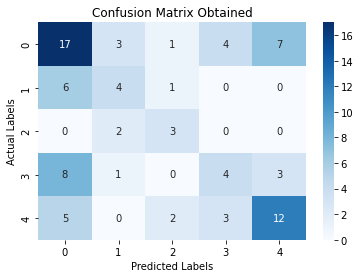

F1-score obtained is  0.4445
Precision obtained is  0.442
Recall obtained is  0.4581
Classification Report obtained is :
              precision    recall  f1-score   support

           0       0.47      0.53      0.50        32
           1       0.40      0.36      0.38        11
           2       0.43      0.60      0.50         5
           3       0.36      0.25      0.30        16
           4       0.55      0.55      0.55        22

    accuracy                           0.47        86
   macro avg       0.44      0.46      0.44        86
weighted avg       0.46      0.47      0.46        86

Results when Decision Tree is used as Stacking Classifier


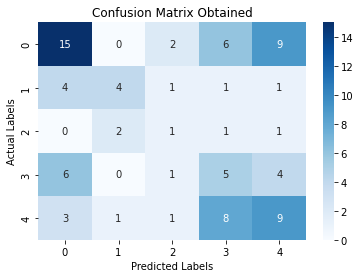

F1-score obtained is  0.3576
Precision obtained is  0.3774
Recall obtained is  0.3508
Classification Report obtained is :
              precision    recall  f1-score   support

           0       0.54      0.47      0.50        32
           1       0.57      0.36      0.44        11
           2       0.17      0.20      0.18         5
           3       0.24      0.31      0.27        16
           4       0.38      0.41      0.39        22

    accuracy                           0.40        86
   macro avg       0.38      0.35      0.36        86
weighted avg       0.42      0.40      0.40        86



,Classifier,f1-score,Precision,Recall
0,RandomForestClassifier - Stacking Classifier,0.4619,0.4662,0.4711
1,AdaBoostClassifier - Stacking Classifier,0.3275,0.3603,0.3444
2,XGBClassifier - Stacking Classifier,0.4035,0.4033,0.4155
3,GradientBoostingClassifier - Stacking Classifier,0.4445,0.4420,0.4581
4,DecisionTreeClassifier - Stacking Classifier,0.3576,0.3774,0.3508


In [41]:
stack_estimators = [svm_pca_pipeline,rf_pca_pipeline]
stack_estimators = {str(model)+"_pipeline" : estimator for estimator, model in zip(stack_estimators,["svm","rf"])}
print(stack_estimators)

stack_results = dict()
stack_results_table = []

from sklearn.base import clone
for model,model_name in zip([RandomForestClassifier(random_state=rs)],["Random Forest"]):
    stacking = StackingClassifier([(estName, clone(est)) for estName, est in stack_estimators.items()], model)
    stacking.fit(X_train, y_train)
    stack_results[f'{model.__class__.__name__}'+"_yPred"] = stacking.predict(X_test)
    stack_list = [f'{model.__class__.__name__}'+" - Stacking Classifier"]
    print("Results when {} is used as Stacking Classifier".format(model_name))
    stack_list.extend(print_metrics(y_test, stack_results[f'{model.__class__.__name__}'+"_yPred"], f'{model.__class__.__name__}'+" - Stacking Classifier"))
    stack_results_table.append(stack_list)
	
for model,model_name in zip([AdaBoostClassifier(random_state = rs)],["AdaBoost"]):
    stacking = StackingClassifier([(estName, clone(est)) for estName, est in stack_estimators.items()], model)
    stacking.fit(X_train, y_train)
    stack_results[f'{model.__class__.__name__}'+"_yPred"] = stacking.predict(X_test)
    stack_list = [f'{model.__class__.__name__}'+" - Stacking Classifier"]
    print("Results when {} is used as Stacking Classifier".format(model_name))
    stack_list.extend(print_metrics(y_test, stack_results[f'{model.__class__.__name__}'+"_yPred"], f'{model.__class__.__name__}'+" - Stacking Classifier"))
    stack_results_table.append(stack_list)

from xgboost import XGBClassifier
for model,model_name in zip([XGBClassifier(objective="binary:logistic", random_state=rs)],["XGBoost"]):
    stacking = StackingClassifier([(estName, clone(est)) for estName, est in stack_estimators.items()], model)
    stacking.fit(X_train, y_train)
    stack_results[f'{model.__class__.__name__}'+"_yPred"] = stacking.predict(X_test)
    stack_list = [f'{model.__class__.__name__}'+" - Stacking Classifier"]
    print("Results when {} is used as Stacking Classifier".format(model_name))
    stack_list.extend(print_metrics(y_test, stack_results[f'{model.__class__.__name__}'+"_yPred"], f'{model.__class__.__name__}'+" - Stacking Classifier"))
    stack_results_table.append(stack_list)

for model,model_name in zip([GradientBoostingClassifier(random_state = rs)],["Gradient-Boosted Decision Tree"]):
    stacking = StackingClassifier([(estName, clone(est)) for estName, est in stack_estimators.items()], model)
    stacking.fit(X_train, y_train)
    stack_results[f'{model.__class__.__name__}'+"_yPred"] = stacking.predict(X_test)
    stack_list = [f'{model.__class__.__name__}'+" - Stacking Classifier"]
    print("Results when {} is used as Stacking Classifier".format(model_name))
    stack_list.extend(print_metrics(y_test, stack_results[f'{model.__class__.__name__}'+"_yPred"], f'{model.__class__.__name__}'+" - Stacking Classifier"))
    stack_results_table.append(stack_list)

for model,model_name in zip([DecisionTreeClassifier(random_state=rs)],["Decision Tree"]):
    stacking = StackingClassifier([(estName, clone(est)) for estName, est in stack_estimators.items()], model)
    stacking.fit(X_train, y_train)
    stack_results[f'{model.__class__.__name__}'+"_yPred"] = stacking.predict(X_test)
    stack_list = [f'{model.__class__.__name__}'+" - Stacking Classifier"]
    print("Results when {} is used as Stacking Classifier".format(model_name))
    stack_list.extend(print_metrics(y_test, stack_results[f'{model.__class__.__name__}'+"_yPred"], f'{model.__class__.__name__}'+" - Stacking Classifier"))
    stack_results_table.append(stack_list)

stack_results_table

#Tabulating the obtained results and displaying the results by formatting
results_df = pd.DataFrame(stack_results_table,columns = ["Classifier","f1-score","Precision","Recall"])
with pd.option_context('display.precision', 4):
    formatted_table=(results_df.style.background_gradient(cmap ='Blues'))
formatted_table

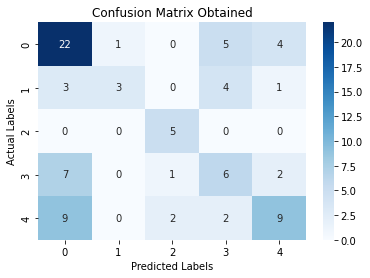

F1-score obtained is  0.5219
Precision obtained is  0.5654
Recall obtained is  0.5489
Classification Report obtained is :
              precision    recall  f1-score   support

           0       0.54      0.69      0.60        32
           1       0.75      0.27      0.40        11
           2       0.62      1.00      0.77         5
           3       0.35      0.38      0.36        16
           4       0.56      0.41      0.47        22

    accuracy                           0.52        86
   macro avg       0.57      0.55      0.52        86
weighted avg       0.54      0.52      0.51        86



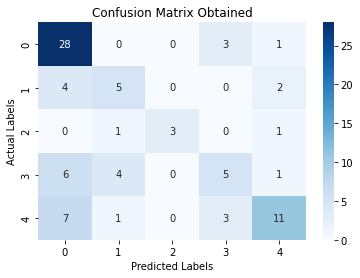

F1-score obtained is  0.5762
Precision obtained is  0.6438
Recall obtained is  0.5484
Classification Report obtained is :
              precision    recall  f1-score   support

           0       0.62      0.88      0.73        32
           1       0.45      0.45      0.45        11
           2       1.00      0.60      0.75         5
           3       0.45      0.31      0.37        16
           4       0.69      0.50      0.58        22

    accuracy                           0.60        86
   macro avg       0.64      0.55      0.58        86
weighted avg       0.61      0.60      0.59        86



,Classifier,f1-score,Precision,Recall
0,SVM - ADASYN,0.5219,0.5654,0.5489
1,RF ADASYN- After Hyperparameter Tuning and Feature Selection based on PCA,0.5762,0.6438,0.5484


In [42]:
best_results_table = []

svm = SVC(C=78.47599703514607, random_state=0)
adasyn = ADASYN(random_state=rs)
svm_pca_pipeline = Pipeline([('adasyn',adasyn), ('svm', svm)])
svm_pca_pipeline.fit(X_train,y_train)
svm_pca_pipeline_yPred = svm_pca_pipeline.predict(X_test)
svm_list = ["SVM - ADASYN"]
svm_list.extend(print_metrics(y_test, svm_pca_pipeline_yPred,"SVM - PCA"))
best_results_table.append(svm_list)

rf = RandomForestClassifier(max_depth=20, n_estimators=80, random_state=0)
adasyn = ADASYN(random_state=rs)
pca = PCA(n_components=125,random_state=rs)
rf_pca_pipeline = Pipeline([('adasyn',adasyn),('pca', pca), ('rf', rf)])
rf_pca_pipeline.fit(X_train,y_train)
rf_pca_pipeline_yPred = rf_pca_pipeline.predict(X_test)
rf_list = ["RF ADASYN- After Hyperparameter Tuning and Feature Selection based on PCA"]
rf_list.extend(print_metrics(y_test, rf_pca_pipeline_yPred,"RF - PCA"))
best_results_table.append(rf_list)

best_results_table

#Tabulating the obtained results and displaying the results by formatting
results_df = pd.DataFrame(best_results_table,columns = ["Classifier","f1-score","Precision","Recall"])
with pd.option_context('display.precision', 4):
    formatted_table=(results_df.style.background_gradient(cmap ='Blues'))
formatted_table


{'svm_pipeline': Pipeline(steps=[('adasyn', ADASYN(random_state=0)),
                ('svm', SVC(C=78.47599703514607, random_state=0))]), 'rf_pipeline': Pipeline(steps=[('adasyn', ADASYN(random_state=0)),
                ('pca', PCA(n_components=125, random_state=0)),
                ('rf',
                 RandomForestClassifier(max_depth=20, n_estimators=80,
                                        random_state=0))])}
Results when Random Forest is used as Stacking Classifier


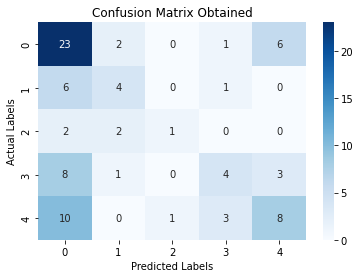

F1-score obtained is  0.3968
Precision obtained is  0.4658
Recall obtained is  0.3792
Classification Report obtained is :
              precision    recall  f1-score   support

           0       0.47      0.72      0.57        32
           1       0.44      0.36      0.40        11
           2       0.50      0.20      0.29         5
           3       0.44      0.25      0.32        16
           4       0.47      0.36      0.41        22

    accuracy                           0.47        86
   macro avg       0.47      0.38      0.40        86
weighted avg       0.46      0.47      0.44        86

Results when AdaBoost is used as Stacking Classifier


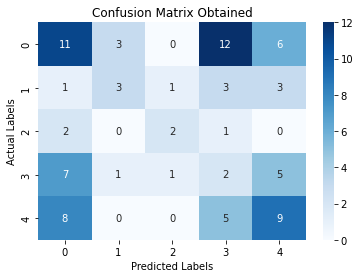

F1-score obtained is  0.3282
Precision obtained is  0.3572
Recall obtained is  0.3101
Classification Report obtained is :
              precision    recall  f1-score   support

           0       0.38      0.34      0.36        32
           1       0.43      0.27      0.33        11
           2       0.50      0.40      0.44         5
           3       0.09      0.12      0.10        16
           4       0.39      0.41      0.40        22

    accuracy                           0.31        86
   macro avg       0.36      0.31      0.33        86
weighted avg       0.34      0.31      0.32        86

[19:42:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Results when XGBoost is used as Stacking Classifier


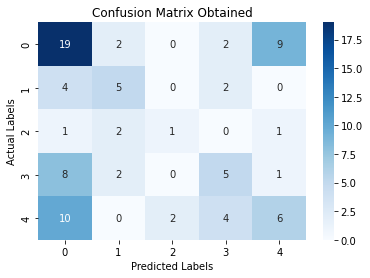

F1-score obtained is  0.3741
Precision obtained is  0.3956
Recall obtained is  0.3667
Classification Report obtained is :
              precision    recall  f1-score   support

           0       0.45      0.59      0.51        32
           1       0.45      0.45      0.45        11
           2       0.33      0.20      0.25         5
           3       0.38      0.31      0.34        16
           4       0.35      0.27      0.31        22

    accuracy                           0.42        86
   macro avg       0.40      0.37      0.37        86
weighted avg       0.41      0.42      0.41        86

Results when Gradient-Boosted Decision Tree is used as Stacking Classifier


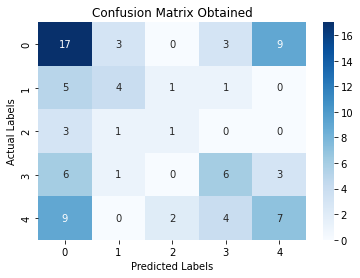

F1-score obtained is  0.3672
Precision obtained is  0.3833
Recall obtained is  0.3576
Classification Report obtained is :
              precision    recall  f1-score   support

           0       0.42      0.53      0.47        32
           1       0.44      0.36      0.40        11
           2       0.25      0.20      0.22         5
           3       0.43      0.38      0.40        16
           4       0.37      0.32      0.34        22

    accuracy                           0.41        86
   macro avg       0.38      0.36      0.37        86
weighted avg       0.40      0.41      0.40        86

Results when Decision Tree is used as Stacking Classifier


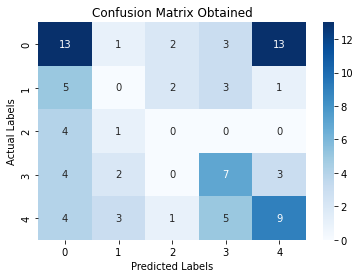

F1-score obtained is  0.2412
Precision obtained is  0.2337
Recall obtained is  0.2506
Classification Report obtained is :
              precision    recall  f1-score   support

           0       0.43      0.41      0.42        32
           1       0.00      0.00      0.00        11
           2       0.00      0.00      0.00         5
           3       0.39      0.44      0.41        16
           4       0.35      0.41      0.38        22

    accuracy                           0.34        86
   macro avg       0.23      0.25      0.24        86
weighted avg       0.32      0.34      0.33        86



,Classifier,f1-score,Precision,Recall
0,RandomForestClassifier - Stacking Classifier,0.3968,0.4658,0.3792
1,AdaBoostClassifier - Stacking Classifier,0.3282,0.3572,0.3101
2,XGBClassifier - Stacking Classifier,0.3741,0.3956,0.3667
3,GradientBoostingClassifier - Stacking Classifier,0.3672,0.3833,0.3576
4,DecisionTreeClassifier - Stacking Classifier,0.2412,0.2337,0.2506


In [43]:
stack_estimators = [svm_pca_pipeline,rf_pca_pipeline]
stack_estimators = {str(model)+"_pipeline" : estimator for estimator, model in zip(stack_estimators,["svm","rf"])}
print(stack_estimators)

stack_results = dict()
stack_results_table = []

from sklearn.base import clone
for model,model_name in zip([RandomForestClassifier(random_state=rs)],["Random Forest"]):
    stacking = StackingClassifier([(estName, clone(est)) for estName, est in stack_estimators.items()], model)
    stacking.fit(X_train, y_train)
    stack_results[f'{model.__class__.__name__}'+"_yPred"] = stacking.predict(X_test)
    stack_list = [f'{model.__class__.__name__}'+" - Stacking Classifier"]
    print("Results when {} is used as Stacking Classifier".format(model_name))
    stack_list.extend(print_metrics(y_test, stack_results[f'{model.__class__.__name__}'+"_yPred"], f'{model.__class__.__name__}'+" - Stacking Classifier"))
    stack_results_table.append(stack_list)
	
for model,model_name in zip([AdaBoostClassifier(random_state = rs)],["AdaBoost"]):
    stacking = StackingClassifier([(estName, clone(est)) for estName, est in stack_estimators.items()], model)
    stacking.fit(X_train, y_train)
    stack_results[f'{model.__class__.__name__}'+"_yPred"] = stacking.predict(X_test)
    stack_list = [f'{model.__class__.__name__}'+" - Stacking Classifier"]
    print("Results when {} is used as Stacking Classifier".format(model_name))
    stack_list.extend(print_metrics(y_test, stack_results[f'{model.__class__.__name__}'+"_yPred"], f'{model.__class__.__name__}'+" - Stacking Classifier"))
    stack_results_table.append(stack_list)

from xgboost import XGBClassifier
for model,model_name in zip([XGBClassifier(objective="binary:logistic", random_state=rs)],["XGBoost"]):
    stacking = StackingClassifier([(estName, clone(est)) for estName, est in stack_estimators.items()], model)
    stacking.fit(X_train, y_train)
    stack_results[f'{model.__class__.__name__}'+"_yPred"] = stacking.predict(X_test)
    stack_list = [f'{model.__class__.__name__}'+" - Stacking Classifier"]
    print("Results when {} is used as Stacking Classifier".format(model_name))
    stack_list.extend(print_metrics(y_test, stack_results[f'{model.__class__.__name__}'+"_yPred"], f'{model.__class__.__name__}'+" - Stacking Classifier"))
    stack_results_table.append(stack_list)

for model,model_name in zip([GradientBoostingClassifier(random_state = rs)],["Gradient-Boosted Decision Tree"]):
    stacking = StackingClassifier([(estName, clone(est)) for estName, est in stack_estimators.items()], model)
    stacking.fit(X_train, y_train)
    stack_results[f'{model.__class__.__name__}'+"_yPred"] = stacking.predict(X_test)
    stack_list = [f'{model.__class__.__name__}'+" - Stacking Classifier"]
    print("Results when {} is used as Stacking Classifier".format(model_name))
    stack_list.extend(print_metrics(y_test, stack_results[f'{model.__class__.__name__}'+"_yPred"], f'{model.__class__.__name__}'+" - Stacking Classifier"))
    stack_results_table.append(stack_list)

for model,model_name in zip([DecisionTreeClassifier(random_state=rs)],["Decision Tree"]):
    stacking = StackingClassifier([(estName, clone(est)) for estName, est in stack_estimators.items()], model)
    stacking.fit(X_train, y_train)
    stack_results[f'{model.__class__.__name__}'+"_yPred"] = stacking.predict(X_test)
    stack_list = [f'{model.__class__.__name__}'+" - Stacking Classifier"]
    print("Results when {} is used as Stacking Classifier".format(model_name))
    stack_list.extend(print_metrics(y_test, stack_results[f'{model.__class__.__name__}'+"_yPred"], f'{model.__class__.__name__}'+" - Stacking Classifier"))
    stack_results_table.append(stack_list)

stack_results_table

#Tabulating the obtained results and displaying the results by formatting
results_df = pd.DataFrame(stack_results_table,columns = ["Classifier","f1-score","Precision","Recall"])
with pd.option_context('display.precision', 4):
    formatted_table=(results_df.style.background_gradient(cmap ='Blues'))
formatted_table

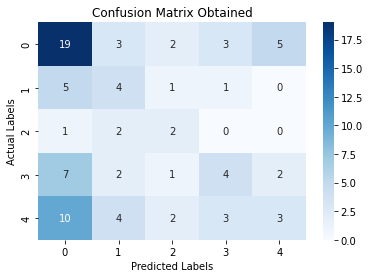

F1-score obtained is  0.3225
Precision obtained is  0.3265
Recall obtained is  0.3488
Classification Report obtained is :
              precision    recall  f1-score   support

           0       0.45      0.59      0.51        32
           1       0.27      0.36      0.31        11
           2       0.25      0.40      0.31         5
           3       0.36      0.25      0.30        16
           4       0.30      0.14      0.19        22

    accuracy                           0.37        86
   macro avg       0.33      0.35      0.32        86
weighted avg       0.36      0.37      0.35        86



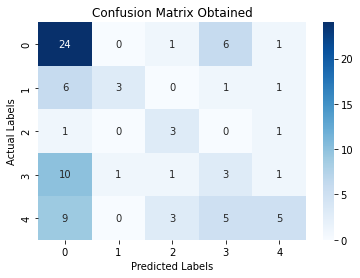

F1-score obtained is  0.3926
Precision obtained is  0.4721
Recall obtained is  0.4075
Classification Report obtained is :
              precision    recall  f1-score   support

           0       0.48      0.75      0.59        32
           1       0.75      0.27      0.40        11
           2       0.38      0.60      0.46         5
           3       0.20      0.19      0.19        16
           4       0.56      0.23      0.32        22

    accuracy                           0.44        86
   macro avg       0.47      0.41      0.39        86
weighted avg       0.48      0.44      0.41        86



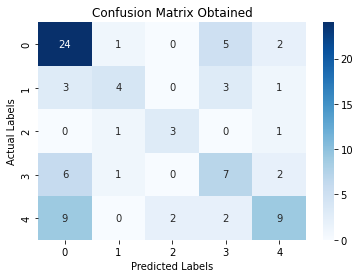

F1-score obtained is  0.5208
Precision obtained is  0.5509
Recall obtained is  0.512
Classification Report obtained is :
              precision    recall  f1-score   support

           0       0.57      0.75      0.65        32
           1       0.57      0.36      0.44        11
           2       0.60      0.60      0.60         5
           3       0.41      0.44      0.42        16
           4       0.60      0.41      0.49        22

    accuracy                           0.55        86
   macro avg       0.55      0.51      0.52        86
weighted avg       0.55      0.55      0.54        86



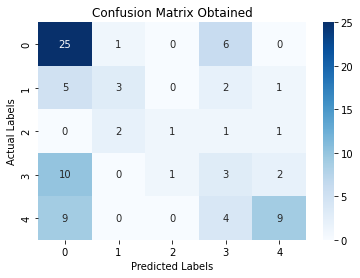

F1-score obtained is  0.3915
Precision obtained is  0.478
Recall obtained is  0.3701
Classification Report obtained is :
              precision    recall  f1-score   support

           0       0.51      0.78      0.62        32
           1       0.50      0.27      0.35        11
           2       0.50      0.20      0.29         5
           3       0.19      0.19      0.19        16
           4       0.69      0.41      0.51        22

    accuracy                           0.48        86
   macro avg       0.48      0.37      0.39        86
weighted avg       0.49      0.48      0.46        86



,Classifier,f1-score,Precision,Recall
0,Decision Tree,0.3225,0.3265,0.3488
1,KNN,0.3926,0.4721,0.4075
2,SVM,0.5208,0.5509,0.5120
3,RF,0.3915,0.4780,0.3701


In [46]:
best_results_table = []

dt = DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=10,random_state=0)
dt_pca_pipeline = Pipeline([('dt', dt)])
dt_pca_pipeline.fit(X_train,y_train)
dt_pca_pipeline_yPred = dt_pca_pipeline.predict(X_test)
dt_list = ["Decision Tree"]
dt_list.extend(print_metrics(y_test, dt_pca_pipeline_yPred,"Decision Tree - PCA"))
best_results_table.append(dt_list)

knn = KNeighborsClassifier(n_neighbors=15)
knn_pca_pipeline = Pipeline([('knn', knn)])
knn_pca_pipeline.fit(X_train,y_train)
knn_pca_pipeline_yPred = knn_pca_pipeline.predict(X_test)
knn_list = ["KNN"]
knn_list.extend(print_metrics(y_test, knn_pca_pipeline_yPred,"KNN"))
best_results_table.append(knn_list)

svm = SVC(C=29.763514416313132, random_state=0)
svm_pca_pipeline = Pipeline([('svm', svm)])
svm_pca_pipeline.fit(X_train,y_train)
svm_pca_pipeline_yPred = svm_pca_pipeline.predict(X_test)
svm_list = ["SVM"]
svm_list.extend(print_metrics(y_test, svm_pca_pipeline_yPred,"SVM - PCA"))
best_results_table.append(svm_list)

rf = RandomForestClassifier(criterion='entropy', max_depth=15, n_estimators=40,random_state=0)
rf_pca_pipeline = Pipeline([('rf', rf)])
rf_pca_pipeline.fit(X_train,y_train)
rf_pca_pipeline_yPred = rf_pca_pipeline.predict(X_test)
rf_list = ["RF"]
rf_list.extend(print_metrics(y_test, rf_pca_pipeline_yPred,"RF - PCA"))
best_results_table.append(rf_list)

best_results_table

#Tabulating the obtained results and displaying the results by formatting
results_df = pd.DataFrame(best_results_table,columns = ["Classifier","f1-score","Precision","Recall"])
with pd.option_context('display.precision', 4):
    formatted_table=(results_df.style.background_gradient(cmap ='Blues'))
formatted_table

{'svm_pipeline': Pipeline(steps=[('svm', SVC(C=29.763514416313132, random_state=0))]), 'rf_pipeline': Pipeline(steps=[('rf',
                 RandomForestClassifier(criterion='entropy', max_depth=15,
                                        n_estimators=40, random_state=0))])}
Results when Random Forest is used as Stacking Classifier


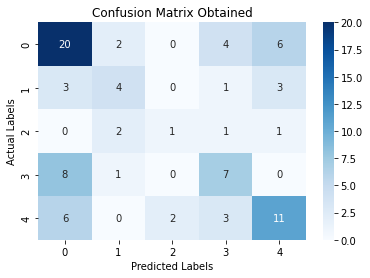

F1-score obtained is  0.4358
Precision obtained is  0.4559
Recall obtained is  0.4252
Classification Report obtained is :
              precision    recall  f1-score   support

           0       0.54      0.62      0.58        32
           1       0.44      0.36      0.40        11
           2       0.33      0.20      0.25         5
           3       0.44      0.44      0.44        16
           4       0.52      0.50      0.51        22

    accuracy                           0.50        86
   macro avg       0.46      0.43      0.44        86
weighted avg       0.49      0.50      0.49        86

Results when AdaBoost is used as Stacking Classifier


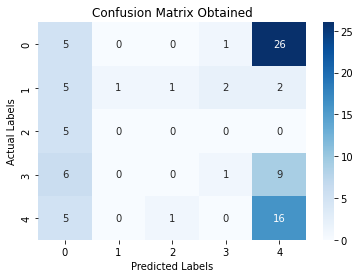

F1-score obtained is  0.1731
Precision obtained is  0.3488
Recall obtained is  0.2074
Classification Report obtained is :
              precision    recall  f1-score   support

           0       0.19      0.16      0.17        32
           1       1.00      0.09      0.17        11
           2       0.00      0.00      0.00         5
           3       0.25      0.06      0.10        16
           4       0.30      0.73      0.43        22

    accuracy                           0.27        86
   macro avg       0.35      0.21      0.17        86
weighted avg       0.32      0.27      0.21        86

[19:57:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Results when XGBoost is used as Stacking Classifier


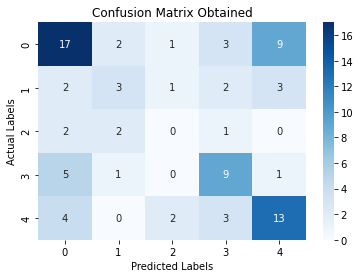

F1-score obtained is  0.3871
Precision obtained is  0.3883
Recall obtained is  0.3915
Classification Report obtained is :
              precision    recall  f1-score   support

           0       0.57      0.53      0.55        32
           1       0.38      0.27      0.32        11
           2       0.00      0.00      0.00         5
           3       0.50      0.56      0.53        16
           4       0.50      0.59      0.54        22

    accuracy                           0.49        86
   macro avg       0.39      0.39      0.39        86
weighted avg       0.48      0.49      0.48        86

Results when Gradient-Boosted Decision Tree is used as Stacking Classifier


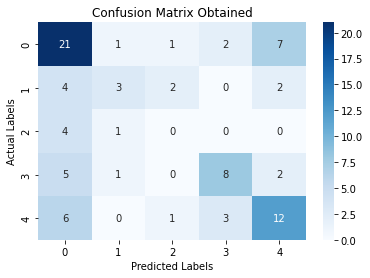

F1-score obtained is  0.4043
Precision obtained is  0.4324
Recall obtained is  0.3949
Classification Report obtained is :
              precision    recall  f1-score   support

           0       0.53      0.66      0.58        32
           1       0.50      0.27      0.35        11
           2       0.00      0.00      0.00         5
           3       0.62      0.50      0.55        16
           4       0.52      0.55      0.53        22

    accuracy                           0.51        86
   macro avg       0.43      0.39      0.40        86
weighted avg       0.51      0.51      0.50        86

Results when Decision Tree is used as Stacking Classifier


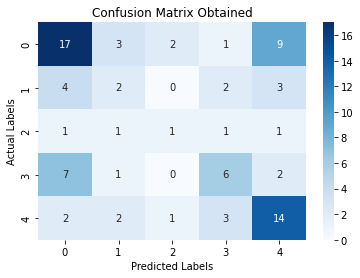

F1-score obtained is  0.3849
Precision obtained is  0.393
Recall obtained is  0.3849
Classification Report obtained is :
              precision    recall  f1-score   support

           0       0.55      0.53      0.54        32
           1       0.22      0.18      0.20        11
           2       0.25      0.20      0.22         5
           3       0.46      0.38      0.41        16
           4       0.48      0.64      0.55        22

    accuracy                           0.47        86
   macro avg       0.39      0.38      0.38        86
weighted avg       0.46      0.47      0.46        86



,Classifier,f1-score,Precision,Recall
0,RandomForestClassifier - Stacking Classifier,0.4358,0.4559,0.4252
1,AdaBoostClassifier - Stacking Classifier,0.1731,0.3488,0.2074
2,XGBClassifier - Stacking Classifier,0.3871,0.3883,0.3915
3,GradientBoostingClassifier - Stacking Classifier,0.4043,0.4324,0.3949
4,DecisionTreeClassifier - Stacking Classifier,0.3849,0.3930,0.3849


In [47]:
stack_estimators = [svm_pca_pipeline,rf_pca_pipeline]
stack_estimators = {str(model)+"_pipeline" : estimator for estimator, model in zip(stack_estimators,["svm","rf"])}
print(stack_estimators)

stack_results = dict()
stack_results_table = []

from sklearn.base import clone
for model,model_name in zip([RandomForestClassifier(random_state=rs)],["Random Forest"]):
    stacking = StackingClassifier([(estName, clone(est)) for estName, est in stack_estimators.items()], model)
    stacking.fit(X_train, y_train)
    stack_results[f'{model.__class__.__name__}'+"_yPred"] = stacking.predict(X_test)
    stack_list = [f'{model.__class__.__name__}'+" - Stacking Classifier"]
    print("Results when {} is used as Stacking Classifier".format(model_name))
    stack_list.extend(print_metrics(y_test, stack_results[f'{model.__class__.__name__}'+"_yPred"], f'{model.__class__.__name__}'+" - Stacking Classifier"))
    stack_results_table.append(stack_list)
	
for model,model_name in zip([AdaBoostClassifier(random_state = rs)],["AdaBoost"]):
    stacking = StackingClassifier([(estName, clone(est)) for estName, est in stack_estimators.items()], model)
    stacking.fit(X_train, y_train)
    stack_results[f'{model.__class__.__name__}'+"_yPred"] = stacking.predict(X_test)
    stack_list = [f'{model.__class__.__name__}'+" - Stacking Classifier"]
    print("Results when {} is used as Stacking Classifier".format(model_name))
    stack_list.extend(print_metrics(y_test, stack_results[f'{model.__class__.__name__}'+"_yPred"], f'{model.__class__.__name__}'+" - Stacking Classifier"))
    stack_results_table.append(stack_list)

from xgboost import XGBClassifier
for model,model_name in zip([XGBClassifier(objective="binary:logistic", random_state=rs)],["XGBoost"]):
    stacking = StackingClassifier([(estName, clone(est)) for estName, est in stack_estimators.items()], model)
    stacking.fit(X_train, y_train)
    stack_results[f'{model.__class__.__name__}'+"_yPred"] = stacking.predict(X_test)
    stack_list = [f'{model.__class__.__name__}'+" - Stacking Classifier"]
    print("Results when {} is used as Stacking Classifier".format(model_name))
    stack_list.extend(print_metrics(y_test, stack_results[f'{model.__class__.__name__}'+"_yPred"], f'{model.__class__.__name__}'+" - Stacking Classifier"))
    stack_results_table.append(stack_list)

for model,model_name in zip([GradientBoostingClassifier(random_state = rs)],["Gradient-Boosted Decision Tree"]):
    stacking = StackingClassifier([(estName, clone(est)) for estName, est in stack_estimators.items()], model)
    stacking.fit(X_train, y_train)
    stack_results[f'{model.__class__.__name__}'+"_yPred"] = stacking.predict(X_test)
    stack_list = [f'{model.__class__.__name__}'+" - Stacking Classifier"]
    print("Results when {} is used as Stacking Classifier".format(model_name))
    stack_list.extend(print_metrics(y_test, stack_results[f'{model.__class__.__name__}'+"_yPred"], f'{model.__class__.__name__}'+" - Stacking Classifier"))
    stack_results_table.append(stack_list)

for model,model_name in zip([DecisionTreeClassifier(random_state=rs)],["Decision Tree"]):
    stacking = StackingClassifier([(estName, clone(est)) for estName, est in stack_estimators.items()], model)
    stacking.fit(X_train, y_train)
    stack_results[f'{model.__class__.__name__}'+"_yPred"] = stacking.predict(X_test)
    stack_list = [f'{model.__class__.__name__}'+" - Stacking Classifier"]
    print("Results when {} is used as Stacking Classifier".format(model_name))
    stack_list.extend(print_metrics(y_test, stack_results[f'{model.__class__.__name__}'+"_yPred"], f'{model.__class__.__name__}'+" - Stacking Classifier"))
    stack_results_table.append(stack_list)

stack_results_table

#Tabulating the obtained results and displaying the results by formatting
results_df = pd.DataFrame(stack_results_table,columns = ["Classifier","f1-score","Precision","Recall"])
with pd.option_context('display.precision', 4):
    formatted_table=(results_df.style.background_gradient(cmap ='Blues'))
formatted_table

{'knn_pipeline': Pipeline(steps=[('knn', KNeighborsClassifier(n_neighbors=15))]), 'svm_pipeline': Pipeline(steps=[('svm', SVC(C=29.763514416313132, random_state=0))]), 'rf_pipeline': Pipeline(steps=[('rf',
                 RandomForestClassifier(criterion='entropy', max_depth=15,
                                        n_estimators=40, random_state=0))])}
Results when Random Forest is used as Stacking Classifier


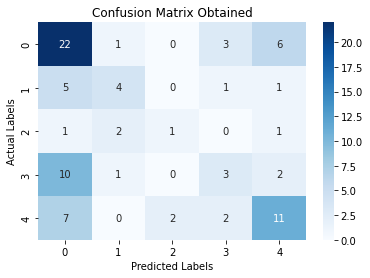

F1-score obtained is  0.3988
Precision obtained is  0.4359
Recall obtained is  0.3877
Classification Report obtained is :
              precision    recall  f1-score   support

           0       0.49      0.69      0.57        32
           1       0.50      0.36      0.42        11
           2       0.33      0.20      0.25         5
           3       0.33      0.19      0.24        16
           4       0.52      0.50      0.51        22

    accuracy                           0.48        86
   macro avg       0.44      0.39      0.40        86
weighted avg       0.46      0.48      0.46        86

Results when AdaBoost is used as Stacking Classifier


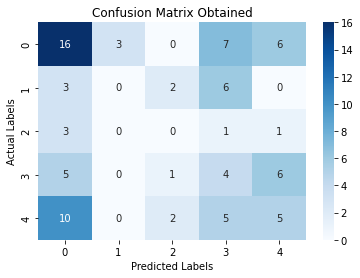

F1-score obtained is  0.1838
Precision obtained is  0.1768
Recall obtained is  0.1955
Classification Report obtained is :
              precision    recall  f1-score   support

           0       0.43      0.50      0.46        32
           1       0.00      0.00      0.00        11
           2       0.00      0.00      0.00         5
           3       0.17      0.25      0.21        16
           4       0.28      0.23      0.25        22

    accuracy                           0.29        86
   macro avg       0.18      0.20      0.18        86
weighted avg       0.26      0.29      0.27        86

[19:58:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Results when XGBoost is used as Stacking Classifier


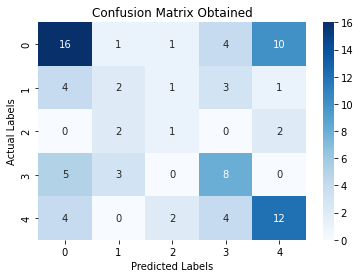

F1-score obtained is  0.3806
Precision obtained is  0.3806
Recall obtained is  0.3855
Classification Report obtained is :
              precision    recall  f1-score   support

           0       0.55      0.50      0.52        32
           1       0.25      0.18      0.21        11
           2       0.20      0.20      0.20         5
           3       0.42      0.50      0.46        16
           4       0.48      0.55      0.51        22

    accuracy                           0.45        86
   macro avg       0.38      0.39      0.38        86
weighted avg       0.45      0.45      0.45        86

Results when Gradient-Boosted Decision Tree is used as Stacking Classifier


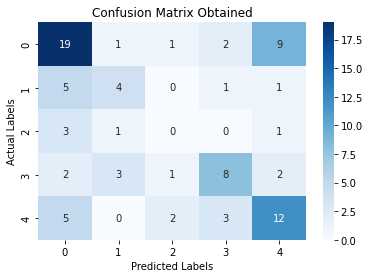

F1-score obtained is  0.4039
Precision obtained is  0.4109
Recall obtained is  0.4006
Classification Report obtained is :
              precision    recall  f1-score   support

           0       0.56      0.59      0.58        32
           1       0.44      0.36      0.40        11
           2       0.00      0.00      0.00         5
           3       0.57      0.50      0.53        16
           4       0.48      0.55      0.51        22

    accuracy                           0.50        86
   macro avg       0.41      0.40      0.40        86
weighted avg       0.49      0.50      0.50        86

Results when Decision Tree is used as Stacking Classifier


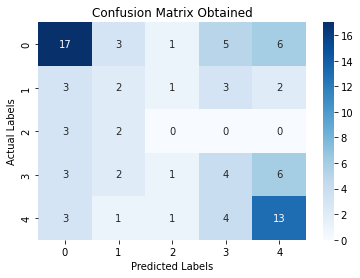

F1-score obtained is  0.3057
Precision obtained is  0.3035
Recall obtained is  0.3108
Classification Report obtained is :
              precision    recall  f1-score   support

           0       0.59      0.53      0.56        32
           1       0.20      0.18      0.19        11
           2       0.00      0.00      0.00         5
           3       0.25      0.25      0.25        16
           4       0.48      0.59      0.53        22

    accuracy                           0.42        86
   macro avg       0.30      0.31      0.31        86
weighted avg       0.41      0.42      0.41        86



,Classifier,f1-score,Precision,Recall
0,RandomForestClassifier - Stacking Classifier,0.3988,0.4359,0.3877
1,AdaBoostClassifier - Stacking Classifier,0.1838,0.1768,0.1955
2,XGBClassifier - Stacking Classifier,0.3806,0.3806,0.3855
3,GradientBoostingClassifier - Stacking Classifier,0.4039,0.4109,0.4006
4,DecisionTreeClassifier - Stacking Classifier,0.3057,0.3035,0.3108


In [48]:
stack_estimators = [knn_pca_pipeline,svm_pca_pipeline,rf_pca_pipeline]
stack_estimators = {str(model)+"_pipeline" : estimator for estimator, model in zip(stack_estimators,["knn","svm","rf"])}
print(stack_estimators)

stack_results = dict()
stack_results_table = []

from sklearn.base import clone
for model,model_name in zip([RandomForestClassifier(random_state=rs)],["Random Forest"]):
    stacking = StackingClassifier([(estName, clone(est)) for estName, est in stack_estimators.items()], model)
    stacking.fit(X_train, y_train)
    stack_results[f'{model.__class__.__name__}'+"_yPred"] = stacking.predict(X_test)
    stack_list = [f'{model.__class__.__name__}'+" - Stacking Classifier"]
    print("Results when {} is used as Stacking Classifier".format(model_name))
    stack_list.extend(print_metrics(y_test, stack_results[f'{model.__class__.__name__}'+"_yPred"], f'{model.__class__.__name__}'+" - Stacking Classifier"))
    stack_results_table.append(stack_list)
	
for model,model_name in zip([AdaBoostClassifier(random_state = rs)],["AdaBoost"]):
    stacking = StackingClassifier([(estName, clone(est)) for estName, est in stack_estimators.items()], model)
    stacking.fit(X_train, y_train)
    stack_results[f'{model.__class__.__name__}'+"_yPred"] = stacking.predict(X_test)
    stack_list = [f'{model.__class__.__name__}'+" - Stacking Classifier"]
    print("Results when {} is used as Stacking Classifier".format(model_name))
    stack_list.extend(print_metrics(y_test, stack_results[f'{model.__class__.__name__}'+"_yPred"], f'{model.__class__.__name__}'+" - Stacking Classifier"))
    stack_results_table.append(stack_list)

from xgboost import XGBClassifier
for model,model_name in zip([XGBClassifier(objective="binary:logistic", random_state=rs)],["XGBoost"]):
    stacking = StackingClassifier([(estName, clone(est)) for estName, est in stack_estimators.items()], model)
    stacking.fit(X_train, y_train)
    stack_results[f'{model.__class__.__name__}'+"_yPred"] = stacking.predict(X_test)
    stack_list = [f'{model.__class__.__name__}'+" - Stacking Classifier"]
    print("Results when {} is used as Stacking Classifier".format(model_name))
    stack_list.extend(print_metrics(y_test, stack_results[f'{model.__class__.__name__}'+"_yPred"], f'{model.__class__.__name__}'+" - Stacking Classifier"))
    stack_results_table.append(stack_list)

for model,model_name in zip([GradientBoostingClassifier(random_state = rs)],["Gradient-Boosted Decision Tree"]):
    stacking = StackingClassifier([(estName, clone(est)) for estName, est in stack_estimators.items()], model)
    stacking.fit(X_train, y_train)
    stack_results[f'{model.__class__.__name__}'+"_yPred"] = stacking.predict(X_test)
    stack_list = [f'{model.__class__.__name__}'+" - Stacking Classifier"]
    print("Results when {} is used as Stacking Classifier".format(model_name))
    stack_list.extend(print_metrics(y_test, stack_results[f'{model.__class__.__name__}'+"_yPred"], f'{model.__class__.__name__}'+" - Stacking Classifier"))
    stack_results_table.append(stack_list)

for model,model_name in zip([DecisionTreeClassifier(random_state=rs)],["Decision Tree"]):
    stacking = StackingClassifier([(estName, clone(est)) for estName, est in stack_estimators.items()], model)
    stacking.fit(X_train, y_train)
    stack_results[f'{model.__class__.__name__}'+"_yPred"] = stacking.predict(X_test)
    stack_list = [f'{model.__class__.__name__}'+" - Stacking Classifier"]
    print("Results when {} is used as Stacking Classifier".format(model_name))
    stack_list.extend(print_metrics(y_test, stack_results[f'{model.__class__.__name__}'+"_yPred"], f'{model.__class__.__name__}'+" - Stacking Classifier"))
    stack_results_table.append(stack_list)

stack_results_table

#Tabulating the obtained results and displaying the results by formatting
results_df = pd.DataFrame(stack_results_table,columns = ["Classifier","f1-score","Precision","Recall"])
with pd.option_context('display.precision', 4):
    formatted_table=(results_df.style.background_gradient(cmap ='Blues'))
formatted_table

{'dt_pipeline': Pipeline(steps=[('dt',
                 DecisionTreeClassifier(criterion='entropy', max_depth=5,
                                        min_samples_leaf=10, random_state=0))]), 'knn_pipeline': Pipeline(steps=[('knn', KNeighborsClassifier(n_neighbors=15))]), 'svm_pipeline': Pipeline(steps=[('svm', SVC(C=29.763514416313132, random_state=0))]), 'rf_pipeline': Pipeline(steps=[('rf',
                 RandomForestClassifier(criterion='entropy', max_depth=15,
                                        n_estimators=40, random_state=0))])}
Results when Random Forest is used as Stacking Classifier


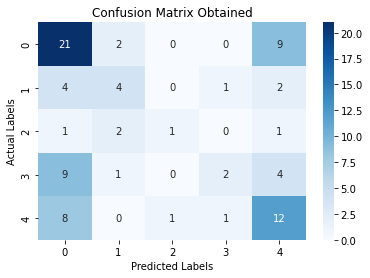

F1-score obtained is  0.3851
Precision obtained is  0.4723
Recall obtained is  0.3781
Classification Report obtained is :
              precision    recall  f1-score   support

           0       0.49      0.66      0.56        32
           1       0.44      0.36      0.40        11
           2       0.50      0.20      0.29         5
           3       0.50      0.12      0.20        16
           4       0.43      0.55      0.48        22

    accuracy                           0.47        86
   macro avg       0.47      0.38      0.39        86
weighted avg       0.47      0.47      0.44        86

Results when AdaBoost is used as Stacking Classifier


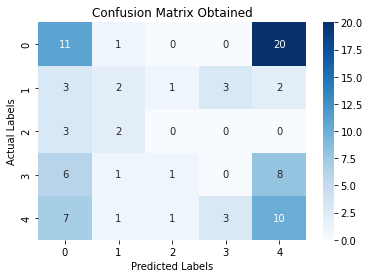

F1-score obtained is  0.1799
Precision obtained is  0.1805
Recall obtained is  0.196
Classification Report obtained is :
              precision    recall  f1-score   support

           0       0.37      0.34      0.35        32
           1       0.29      0.18      0.22        11
           2       0.00      0.00      0.00         5
           3       0.00      0.00      0.00        16
           4       0.25      0.45      0.32        22

    accuracy                           0.27        86
   macro avg       0.18      0.20      0.18        86
weighted avg       0.24      0.27      0.24        86

[19:58:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Results when XGBoost is used as Stacking Classifier


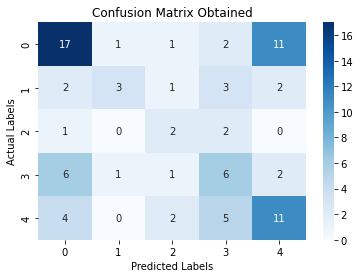

F1-score obtained is  0.4136
Precision obtained is  0.4418
Recall obtained is  0.4158
Classification Report obtained is :
              precision    recall  f1-score   support

           0       0.57      0.53      0.55        32
           1       0.60      0.27      0.37        11
           2       0.29      0.40      0.33         5
           3       0.33      0.38      0.35        16
           4       0.42      0.50      0.46        22

    accuracy                           0.45        86
   macro avg       0.44      0.42      0.41        86
weighted avg       0.47      0.45      0.45        86

Results when Gradient-Boosted Decision Tree is used as Stacking Classifier


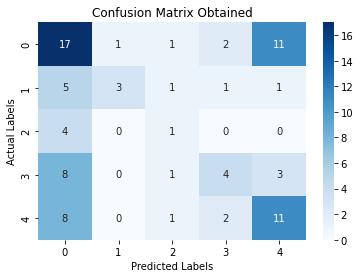

F1-score obtained is  0.3676
Precision obtained is  0.4445
Recall obtained is  0.3508
Classification Report obtained is :
              precision    recall  f1-score   support

           0       0.40      0.53      0.46        32
           1       0.75      0.27      0.40        11
           2       0.20      0.20      0.20         5
           3       0.44      0.25      0.32        16
           4       0.42      0.50      0.46        22

    accuracy                           0.42        86
   macro avg       0.44      0.35      0.37        86
weighted avg       0.45      0.42      0.41        86

Results when Decision Tree is used as Stacking Classifier


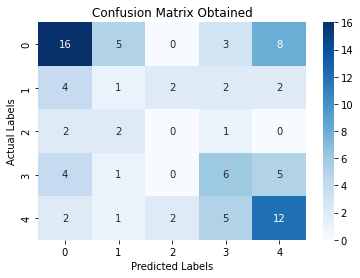

F1-score obtained is  0.2964
Precision obtained is  0.2938
Recall obtained is  0.3023
Classification Report obtained is :
              precision    recall  f1-score   support

           0       0.57      0.50      0.53        32
           1       0.10      0.09      0.10        11
           2       0.00      0.00      0.00         5
           3       0.35      0.38      0.36        16
           4       0.44      0.55      0.49        22

    accuracy                           0.41        86
   macro avg       0.29      0.30      0.30        86
weighted avg       0.40      0.41      0.40        86



,Classifier,f1-score,Precision,Recall
0,RandomForestClassifier - Stacking Classifier,0.3851,0.4723,0.3781
1,AdaBoostClassifier - Stacking Classifier,0.1799,0.1805,0.1960
2,XGBClassifier - Stacking Classifier,0.4136,0.4418,0.4158
3,GradientBoostingClassifier - Stacking Classifier,0.3676,0.4445,0.3508
4,DecisionTreeClassifier - Stacking Classifier,0.2964,0.2938,0.3023


In [49]:
stack_estimators = [dt_pca_pipeline,knn_pca_pipeline,svm_pca_pipeline,rf_pca_pipeline]
stack_estimators = {str(model)+"_pipeline" : estimator for estimator, model in zip(stack_estimators,["dt","knn","svm","rf"])}
print(stack_estimators)

stack_results = dict()
stack_results_table = []

from sklearn.base import clone
for model,model_name in zip([RandomForestClassifier(random_state=rs)],["Random Forest"]):
    stacking = StackingClassifier([(estName, clone(est)) for estName, est in stack_estimators.items()], model)
    stacking.fit(X_train, y_train)
    stack_results[f'{model.__class__.__name__}'+"_yPred"] = stacking.predict(X_test)
    stack_list = [f'{model.__class__.__name__}'+" - Stacking Classifier"]
    print("Results when {} is used as Stacking Classifier".format(model_name))
    stack_list.extend(print_metrics(y_test, stack_results[f'{model.__class__.__name__}'+"_yPred"], f'{model.__class__.__name__}'+" - Stacking Classifier"))
    stack_results_table.append(stack_list)
	
for model,model_name in zip([AdaBoostClassifier(random_state = rs)],["AdaBoost"]):
    stacking = StackingClassifier([(estName, clone(est)) for estName, est in stack_estimators.items()], model)
    stacking.fit(X_train, y_train)
    stack_results[f'{model.__class__.__name__}'+"_yPred"] = stacking.predict(X_test)
    stack_list = [f'{model.__class__.__name__}'+" - Stacking Classifier"]
    print("Results when {} is used as Stacking Classifier".format(model_name))
    stack_list.extend(print_metrics(y_test, stack_results[f'{model.__class__.__name__}'+"_yPred"], f'{model.__class__.__name__}'+" - Stacking Classifier"))
    stack_results_table.append(stack_list)

from xgboost import XGBClassifier
for model,model_name in zip([XGBClassifier(objective="binary:logistic", random_state=rs)],["XGBoost"]):
    stacking = StackingClassifier([(estName, clone(est)) for estName, est in stack_estimators.items()], model)
    stacking.fit(X_train, y_train)
    stack_results[f'{model.__class__.__name__}'+"_yPred"] = stacking.predict(X_test)
    stack_list = [f'{model.__class__.__name__}'+" - Stacking Classifier"]
    print("Results when {} is used as Stacking Classifier".format(model_name))
    stack_list.extend(print_metrics(y_test, stack_results[f'{model.__class__.__name__}'+"_yPred"], f'{model.__class__.__name__}'+" - Stacking Classifier"))
    stack_results_table.append(stack_list)

for model,model_name in zip([GradientBoostingClassifier(random_state = rs)],["Gradient-Boosted Decision Tree"]):
    stacking = StackingClassifier([(estName, clone(est)) for estName, est in stack_estimators.items()], model)
    stacking.fit(X_train, y_train)
    stack_results[f'{model.__class__.__name__}'+"_yPred"] = stacking.predict(X_test)
    stack_list = [f'{model.__class__.__name__}'+" - Stacking Classifier"]
    print("Results when {} is used as Stacking Classifier".format(model_name))
    stack_list.extend(print_metrics(y_test, stack_results[f'{model.__class__.__name__}'+"_yPred"], f'{model.__class__.__name__}'+" - Stacking Classifier"))
    stack_results_table.append(stack_list)

for model,model_name in zip([DecisionTreeClassifier(random_state=rs)],["Decision Tree"]):
    stacking = StackingClassifier([(estName, clone(est)) for estName, est in stack_estimators.items()], model)
    stacking.fit(X_train, y_train)
    stack_results[f'{model.__class__.__name__}'+"_yPred"] = stacking.predict(X_test)
    stack_list = [f'{model.__class__.__name__}'+" - Stacking Classifier"]
    print("Results when {} is used as Stacking Classifier".format(model_name))
    stack_list.extend(print_metrics(y_test, stack_results[f'{model.__class__.__name__}'+"_yPred"], f'{model.__class__.__name__}'+" - Stacking Classifier"))
    stack_results_table.append(stack_list)

stack_results_table

#Tabulating the obtained results and displaying the results by formatting
results_df = pd.DataFrame(stack_results_table,columns = ["Classifier","f1-score","Precision","Recall"])
with pd.option_context('display.precision', 4):
    formatted_table=(results_df.style.background_gradient(cmap ='Blues'))
formatted_table

{'dt_pipeline': Pipeline(steps=[('dt',
                 DecisionTreeClassifier(criterion='entropy', max_depth=5,
                                        min_samples_leaf=10, random_state=0))]), 'knn_pipeline': Pipeline(steps=[('knn', KNeighborsClassifier(n_neighbors=15))]), 'svm_pipeline': Pipeline(steps=[('svm', SVC(C=29.763514416313132, random_state=0))]), 'rf_pipeline': Pipeline(steps=[('rf',
                 RandomForestClassifier(criterion='entropy', max_depth=15,
                                        n_estimators=40, random_state=0))])}
Results when {} is used as Voting Classifier


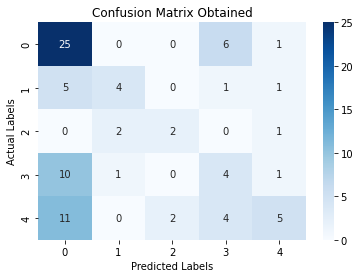

F1-score obtained is  0.4144
Precision obtained is  0.4768
Recall obtained is  0.4044
Classification Report obtained is :
              precision    recall  f1-score   support

           0       0.49      0.78      0.60        32
           1       0.57      0.36      0.44        11
           2       0.50      0.40      0.44         5
           3       0.27      0.25      0.26        16
           4       0.56      0.23      0.32        22

    accuracy                           0.47        86
   macro avg       0.48      0.40      0.41        86
weighted avg       0.48      0.47      0.44        86



In [52]:
stack_estimators = [dt_pca_pipeline,knn_pca_pipeline,svm_pca_pipeline,rf_pca_pipeline]
stack_estimators = {str(model)+"_pipeline" : estimator for estimator, model in zip(stack_estimators,["dt","knn","svm","rf"])}
print(stack_estimators)

stack_results = dict()
stack_results_table = []
voting_classifier = VotingClassifier([(estName, clone(est)) for estName, est in stack_estimators.items()], voting='hard')
model = voting_classifier
voting_classifier.fit(X_train, y_train)
stack_results[f'{model.__class__.__name__}'+"_yPred"] = voting_classifier.predict(X_test)
stack_list = [f'{model.__class__.__name__}'+" - Stacking Classifier"]
print("Results when {} is used as Voting Classifier")
stack_list.extend(print_metrics(y_test, stack_results[f'{model.__class__.__name__}'+"_yPred"], f'{model.__class__.__name__}'+" - Stacking Classifier"))
stack_results_table.append(stack_list)

{'knn_pipeline': Pipeline(steps=[('knn', KNeighborsClassifier(n_neighbors=15))]), 'svm_pipeline': Pipeline(steps=[('svm', SVC(C=29.763514416313132, random_state=0))]), 'rf_pipeline': Pipeline(steps=[('rf',
                 RandomForestClassifier(criterion='entropy', max_depth=15,
                                        n_estimators=40, random_state=0))])}
Results when {} is used as Voting Classifier


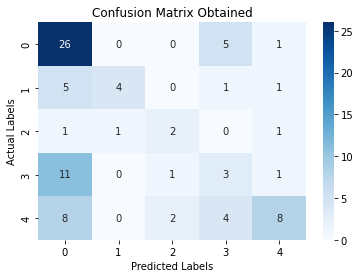

F1-score obtained is  0.4408
Precision obtained is  0.5214
Recall obtained is  0.4255
Classification Report obtained is :
              precision    recall  f1-score   support

           0       0.51      0.81      0.63        32
           1       0.80      0.36      0.50        11
           2       0.40      0.40      0.40         5
           3       0.23      0.19      0.21        16
           4       0.67      0.36      0.47        22

    accuracy                           0.50        86
   macro avg       0.52      0.43      0.44        86
weighted avg       0.53      0.50      0.48        86



In [58]:
stack_estimators = [knn_pca_pipeline,svm_pca_pipeline,rf_pca_pipeline]
stack_estimators = {str(model)+"_pipeline" : estimator for estimator, model in zip(stack_estimators,["knn","svm","rf"])}
print(stack_estimators)

stack_results = dict()
stack_results_table = []
voting_classifier = VotingClassifier([(estName, clone(est)) for estName, est in stack_estimators.items()], voting='hard')
model = voting_classifier
voting_classifier.fit(X_train, y_train)
stack_results[f'{model.__class__.__name__}'+"_yPred"] = voting_classifier.predict(X_test)
stack_list = [f'{model.__class__.__name__}'+" - Stacking Classifier"]
print("Results when {} is used as Voting Classifier")
stack_list.extend(print_metrics(y_test, stack_results[f'{model.__class__.__name__}'+"_yPred"], f'{model.__class__.__name__}'+" - Stacking Classifier"))
stack_results_table.append(stack_list)

{'svm_pipeline': Pipeline(steps=[('svm', SVC(C=29.763514416313132, random_state=0))]), 'rf_pipeline': Pipeline(steps=[('rf',
                 RandomForestClassifier(criterion='entropy', max_depth=15,
                                        n_estimators=40, random_state=0))])}
Results when {} is used as Voting Classifier


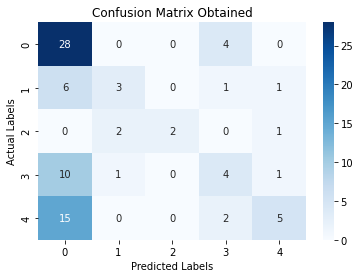

F1-score obtained is  0.4339
Precision obtained is  0.5926
Recall obtained is  0.405
Classification Report obtained is :
              precision    recall  f1-score   support

           0       0.47      0.88      0.62        32
           1       0.50      0.27      0.35        11
           2       1.00      0.40      0.57         5
           3       0.36      0.25      0.30        16
           4       0.62      0.23      0.33        22

    accuracy                           0.49        86
   macro avg       0.59      0.40      0.43        86
weighted avg       0.53      0.49      0.45        86



In [59]:
stack_estimators = [svm_pca_pipeline,rf_pca_pipeline]
stack_estimators = {str(model)+"_pipeline" : estimator for estimator, model in zip(stack_estimators,["svm","rf"])}
print(stack_estimators)

stack_results = dict()
stack_results_table = []
voting_classifier = VotingClassifier([(estName, clone(est)) for estName, est in stack_estimators.items()], voting='hard')
model = voting_classifier
voting_classifier.fit(X_train, y_train)
stack_results[f'{model.__class__.__name__}'+"_yPred"] = voting_classifier.predict(X_test)
stack_list = [f'{model.__class__.__name__}'+" - Stacking Classifier"]
print("Results when {} is used as Voting Classifier")
stack_list.extend(print_metrics(y_test, stack_results[f'{model.__class__.__name__}'+"_yPred"], f'{model.__class__.__name__}'+" - Stacking Classifier"))
stack_results_table.append(stack_list)

{'dt_pipeline': Pipeline(steps=[('dt',
                 DecisionTreeClassifier(criterion='entropy', max_depth=5,
                                        min_samples_leaf=10, random_state=0))]), 'knn_pipeline': Pipeline(steps=[('knn', KNeighborsClassifier(n_neighbors=15))]), 'svm_pipeline': Pipeline(steps=[('svm', SVC(C=29.763514416313132, random_state=0))]), 'rf_pipeline': Pipeline(steps=[('rf',
                 RandomForestClassifier(criterion='entropy', max_depth=15,
                                        n_estimators=40, random_state=0))])}
Results when Random Forest is used as Stacking Classifier


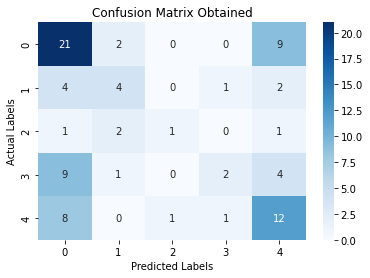

F1-score obtained is  0.3851
Precision obtained is  0.4723
Recall obtained is  0.3781
Classification Report obtained is :
              precision    recall  f1-score   support

           0       0.49      0.66      0.56        32
           1       0.44      0.36      0.40        11
           2       0.50      0.20      0.29         5
           3       0.50      0.12      0.20        16
           4       0.43      0.55      0.48        22

    accuracy                           0.47        86
   macro avg       0.47      0.38      0.39        86
weighted avg       0.47      0.47      0.44        86

Results when AdaBoost is used as Stacking Classifier


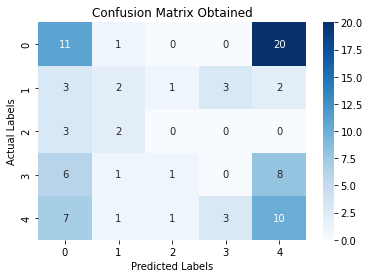

F1-score obtained is  0.1799
Precision obtained is  0.1805
Recall obtained is  0.196
Classification Report obtained is :
              precision    recall  f1-score   support

           0       0.37      0.34      0.35        32
           1       0.29      0.18      0.22        11
           2       0.00      0.00      0.00         5
           3       0.00      0.00      0.00        16
           4       0.25      0.45      0.32        22

    accuracy                           0.27        86
   macro avg       0.18      0.20      0.18        86
weighted avg       0.24      0.27      0.24        86

[20:08:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Results when XGBoost is used as Stacking Classifier


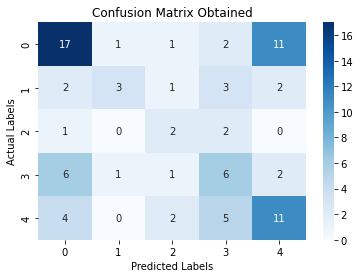

F1-score obtained is  0.4136
Precision obtained is  0.4418
Recall obtained is  0.4158
Classification Report obtained is :
              precision    recall  f1-score   support

           0       0.57      0.53      0.55        32
           1       0.60      0.27      0.37        11
           2       0.29      0.40      0.33         5
           3       0.33      0.38      0.35        16
           4       0.42      0.50      0.46        22

    accuracy                           0.45        86
   macro avg       0.44      0.42      0.41        86
weighted avg       0.47      0.45      0.45        86

Results when Gradient-Boosted Decision Tree is used as Stacking Classifier


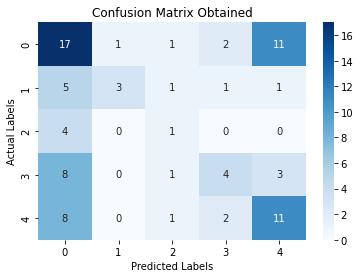

F1-score obtained is  0.3676
Precision obtained is  0.4445
Recall obtained is  0.3508
Classification Report obtained is :
              precision    recall  f1-score   support

           0       0.40      0.53      0.46        32
           1       0.75      0.27      0.40        11
           2       0.20      0.20      0.20         5
           3       0.44      0.25      0.32        16
           4       0.42      0.50      0.46        22

    accuracy                           0.42        86
   macro avg       0.44      0.35      0.37        86
weighted avg       0.45      0.42      0.41        86

Results when Decision Tree is used as Stacking Classifier


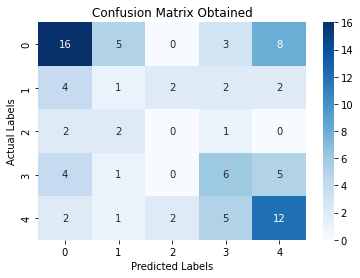

F1-score obtained is  0.2964
Precision obtained is  0.2938
Recall obtained is  0.3023
Classification Report obtained is :
              precision    recall  f1-score   support

           0       0.57      0.50      0.53        32
           1       0.10      0.09      0.10        11
           2       0.00      0.00      0.00         5
           3       0.35      0.38      0.36        16
           4       0.44      0.55      0.49        22

    accuracy                           0.41        86
   macro avg       0.29      0.30      0.30        86
weighted avg       0.40      0.41      0.40        86



,Classifier,f1-score,Precision,Recall
0,RandomForestClassifier - Stacking Classifier,0.3851,0.4723,0.3781
1,AdaBoostClassifier - Stacking Classifier,0.1799,0.1805,0.1960
2,XGBClassifier - Stacking Classifier,0.4136,0.4418,0.4158
3,GradientBoostingClassifier - Stacking Classifier,0.3676,0.4445,0.3508
4,DecisionTreeClassifier - Stacking Classifier,0.2964,0.2938,0.3023


In [53]:
stack_estimators = [dt_pca_pipeline,knn_pca_pipeline,svm_pca_pipeline,rf_pca_pipeline]
stack_estimators = {str(model)+"_pipeline" : estimator for estimator, model in zip(stack_estimators,["dt","knn","svm","rf"])}
print(stack_estimators)

stack_results = dict()
stack_results_table = []

from sklearn.base import clone
for model,model_name in zip([RandomForestClassifier(random_state=rs)],["Random Forest"]):
    stacking = StackingClassifier([(estName, clone(est)) for estName, est in stack_estimators.items()], model)
    stacking.fit(X_train, y_train)
    stack_results[f'{model.__class__.__name__}'+"_yPred"] = stacking.predict(X_test)
    stack_list = [f'{model.__class__.__name__}'+" - Stacking Classifier"]
    print("Results when {} is used as Stacking Classifier".format(model_name))
    stack_list.extend(print_metrics(y_test, stack_results[f'{model.__class__.__name__}'+"_yPred"], f'{model.__class__.__name__}'+" - Stacking Classifier"))
    stack_results_table.append(stack_list)
    rf_stacking = stacking
	
for model,model_name in zip([AdaBoostClassifier(random_state = rs)],["AdaBoost"]):
    stacking = StackingClassifier([(estName, clone(est)) for estName, est in stack_estimators.items()], model)
    stacking.fit(X_train, y_train)
    stack_results[f'{model.__class__.__name__}'+"_yPred"] = stacking.predict(X_test)
    stack_list = [f'{model.__class__.__name__}'+" - Stacking Classifier"]
    print("Results when {} is used as Stacking Classifier".format(model_name))
    stack_list.extend(print_metrics(y_test, stack_results[f'{model.__class__.__name__}'+"_yPred"], f'{model.__class__.__name__}'+" - Stacking Classifier"))
    stack_results_table.append(stack_list)
    adaboost_stacking = stacking

from xgboost import XGBClassifier
for model,model_name in zip([XGBClassifier(objective="binary:logistic", random_state=rs)],["XGBoost"]):
    stacking = StackingClassifier([(estName, clone(est)) for estName, est in stack_estimators.items()], model)
    stacking.fit(X_train, y_train)
    stack_results[f'{model.__class__.__name__}'+"_yPred"] = stacking.predict(X_test)
    stack_list = [f'{model.__class__.__name__}'+" - Stacking Classifier"]
    print("Results when {} is used as Stacking Classifier".format(model_name))
    stack_list.extend(print_metrics(y_test, stack_results[f'{model.__class__.__name__}'+"_yPred"], f'{model.__class__.__name__}'+" - Stacking Classifier"))
    stack_results_table.append(stack_list)
    xgboost_stacking = stacking

for model,model_name in zip([GradientBoostingClassifier(random_state = rs)],["Gradient-Boosted Decision Tree"]):
    stacking = StackingClassifier([(estName, clone(est)) for estName, est in stack_estimators.items()], model)
    stacking.fit(X_train, y_train)
    stack_results[f'{model.__class__.__name__}'+"_yPred"] = stacking.predict(X_test)
    stack_list = [f'{model.__class__.__name__}'+" - Stacking Classifier"]
    print("Results when {} is used as Stacking Classifier".format(model_name))
    stack_list.extend(print_metrics(y_test, stack_results[f'{model.__class__.__name__}'+"_yPred"], f'{model.__class__.__name__}'+" - Stacking Classifier"))
    stack_results_table.append(stack_list)
    gbdt_stacking = stacking

for model,model_name in zip([DecisionTreeClassifier(random_state=rs)],["Decision Tree"]):
    stacking = StackingClassifier([(estName, clone(est)) for estName, est in stack_estimators.items()], model)
    stacking.fit(X_train, y_train)
    stack_results[f'{model.__class__.__name__}'+"_yPred"] = stacking.predict(X_test)
    stack_list = [f'{model.__class__.__name__}'+" - Stacking Classifier"]
    print("Results when {} is used as Stacking Classifier".format(model_name))
    stack_list.extend(print_metrics(y_test, stack_results[f'{model.__class__.__name__}'+"_yPred"], f'{model.__class__.__name__}'+" - Stacking Classifier"))
    stack_results_table.append(stack_list)
    dt_stacking = stacking

stack_results_table

#Tabulating the obtained results and displaying the results by formatting
results_df = pd.DataFrame(stack_results_table,columns = ["Classifier","f1-score","Precision","Recall"])
with pd.option_context('display.precision', 4):
    formatted_table=(results_df.style.background_gradient(cmap ='Blues'))
formatted_table

{'rf_stack_pipeline': StackingClassifier(estimators=[('dt_pipeline',
                                Pipeline(steps=[('dt',
                                                 DecisionTreeClassifier(criterion='entropy',
                                                                        max_depth=5,
                                                                        min_samples_leaf=10,
                                                                        random_state=0))])),
                               ('knn_pipeline',
                                Pipeline(steps=[('knn',
                                                 KNeighborsClassifier(n_neighbors=15))])),
                               ('svm_pipeline',
                                Pipeline(steps=[('svm',
                                                 SVC(C=29.763514416313132,
                                                     random_state=0))])),
                               ('rf_pipeline',
                 

Results when {} is used as Voting Classifier


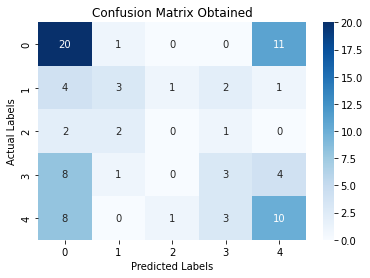

F1-score obtained is  0.3061
Precision obtained is  0.3245
Recall obtained is  0.308
Classification Report obtained is :
              precision    recall  f1-score   support

           0       0.48      0.62      0.54        32
           1       0.43      0.27      0.33        11
           2       0.00      0.00      0.00         5
           3       0.33      0.19      0.24        16
           4       0.38      0.45      0.42        22

    accuracy                           0.42        86
   macro avg       0.32      0.31      0.31        86
weighted avg       0.39      0.42      0.40        86



In [57]:
stack_estimators = [rf_stacking,gbdt_stacking,adaboost_stacking,xgboost_stacking,dt_stacking]
stack_estimators = {str(model)+"_pipeline" : estimator for estimator, model in zip(stack_estimators,["rf_stack","gbdt_stack","adaboost_stack","xgboost_stack","dt_stack"])}
print(stack_estimators)

stack_results = dict()
stack_results_table = []
voting_classifier = VotingClassifier([(estName, clone(est)) for estName, est in stack_estimators.items()], voting='hard')
model = voting_classifier
voting_classifier.fit(X_train, y_train)
stack_results[f'{model.__class__.__name__}'+"_yPred"] = voting_classifier.predict(X_test)
stack_list = [f'{model.__class__.__name__}'+" - Stacking Classifier"]
print("Results when {} is used as Voting Classifier")
stack_list.extend(print_metrics(y_test, stack_results[f'{model.__class__.__name__}'+"_yPred"], f'{model.__class__.__name__}'+" - Stacking Classifier"))
stack_results_table.append(stack_list)

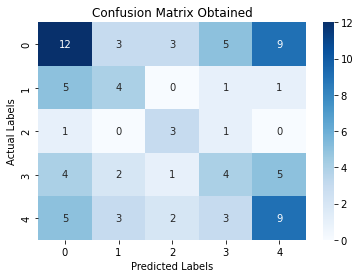

F1-score obtained is  0.3682
Precision obtained is  0.3544
Recall obtained is  0.3995
Classification Report obtained is :
              precision    recall  f1-score   support

           0       0.44      0.38      0.41        32
           1       0.33      0.36      0.35        11
           2       0.33      0.60      0.43         5
           3       0.29      0.25      0.27        16
           4       0.38      0.41      0.39        22

    accuracy                           0.37        86
   macro avg       0.35      0.40      0.37        86
weighted avg       0.38      0.37      0.37        86



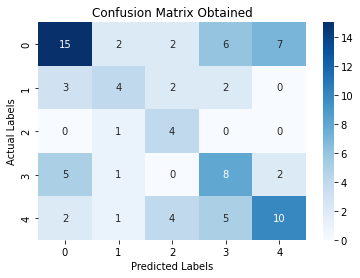

F1-score obtained is  0.4634
Precision obtained is  0.457
Recall obtained is  0.5174
Classification Report obtained is :
              precision    recall  f1-score   support

           0       0.60      0.47      0.53        32
           1       0.44      0.36      0.40        11
           2       0.33      0.80      0.47         5
           3       0.38      0.50      0.43        16
           4       0.53      0.45      0.49        22

    accuracy                           0.48        86
   macro avg       0.46      0.52      0.46        86
weighted avg       0.50      0.48      0.48        86



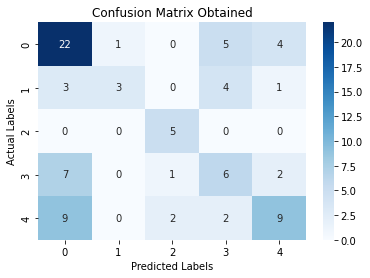

F1-score obtained is  0.5219
Precision obtained is  0.5654
Recall obtained is  0.5489
Classification Report obtained is :
              precision    recall  f1-score   support

           0       0.54      0.69      0.60        32
           1       0.75      0.27      0.40        11
           2       0.62      1.00      0.77         5
           3       0.35      0.38      0.36        16
           4       0.56      0.41      0.47        22

    accuracy                           0.52        86
   macro avg       0.57      0.55      0.52        86
weighted avg       0.54      0.52      0.51        86



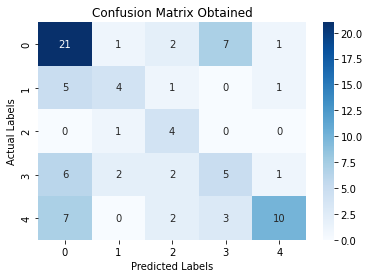

F1-score obtained is  0.4813
Precision obtained is  0.5009
Recall obtained is  0.5174
Classification Report obtained is :
              precision    recall  f1-score   support

           0       0.54      0.66      0.59        32
           1       0.50      0.36      0.42        11
           2       0.36      0.80      0.50         5
           3       0.33      0.31      0.32        16
           4       0.77      0.45      0.57        22

    accuracy                           0.51        86
   macro avg       0.50      0.52      0.48        86
weighted avg       0.54      0.51      0.51        86



,Classifier,f1-score,Precision,Recall
0,Decision Tree ADASYN,0.3682,0.3544,0.3995
1,KNN ADASYN,0.4634,0.4570,0.5174
2,SVM - ADASYN,0.5219,0.5654,0.5489
3,RF ADASYN,0.4813,0.5009,0.5174


In [60]:
best_results_table = []

dt = DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_leaf=5, random_state=0)
adasyn = ADASYN(random_state=rs)
dt_pca_pipeline = Pipeline([('adasyn',adasyn), ('dt', dt)])
dt_pca_pipeline.fit(X_train,y_train)
dt_pca_pipeline_yPred = dt_pca_pipeline.predict(X_test)
dt_list = ["Decision Tree ADASYN"]
dt_list.extend(print_metrics(y_test, dt_pca_pipeline_yPred,"Decision Tree - PCA"))
best_results_table.append(dt_list)

knn = KNeighborsClassifier(n_neighbors=1)
adasyn = ADASYN(random_state=rs)
knn_pca_pipeline = Pipeline([('adasyn',adasyn), ('knn', knn)])
knn_pca_pipeline.fit(X_train,y_train)
knn_pca_pipeline_yPred = knn_pca_pipeline.predict(X_test)
knn_list = ["KNN ADASYN"]
knn_list.extend(print_metrics(y_test, knn_pca_pipeline_yPred,"KNN - PCA"))
best_results_table.append(knn_list)

svm = SVC(C=78.47599703514607, random_state=0)
adasyn = ADASYN(random_state=rs)
svm_pca_pipeline = Pipeline([('adasyn',adasyn), ('svm', svm)])
svm_pca_pipeline.fit(X_train,y_train)
svm_pca_pipeline_yPred = svm_pca_pipeline.predict(X_test)
svm_list = ["SVM - ADASYN"]
svm_list.extend(print_metrics(y_test, svm_pca_pipeline_yPred,"SVM - PCA"))
best_results_table.append(svm_list)

rf = RandomForestClassifier(max_depth=20, n_estimators=80, random_state=0)
adasyn = ADASYN(random_state=rs)
rf_pca_pipeline = Pipeline([('adasyn',adasyn), ('rf', rf)])
rf_pca_pipeline.fit(X_train,y_train)
rf_pca_pipeline_yPred = rf_pca_pipeline.predict(X_test)
rf_list = ["RF ADASYN"]
rf_list.extend(print_metrics(y_test, rf_pca_pipeline_yPred,"RF - PCA"))
best_results_table.append(rf_list)

best_results_table

#Tabulating the obtained results and displaying the results by formatting
results_df = pd.DataFrame(best_results_table,columns = ["Classifier","f1-score","Precision","Recall"])
with pd.option_context('display.precision', 4):
    formatted_table=(results_df.style.background_gradient(cmap ='Blues'))
formatted_table

{'dt_pipeline': Pipeline(steps=[('adasyn', ADASYN(random_state=0)),
                ('dt',
                 DecisionTreeClassifier(criterion='entropy', max_depth=10,
                                        min_samples_leaf=5, random_state=0))]), 'knn_pipeline': Pipeline(steps=[('adasyn', ADASYN(random_state=0)),
                ('knn', KNeighborsClassifier(n_neighbors=1))]), 'svm_pipeline': Pipeline(steps=[('adasyn', ADASYN(random_state=0)),
                ('svm', SVC(C=78.47599703514607, random_state=0))]), 'rf_pipeline': Pipeline(steps=[('adasyn', ADASYN(random_state=0)),
                ('rf',
                 RandomForestClassifier(max_depth=20, n_estimators=80,
                                        random_state=0))])}
Results when {} is used as Voting Classifier


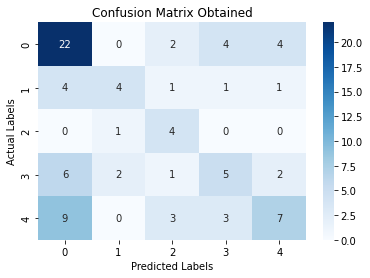

F1-score obtained is  0.4562
Precision obtained is  0.4713
Recall obtained is  0.4964
Classification Report obtained is :
              precision    recall  f1-score   support

           0       0.54      0.69      0.60        32
           1       0.57      0.36      0.44        11
           2       0.36      0.80      0.50         5
           3       0.38      0.31      0.34        16
           4       0.50      0.32      0.39        22

    accuracy                           0.49        86
   macro avg       0.47      0.50      0.46        86
weighted avg       0.49      0.49      0.47        86



In [61]:
stack_estimators = [dt_pca_pipeline,knn_pca_pipeline,svm_pca_pipeline,rf_pca_pipeline]
stack_estimators = {str(model)+"_pipeline" : estimator for estimator, model in zip(stack_estimators,["dt","knn","svm","rf"])}
print(stack_estimators)

stack_results = dict()
stack_results_table = []
voting_classifier = VotingClassifier([(estName, clone(est)) for estName, est in stack_estimators.items()], voting='hard')
model = voting_classifier
voting_classifier.fit(X_train, y_train)
stack_results[f'{model.__class__.__name__}'+"_yPred"] = voting_classifier.predict(X_test)
stack_list = [f'{model.__class__.__name__}'+" - Stacking Classifier"]
print("Results when {} is used as Voting Classifier")
stack_list.extend(print_metrics(y_test, stack_results[f'{model.__class__.__name__}'+"_yPred"], f'{model.__class__.__name__}'+" - Stacking Classifier"))
stack_results_table.append(stack_list)

{'knn_pipeline': Pipeline(steps=[('adasyn', ADASYN(random_state=0)),
                ('knn', KNeighborsClassifier(n_neighbors=1))]), 'svm_pipeline': Pipeline(steps=[('adasyn', ADASYN(random_state=0)),
                ('svm', SVC(C=78.47599703514607, random_state=0))]), 'rf_pipeline': Pipeline(steps=[('adasyn', ADASYN(random_state=0)),
                ('rf',
                 RandomForestClassifier(max_depth=20, n_estimators=80,
                                        random_state=0))])}
Results when {} is used as Voting Classifier


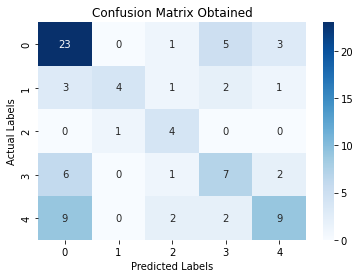

F1-score obtained is  0.5251
Precision obtained is  0.5686
Recall obtained is  0.5458
Classification Report obtained is :
              precision    recall  f1-score   support

           0       0.56      0.72      0.63        32
           1       0.80      0.36      0.50        11
           2       0.44      0.80      0.57         5
           3       0.44      0.44      0.44        16
           4       0.60      0.41      0.49        22

    accuracy                           0.55        86
   macro avg       0.57      0.55      0.53        86
weighted avg       0.57      0.55      0.54        86



In [62]:
stack_estimators = [knn_pca_pipeline,svm_pca_pipeline,rf_pca_pipeline]
stack_estimators = {str(model)+"_pipeline" : estimator for estimator, model in zip(stack_estimators,["knn","svm","rf"])}
print(stack_estimators)

stack_results = dict()
stack_results_table = []
voting_classifier = VotingClassifier([(estName, clone(est)) for estName, est in stack_estimators.items()], voting='hard')
model = voting_classifier
voting_classifier.fit(X_train, y_train)
stack_results[f'{model.__class__.__name__}'+"_yPred"] = voting_classifier.predict(X_test)
stack_list = [f'{model.__class__.__name__}'+" - Stacking Classifier"]
print("Results when {} is used as Voting Classifier")
stack_list.extend(print_metrics(y_test, stack_results[f'{model.__class__.__name__}'+"_yPred"], f'{model.__class__.__name__}'+" - Stacking Classifier"))
stack_results_table.append(stack_list)

{'svm_pipeline': Pipeline(steps=[('adasyn', ADASYN(random_state=0)),
                ('svm', SVC(C=78.47599703514607, random_state=0))]), 'rf_pipeline': Pipeline(steps=[('adasyn', ADASYN(random_state=0)),
                ('rf',
                 RandomForestClassifier(max_depth=20, n_estimators=80,
                                        random_state=0))])}
Results when {} is used as Voting Classifier


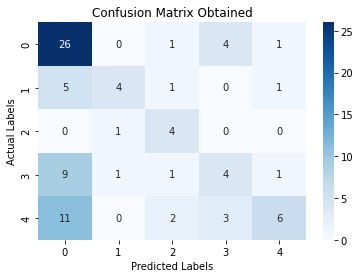

F1-score obtained is  0.4704
Precision obtained is  0.5302
Recall obtained is  0.4998
Classification Report obtained is :
              precision    recall  f1-score   support

           0       0.51      0.81      0.63        32
           1       0.67      0.36      0.47        11
           2       0.44      0.80      0.57         5
           3       0.36      0.25      0.30        16
           4       0.67      0.27      0.39        22

    accuracy                           0.51        86
   macro avg       0.53      0.50      0.47        86
weighted avg       0.54      0.51      0.48        86



In [63]:
stack_estimators = [svm_pca_pipeline,rf_pca_pipeline]
stack_estimators = {str(model)+"_pipeline" : estimator for estimator, model in zip(stack_estimators,["svm","rf"])}
print(stack_estimators)

stack_results = dict()
stack_results_table = []
voting_classifier = VotingClassifier([(estName, clone(est)) for estName, est in stack_estimators.items()], voting='hard')
model = voting_classifier
voting_classifier.fit(X_train, y_train)
stack_results[f'{model.__class__.__name__}'+"_yPred"] = voting_classifier.predict(X_test)
stack_list = [f'{model.__class__.__name__}'+" - Stacking Classifier"]
print("Results when {} is used as Voting Classifier")
stack_list.extend(print_metrics(y_test, stack_results[f'{model.__class__.__name__}'+"_yPred"], f'{model.__class__.__name__}'+" - Stacking Classifier"))
stack_results_table.append(stack_list)

{'dt_pipeline': Pipeline(steps=[('adasyn', ADASYN(random_state=0)),
                ('dt',
                 DecisionTreeClassifier(criterion='entropy', max_depth=10,
                                        min_samples_leaf=5, random_state=0))]), 'knn_pipeline': Pipeline(steps=[('adasyn', ADASYN(random_state=0)),
                ('knn', KNeighborsClassifier(n_neighbors=1))]), 'svm_pipeline': Pipeline(steps=[('adasyn', ADASYN(random_state=0)),
                ('svm', SVC(C=78.47599703514607, random_state=0))]), 'rf_pipeline': Pipeline(steps=[('adasyn', ADASYN(random_state=0)),
                ('rf',
                 RandomForestClassifier(max_depth=20, n_estimators=80,
                                        random_state=0))])}
Results when Random Forest is used as Stacking Classifier


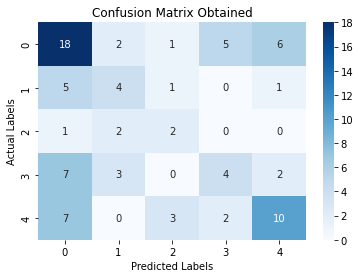

F1-score obtained is  0.3991
Precision obtained is  0.4026
Recall obtained is  0.4061
Classification Report obtained is :
              precision    recall  f1-score   support

           0       0.47      0.56      0.51        32
           1       0.36      0.36      0.36        11
           2       0.29      0.40      0.33         5
           3       0.36      0.25      0.30        16
           4       0.53      0.45      0.49        22

    accuracy                           0.44        86
   macro avg       0.40      0.41      0.40        86
weighted avg       0.44      0.44      0.44        86

Results when AdaBoost is used as Stacking Classifier


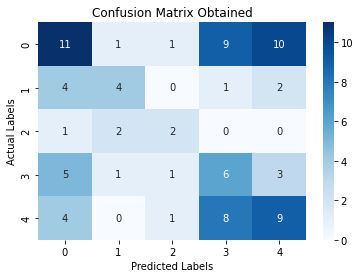

F1-score obtained is  0.3797
Precision obtained is  0.393
Recall obtained is  0.3783
Classification Report obtained is :
              precision    recall  f1-score   support

           0       0.44      0.34      0.39        32
           1       0.50      0.36      0.42        11
           2       0.40      0.40      0.40         5
           3       0.25      0.38      0.30        16
           4       0.38      0.41      0.39        22

    accuracy                           0.37        86
   macro avg       0.39      0.38      0.38        86
weighted avg       0.39      0.37      0.38        86

[20:24:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Results when XGBoost is used as Stacking Classifier


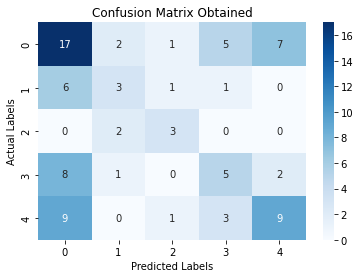

F1-score obtained is  0.4234
Precision obtained is  0.4314
Recall obtained is  0.4251
Classification Report obtained is :
              precision    recall  f1-score   support

           0       0.42      0.53      0.47        32
           1       0.38      0.27      0.32        11
           2       0.50      0.60      0.55         5
           3       0.36      0.31      0.33        16
           4       0.50      0.41      0.45        22

    accuracy                           0.43        86
   macro avg       0.43      0.43      0.42        86
weighted avg       0.43      0.43      0.42        86

Results when Gradient-Boosted Decision Tree is used as Stacking Classifier


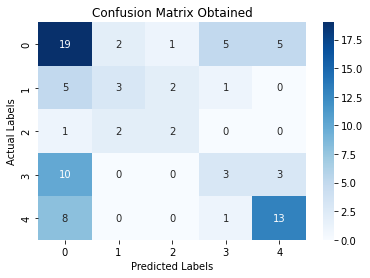

F1-score obtained is  0.4151
Precision obtained is  0.4379
Recall obtained is  0.409
Classification Report obtained is :
              precision    recall  f1-score   support

           0       0.44      0.59      0.51        32
           1       0.43      0.27      0.33        11
           2       0.40      0.40      0.40         5
           3       0.30      0.19      0.23        16
           4       0.62      0.59      0.60        22

    accuracy                           0.47        86
   macro avg       0.44      0.41      0.42        86
weighted avg       0.46      0.47      0.45        86

Results when Decision Tree is used as Stacking Classifier


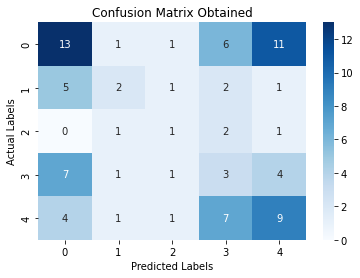

F1-score obtained is  0.2806
Precision obtained is  0.2956
Recall obtained is  0.2769
Classification Report obtained is :
              precision    recall  f1-score   support

           0       0.45      0.41      0.43        32
           1       0.33      0.18      0.24        11
           2       0.20      0.20      0.20         5
           3       0.15      0.19      0.17        16
           4       0.35      0.41      0.38        22

    accuracy                           0.33        86
   macro avg       0.30      0.28      0.28        86
weighted avg       0.34      0.33      0.33        86



,Classifier,f1-score,Precision,Recall
0,RandomForestClassifier - Stacking Classifier,0.3991,0.4026,0.4061
1,AdaBoostClassifier - Stacking Classifier,0.3797,0.3930,0.3783
2,XGBClassifier - Stacking Classifier,0.4234,0.4314,0.4251
3,GradientBoostingClassifier - Stacking Classifier,0.4151,0.4379,0.4090
4,DecisionTreeClassifier - Stacking Classifier,0.2806,0.2956,0.2769


In [64]:
stack_estimators = [dt_pca_pipeline,knn_pca_pipeline,svm_pca_pipeline,rf_pca_pipeline]
stack_estimators = {str(model)+"_pipeline" : estimator for estimator, model in zip(stack_estimators,["dt","knn","svm","rf"])}
print(stack_estimators)

stack_results = dict()
stack_results_table = []

from sklearn.base import clone
for model,model_name in zip([RandomForestClassifier(random_state=rs)],["Random Forest"]):
    stacking = StackingClassifier([(estName, clone(est)) for estName, est in stack_estimators.items()], model)
    stacking.fit(X_train, y_train)
    stack_results[f'{model.__class__.__name__}'+"_yPred"] = stacking.predict(X_test)
    stack_list = [f'{model.__class__.__name__}'+" - Stacking Classifier"]
    print("Results when {} is used as Stacking Classifier".format(model_name))
    stack_list.extend(print_metrics(y_test, stack_results[f'{model.__class__.__name__}'+"_yPred"], f'{model.__class__.__name__}'+" - Stacking Classifier"))
    stack_results_table.append(stack_list)
    rf_stacking = stacking
	
for model,model_name in zip([AdaBoostClassifier(random_state = rs)],["AdaBoost"]):
    stacking = StackingClassifier([(estName, clone(est)) for estName, est in stack_estimators.items()], model)
    stacking.fit(X_train, y_train)
    stack_results[f'{model.__class__.__name__}'+"_yPred"] = stacking.predict(X_test)
    stack_list = [f'{model.__class__.__name__}'+" - Stacking Classifier"]
    print("Results when {} is used as Stacking Classifier".format(model_name))
    stack_list.extend(print_metrics(y_test, stack_results[f'{model.__class__.__name__}'+"_yPred"], f'{model.__class__.__name__}'+" - Stacking Classifier"))
    stack_results_table.append(stack_list)
    adaboost_stacking = stacking

from xgboost import XGBClassifier
for model,model_name in zip([XGBClassifier(objective="binary:logistic", random_state=rs)],["XGBoost"]):
    stacking = StackingClassifier([(estName, clone(est)) for estName, est in stack_estimators.items()], model)
    stacking.fit(X_train, y_train)
    stack_results[f'{model.__class__.__name__}'+"_yPred"] = stacking.predict(X_test)
    stack_list = [f'{model.__class__.__name__}'+" - Stacking Classifier"]
    print("Results when {} is used as Stacking Classifier".format(model_name))
    stack_list.extend(print_metrics(y_test, stack_results[f'{model.__class__.__name__}'+"_yPred"], f'{model.__class__.__name__}'+" - Stacking Classifier"))
    stack_results_table.append(stack_list)
    xgboost_stacking = stacking

for model,model_name in zip([GradientBoostingClassifier(random_state = rs)],["Gradient-Boosted Decision Tree"]):
    stacking = StackingClassifier([(estName, clone(est)) for estName, est in stack_estimators.items()], model)
    stacking.fit(X_train, y_train)
    stack_results[f'{model.__class__.__name__}'+"_yPred"] = stacking.predict(X_test)
    stack_list = [f'{model.__class__.__name__}'+" - Stacking Classifier"]
    print("Results when {} is used as Stacking Classifier".format(model_name))
    stack_list.extend(print_metrics(y_test, stack_results[f'{model.__class__.__name__}'+"_yPred"], f'{model.__class__.__name__}'+" - Stacking Classifier"))
    stack_results_table.append(stack_list)
    gbdt_stacking = stacking

for model,model_name in zip([DecisionTreeClassifier(random_state=rs)],["Decision Tree"]):
    stacking = StackingClassifier([(estName, clone(est)) for estName, est in stack_estimators.items()], model)
    stacking.fit(X_train, y_train)
    stack_results[f'{model.__class__.__name__}'+"_yPred"] = stacking.predict(X_test)
    stack_list = [f'{model.__class__.__name__}'+" - Stacking Classifier"]
    print("Results when {} is used as Stacking Classifier".format(model_name))
    stack_list.extend(print_metrics(y_test, stack_results[f'{model.__class__.__name__}'+"_yPred"], f'{model.__class__.__name__}'+" - Stacking Classifier"))
    stack_results_table.append(stack_list)
    dt_stacking = stacking

stack_results_table

#Tabulating the obtained results and displaying the results by formatting
results_df = pd.DataFrame(stack_results_table,columns = ["Classifier","f1-score","Precision","Recall"])
with pd.option_context('display.precision', 4):
    formatted_table=(results_df.style.background_gradient(cmap ='Blues'))
formatted_table

{'rf_stack_pipeline': StackingClassifier(estimators=[('dt_pipeline',
                                Pipeline(steps=[('adasyn',
                                                 ADASYN(random_state=0)),
                                                ('dt',
                                                 DecisionTreeClassifier(criterion='entropy',
                                                                        max_depth=10,
                                                                        min_samples_leaf=5,
                                                                        random_state=0))])),
                               ('knn_pipeline',
                                Pipeline(steps=[('adasyn',
                                                 ADASYN(random_state=0)),
                                                ('knn',
                                                 KNeighborsClassifier(n_neighbors=1))])),
                               ('svm_pipeline',
    

[20:25:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Results when {} is used as Voting Classifier


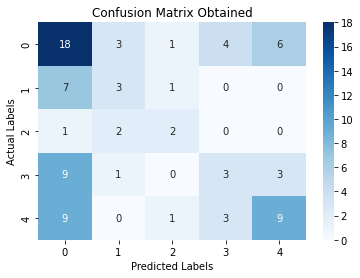

F1-score obtained is  0.3709
Precision obtained is  0.3885
Recall obtained is  0.3664
Classification Report obtained is :
              precision    recall  f1-score   support

           0       0.41      0.56      0.47        32
           1       0.33      0.27      0.30        11
           2       0.40      0.40      0.40         5
           3       0.30      0.19      0.23        16
           4       0.50      0.41      0.45        22

    accuracy                           0.41        86
   macro avg       0.39      0.37      0.37        86
weighted avg       0.40      0.41      0.40        86



In [65]:
stack_estimators = [rf_stacking,gbdt_stacking,adaboost_stacking,xgboost_stacking,dt_stacking]
stack_estimators = {str(model)+"_pipeline" : estimator for estimator, model in zip(stack_estimators,["rf_stack","gbdt_stack","adaboost_stack","xgboost_stack","dt_stack"])}
print(stack_estimators)

stack_results = dict()
stack_results_table = []
voting_classifier = VotingClassifier([(estName, clone(est)) for estName, est in stack_estimators.items()], voting='hard')
model = voting_classifier
voting_classifier.fit(X_train, y_train)
stack_results[f'{model.__class__.__name__}'+"_yPred"] = voting_classifier.predict(X_test)
stack_list = [f'{model.__class__.__name__}'+" - Stacking Classifier"]
print("Results when {} is used as Voting Classifier")
stack_list.extend(print_metrics(y_test, stack_results[f'{model.__class__.__name__}'+"_yPred"], f'{model.__class__.__name__}'+" - Stacking Classifier"))
stack_results_table.append(stack_list)

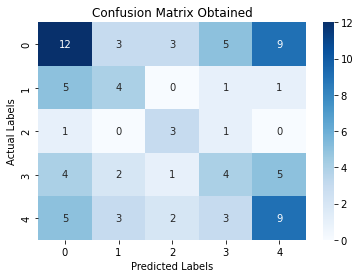

F1-score obtained is  0.3682
Precision obtained is  0.3544
Recall obtained is  0.3995
Classification Report obtained is :
              precision    recall  f1-score   support

           0       0.44      0.38      0.41        32
           1       0.33      0.36      0.35        11
           2       0.33      0.60      0.43         5
           3       0.29      0.25      0.27        16
           4       0.38      0.41      0.39        22

    accuracy                           0.37        86
   macro avg       0.35      0.40      0.37        86
weighted avg       0.38      0.37      0.37        86



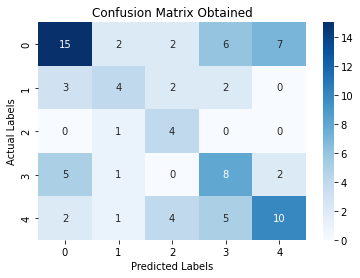

F1-score obtained is  0.4634
Precision obtained is  0.457
Recall obtained is  0.5174
Classification Report obtained is :
              precision    recall  f1-score   support

           0       0.60      0.47      0.53        32
           1       0.44      0.36      0.40        11
           2       0.33      0.80      0.47         5
           3       0.38      0.50      0.43        16
           4       0.53      0.45      0.49        22

    accuracy                           0.48        86
   macro avg       0.46      0.52      0.46        86
weighted avg       0.50      0.48      0.48        86



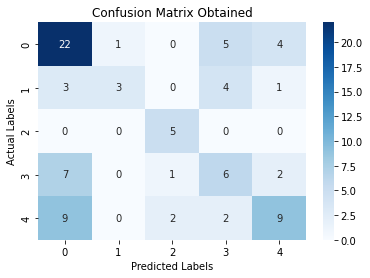

F1-score obtained is  0.5219
Precision obtained is  0.5654
Recall obtained is  0.5489
Classification Report obtained is :
              precision    recall  f1-score   support

           0       0.54      0.69      0.60        32
           1       0.75      0.27      0.40        11
           2       0.62      1.00      0.77         5
           3       0.35      0.38      0.36        16
           4       0.56      0.41      0.47        22

    accuracy                           0.52        86
   macro avg       0.57      0.55      0.52        86
weighted avg       0.54      0.52      0.51        86



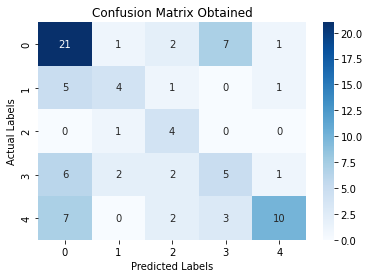

F1-score obtained is  0.4813
Precision obtained is  0.5009
Recall obtained is  0.5174
Classification Report obtained is :
              precision    recall  f1-score   support

           0       0.54      0.66      0.59        32
           1       0.50      0.36      0.42        11
           2       0.36      0.80      0.50         5
           3       0.33      0.31      0.32        16
           4       0.77      0.45      0.57        22

    accuracy                           0.51        86
   macro avg       0.50      0.52      0.48        86
weighted avg       0.54      0.51      0.51        86



,Classifier,f1-score,Precision,Recall
0,Decision Tree ADASYN,0.3682,0.3544,0.3995
1,KNN ADASYN,0.4634,0.4570,0.5174
2,SVM - ADASYN,0.5219,0.5654,0.5489
3,RF ADASYN,0.4813,0.5009,0.5174


In [66]:
# Not used
# best_results_table = []

# dt = DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_leaf=5, random_state=0)
# adasyn = ADASYN(random_state=rs)
# dt_pca_pipeline = Pipeline([('adasyn',adasyn), ('dt', dt)])
# dt_pca_pipeline.fit(X_train,y_train)
# dt_pca_pipeline_yPred = dt_pca_pipeline.predict(X_test)
# dt_list = ["Decision Tree ADASYN"]
# dt_list.extend(print_metrics(y_test, dt_pca_pipeline_yPred,"Decision Tree - PCA"))
# best_results_table.append(dt_list)

# knn = KNeighborsClassifier(n_neighbors=1)
# adasyn = ADASYN(random_state=rs)
# knn_pca_pipeline = Pipeline([('adasyn',adasyn), ('knn', knn)])
# knn_pca_pipeline.fit(X_train,y_train)
# knn_pca_pipeline_yPred = knn_pca_pipeline.predict(X_test)
# knn_list = ["KNN ADASYN"]
# knn_list.extend(print_metrics(y_test, knn_pca_pipeline_yPred,"KNN - PCA"))
# best_results_table.append(knn_list)

# svm = SVC(C=78.47599703514607, random_state=0)
# adasyn = ADASYN(random_state=rs)
# svm_pca_pipeline = Pipeline([('adasyn',adasyn), ('svm', svm)])
# svm_pca_pipeline.fit(X_train,y_train)
# svm_pca_pipeline_yPred = svm_pca_pipeline.predict(X_test)
# svm_list = ["SVM - ADASYN"]
# svm_list.extend(print_metrics(y_test, svm_pca_pipeline_yPred,"SVM - PCA"))
# best_results_table.append(svm_list)

# rf = RandomForestClassifier(max_depth=20, n_estimators=80, random_state=0)
# adasyn = ADASYN(random_state=rs)
# rf_pca_pipeline = Pipeline([('adasyn',adasyn), ('rf', rf)])
# rf_pca_pipeline.fit(X_train,y_train)
# rf_pca_pipeline_yPred = rf_pca_pipeline.predict(X_test)
# rf_list = ["RF ADASYN"]
# rf_list.extend(print_metrics(y_test, rf_pca_pipeline_yPred,"RF - PCA"))
# best_results_table.append(rf_list)

# best_results_table

# #Tabulating the obtained results and displaying the results by formatting
# results_df = pd.DataFrame(best_results_table,columns = ["Classifier","f1-score","Precision","Recall"])
# with pd.option_context('display.precision', 4):
#     formatted_table=(results_df.style.background_gradient(cmap ='Blues'))
# formatted_table

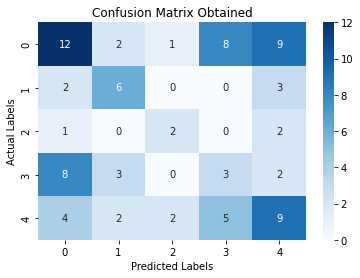

F1-score obtained is  0.3755
Precision obtained is  0.3707
Recall obtained is  0.3834
Classification Report obtained is :
              precision    recall  f1-score   support

           0       0.44      0.38      0.41        32
           1       0.46      0.55      0.50        11
           2       0.40      0.40      0.40         5
           3       0.19      0.19      0.19        16
           4       0.36      0.41      0.38        22

    accuracy                           0.37        86
   macro avg       0.37      0.38      0.38        86
weighted avg       0.37      0.37      0.37        86



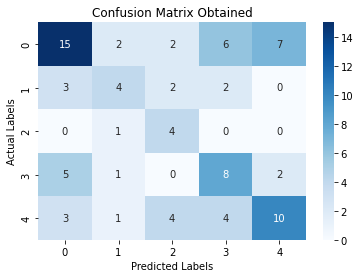

F1-score obtained is  0.464
Precision obtained is  0.4562
Recall obtained is  0.5174
Classification Report obtained is :
              precision    recall  f1-score   support

           0       0.58      0.47      0.52        32
           1       0.44      0.36      0.40        11
           2       0.33      0.80      0.47         5
           3       0.40      0.50      0.44        16
           4       0.53      0.45      0.49        22

    accuracy                           0.48        86
   macro avg       0.46      0.52      0.46        86
weighted avg       0.50      0.48      0.48        86



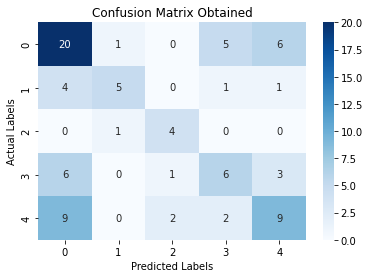

F1-score obtained is  0.5249
Precision obtained is  0.5402
Recall obtained is  0.5327
Classification Report obtained is :
              precision    recall  f1-score   support

           0       0.51      0.62      0.56        32
           1       0.71      0.45      0.56        11
           2       0.57      0.80      0.67         5
           3       0.43      0.38      0.40        16
           4       0.47      0.41      0.44        22

    accuracy                           0.51        86
   macro avg       0.54      0.53      0.52        86
weighted avg       0.52      0.51      0.51        86



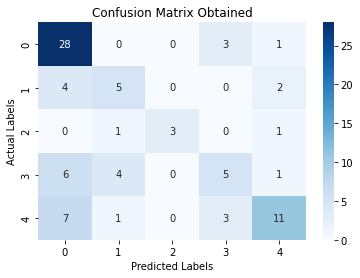

F1-score obtained is  0.5762
Precision obtained is  0.6438
Recall obtained is  0.5484
Classification Report obtained is :
              precision    recall  f1-score   support

           0       0.62      0.88      0.73        32
           1       0.45      0.45      0.45        11
           2       1.00      0.60      0.75         5
           3       0.45      0.31      0.37        16
           4       0.69      0.50      0.58        22

    accuracy                           0.60        86
   macro avg       0.64      0.55      0.58        86
weighted avg       0.61      0.60      0.59        86



,Classifier,f1-score,Precision,Recall
0,Decision Tree ADASYN - After Hyperparameter Tuning and Feature Selection based on PCA,0.3755,0.3707,0.3834
1,KNN ADASYN- After Hyperparameter Tuning and Feature Selection based on PCA,0.4640,0.4562,0.5174
2,SVM ADASYN- After Hyperparameter Tuning and Feature Selection based on PCA,0.5249,0.5402,0.5327
3,RF ADASYN- After Hyperparameter Tuning and Feature Selection based on PCA,0.5762,0.6438,0.5484


In [67]:
best_results_table = []

dt = DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_leaf=5, random_state=0)
adasyn = ADASYN(random_state=rs)
pca = PCA(n_components=18,random_state=rs)
dt_pca_pipeline = Pipeline([('adasyn',adasyn),('pca', pca), ('dt', dt)])
dt_pca_pipeline.fit(X_train,y_train)
dt_pca_pipeline_yPred = dt_pca_pipeline.predict(X_test)
dt_list = ["Decision Tree ADASYN - After Hyperparameter Tuning and Feature Selection based on PCA"]
dt_list.extend(print_metrics(y_test, dt_pca_pipeline_yPred,"Decision Tree - PCA"))
best_results_table.append(dt_list)

knn = KNeighborsClassifier(n_neighbors=1)
adasyn = ADASYN(random_state=rs)
pca = PCA(n_components=227,random_state=rs)
knn_pca_pipeline = Pipeline([('adasyn',adasyn),('pca', pca), ('knn', knn)])
knn_pca_pipeline.fit(X_train,y_train)
knn_pca_pipeline_yPred = knn_pca_pipeline.predict(X_test)
knn_list = ["KNN ADASYN- After Hyperparameter Tuning and Feature Selection based on PCA"]
knn_list.extend(print_metrics(y_test, knn_pca_pipeline_yPred,"KNN - PCA"))
best_results_table.append(knn_list)

svm = SVC(C=78.47599703514607, random_state=0)
adasyn = ADASYN(random_state=rs)
pca = PCA(n_components=86,random_state=rs)
svm_pca_pipeline = Pipeline([('adasyn',adasyn), ('pca', pca), ('svm', svm)])
svm_pca_pipeline.fit(X_train,y_train)
svm_pca_pipeline_yPred = svm_pca_pipeline.predict(X_test)
svm_list = ["SVM ADASYN- After Hyperparameter Tuning and Feature Selection based on PCA"]
svm_list.extend(print_metrics(y_test, svm_pca_pipeline_yPred,"SVM - PCA"))
best_results_table.append(svm_list)

rf = RandomForestClassifier(max_depth=20, n_estimators=80, random_state=0)
adasyn = ADASYN(random_state=rs)
pca = PCA(n_components=125,random_state=rs)
rf_pca_pipeline = Pipeline([('adasyn',adasyn),('pca', pca), ('rf', rf)])
rf_pca_pipeline.fit(X_train,y_train)
rf_pca_pipeline_yPred = rf_pca_pipeline.predict(X_test)
rf_list = ["RF ADASYN- After Hyperparameter Tuning and Feature Selection based on PCA"]
rf_list.extend(print_metrics(y_test, rf_pca_pipeline_yPred,"RF - PCA"))
best_results_table.append(rf_list)

best_results_table

#Tabulating the obtained results and displaying the results by formatting
results_df = pd.DataFrame(best_results_table,columns = ["Classifier","f1-score","Precision","Recall"])
with pd.option_context('display.precision', 4):
    formatted_table=(results_df.style.background_gradient(cmap ='Blues'))
formatted_table

{'dt_pipeline': Pipeline(steps=[('adasyn', ADASYN(random_state=0)),
                ('pca', PCA(n_components=18, random_state=0)),
                ('dt',
                 DecisionTreeClassifier(criterion='entropy', max_depth=10,
                                        min_samples_leaf=5, random_state=0))]), 'knn_pipeline': Pipeline(steps=[('adasyn', ADASYN(random_state=0)),
                ('pca', PCA(n_components=227, random_state=0)),
                ('knn', KNeighborsClassifier(n_neighbors=1))]), 'svm_pipeline': Pipeline(steps=[('adasyn', ADASYN(random_state=0)),
                ('pca', PCA(n_components=86, random_state=0)),
                ('svm', SVC(C=78.47599703514607, random_state=0))]), 'rf_pipeline': Pipeline(steps=[('adasyn', ADASYN(random_state=0)),
                ('pca', PCA(n_components=125, random_state=0)),
                ('rf',
                 RandomForestClassifier(max_depth=20, n_estimators=80,
                                        random_state=0))])}
Results wh

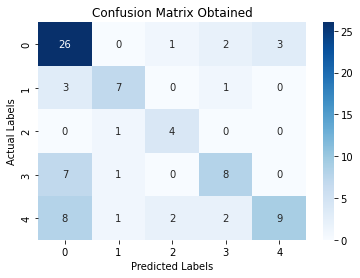

F1-score obtained is  0.6197
Precision obtained is  0.6455
Recall obtained is  0.6316
Classification Report obtained is :
              precision    recall  f1-score   support

           0       0.59      0.81      0.68        32
           1       0.70      0.64      0.67        11
           2       0.57      0.80      0.67         5
           3       0.62      0.50      0.55        16
           4       0.75      0.41      0.53        22

    accuracy                           0.63        86
   macro avg       0.65      0.63      0.62        86
weighted avg       0.65      0.63      0.62        86



In [68]:
stack_estimators = [dt_pca_pipeline,knn_pca_pipeline,svm_pca_pipeline,rf_pca_pipeline]
stack_estimators = {str(model)+"_pipeline" : estimator for estimator, model in zip(stack_estimators,["dt","knn","svm","rf"])}
print(stack_estimators)

stack_results = dict()
stack_results_table = []
voting_classifier = VotingClassifier([(estName, clone(est)) for estName, est in stack_estimators.items()], voting='hard')
model = voting_classifier
voting_classifier.fit(X_train, y_train)
stack_results[f'{model.__class__.__name__}'+"_yPred"] = voting_classifier.predict(X_test)
stack_list = [f'{model.__class__.__name__}'+" - Stacking Classifier"]
print("Results when {} is used as Voting Classifier")
stack_list.extend(print_metrics(y_test, stack_results[f'{model.__class__.__name__}'+"_yPred"], f'{model.__class__.__name__}'+" - Stacking Classifier"))
stack_results_table.append(stack_list)

{'knn_pipeline': Pipeline(steps=[('adasyn', ADASYN(random_state=0)),
                ('pca', PCA(n_components=227, random_state=0)),
                ('knn', KNeighborsClassifier(n_neighbors=1))]), 'svm_pipeline': Pipeline(steps=[('adasyn', ADASYN(random_state=0)),
                ('pca', PCA(n_components=86, random_state=0)),
                ('svm', SVC(C=78.47599703514607, random_state=0))]), 'rf_pipeline': Pipeline(steps=[('adasyn', ADASYN(random_state=0)),
                ('pca', PCA(n_components=125, random_state=0)),
                ('rf',
                 RandomForestClassifier(max_depth=20, n_estimators=80,
                                        random_state=0))])}
Results when {} is used as Voting Classifier


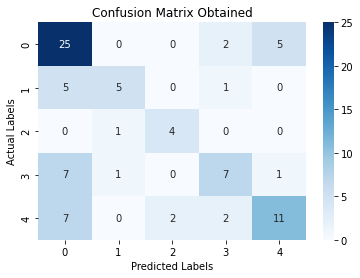

F1-score obtained is  0.601
Precision obtained is  0.6359
Recall obtained is  0.5947
Classification Report obtained is :
              precision    recall  f1-score   support

           0       0.57      0.78      0.66        32
           1       0.71      0.45      0.56        11
           2       0.67      0.80      0.73         5
           3       0.58      0.44      0.50        16
           4       0.65      0.50      0.56        22

    accuracy                           0.60        86
   macro avg       0.64      0.59      0.60        86
weighted avg       0.62      0.60      0.60        86



In [69]:
stack_estimators = [knn_pca_pipeline,svm_pca_pipeline,rf_pca_pipeline]
stack_estimators = {str(model)+"_pipeline" : estimator for estimator, model in zip(stack_estimators,["knn","svm","rf"])}
print(stack_estimators)

stack_results = dict()
stack_results_table = []
voting_classifier = VotingClassifier([(estName, clone(est)) for estName, est in stack_estimators.items()], voting='hard')
model = voting_classifier
voting_classifier.fit(X_train, y_train)
stack_results[f'{model.__class__.__name__}'+"_yPred"] = voting_classifier.predict(X_test)
stack_list = [f'{model.__class__.__name__}'+" - Stacking Classifier"]
print("Results when {} is used as Voting Classifier")
stack_list.extend(print_metrics(y_test, stack_results[f'{model.__class__.__name__}'+"_yPred"], f'{model.__class__.__name__}'+" - Stacking Classifier"))
stack_results_table.append(stack_list)

{'knn_pipeline': Pipeline(steps=[('adasyn', ADASYN(random_state=0)),
                ('pca', PCA(n_components=86, random_state=0)),
                ('svm', SVC(C=78.47599703514607, random_state=0))]), 'svm_pipeline': Pipeline(steps=[('adasyn', ADASYN(random_state=0)),
                ('pca', PCA(n_components=125, random_state=0)),
                ('rf',
                 RandomForestClassifier(max_depth=20, n_estimators=80,
                                        random_state=0))])}
Results when {} is used as Voting Classifier


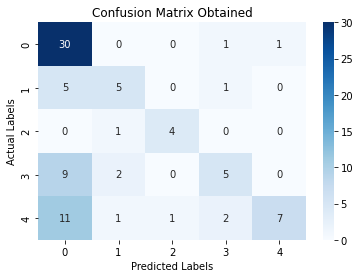

F1-score obtained is  0.5713
Precision obtained is  0.6663
Recall obtained is  0.5645
Classification Report obtained is :
              precision    recall  f1-score   support

           0       0.55      0.94      0.69        32
           1       0.56      0.45      0.50        11
           2       0.80      0.80      0.80         5
           3       0.56      0.31      0.40        16
           4       0.88      0.32      0.47        22

    accuracy                           0.59        86
   macro avg       0.67      0.56      0.57        86
weighted avg       0.65      0.59      0.56        86



In [70]:
stack_estimators = [svm_pca_pipeline,rf_pca_pipeline]
stack_estimators = {str(model)+"_pipeline" : estimator for estimator, model in zip(stack_estimators,["knn","svm","rf"])}
print(stack_estimators)

stack_results = dict()
stack_results_table = []
voting_classifier = VotingClassifier([(estName, clone(est)) for estName, est in stack_estimators.items()], voting='hard')
model = voting_classifier
voting_classifier.fit(X_train, y_train)
stack_results[f'{model.__class__.__name__}'+"_yPred"] = voting_classifier.predict(X_test)
stack_list = [f'{model.__class__.__name__}'+" - Stacking Classifier"]
print("Results when {} is used as Voting Classifier")
stack_list.extend(print_metrics(y_test, stack_results[f'{model.__class__.__name__}'+"_yPred"], f'{model.__class__.__name__}'+" - Stacking Classifier"))
stack_results_table.append(stack_list)

{'knn_pipeline': Pipeline(steps=[('adasyn', ADASYN(random_state=0)),
                ('pca', PCA(n_components=227, random_state=0)),
                ('knn', KNeighborsClassifier(n_neighbors=1))]), 'svm_pipeline': Pipeline(steps=[('adasyn', ADASYN(random_state=0)),
                ('pca', PCA(n_components=86, random_state=0)),
                ('svm', SVC(C=78.47599703514607, random_state=0))])}
Results when {} is used as Voting Classifier


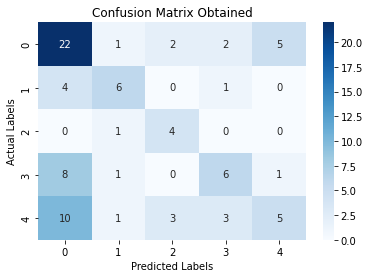

F1-score obtained is  0.4907
Precision obtained is  0.4998
Recall obtained is  0.527
Classification Report obtained is :
              precision    recall  f1-score   support

           0       0.50      0.69      0.58        32
           1       0.60      0.55      0.57        11
           2       0.44      0.80      0.57         5
           3       0.50      0.38      0.43        16
           4       0.45      0.23      0.30        22

    accuracy                           0.50        86
   macro avg       0.50      0.53      0.49        86
weighted avg       0.50      0.50      0.48        86



In [71]:
stack_estimators = [knn_pca_pipeline,svm_pca_pipeline]
stack_estimators = {str(model)+"_pipeline" : estimator for estimator, model in zip(stack_estimators,["knn","svm"])}
print(stack_estimators)

stack_results = dict()
stack_results_table = []
voting_classifier = VotingClassifier([(estName, clone(est)) for estName, est in stack_estimators.items()], voting='hard')
model = voting_classifier
voting_classifier.fit(X_train, y_train)
stack_results[f'{model.__class__.__name__}'+"_yPred"] = voting_classifier.predict(X_test)
stack_list = [f'{model.__class__.__name__}'+" - Stacking Classifier"]
print("Results when {} is used as Voting Classifier")
stack_list.extend(print_metrics(y_test, stack_results[f'{model.__class__.__name__}'+"_yPred"], f'{model.__class__.__name__}'+" - Stacking Classifier"))
stack_results_table.append(stack_list)

{'knn_pipeline': Pipeline(steps=[('adasyn', ADASYN(random_state=0)),
                ('pca', PCA(n_components=227, random_state=0)),
                ('knn', KNeighborsClassifier(n_neighbors=1))]), 'rf_pipeline': Pipeline(steps=[('adasyn', ADASYN(random_state=0)),
                ('pca', PCA(n_components=125, random_state=0)),
                ('rf',
                 RandomForestClassifier(max_depth=20, n_estimators=80,
                                        random_state=0))])}
Results when {} is used as Voting Classifier


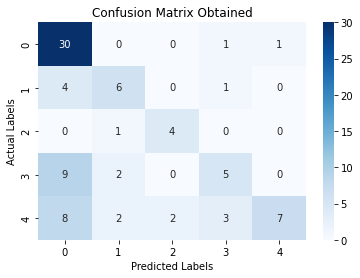

F1-score obtained is  0.5694
Precision obtained is  0.6351
Recall obtained is  0.5827
Classification Report obtained is :
              precision    recall  f1-score   support

           0       0.59      0.94      0.72        32
           1       0.55      0.55      0.55        11
           2       0.67      0.80      0.73         5
           3       0.50      0.31      0.38        16
           4       0.88      0.32      0.47        22

    accuracy                           0.60        86
   macro avg       0.64      0.58      0.57        86
weighted avg       0.64      0.60      0.57        86



In [72]:
stack_estimators = [knn_pca_pipeline,rf_pca_pipeline]
stack_estimators = {str(model)+"_pipeline" : estimator for estimator, model in zip(stack_estimators,["knn","rf"])}
print(stack_estimators)

stack_results = dict()
stack_results_table = []
voting_classifier = VotingClassifier([(estName, clone(est)) for estName, est in stack_estimators.items()], voting='hard')
model = voting_classifier
voting_classifier.fit(X_train, y_train)
stack_results[f'{model.__class__.__name__}'+"_yPred"] = voting_classifier.predict(X_test)
stack_list = [f'{model.__class__.__name__}'+" - Stacking Classifier"]
print("Results when {} is used as Voting Classifier")
stack_list.extend(print_metrics(y_test, stack_results[f'{model.__class__.__name__}'+"_yPred"], f'{model.__class__.__name__}'+" - Stacking Classifier"))
stack_results_table.append(stack_list)

{'knn_pipeline': Pipeline(steps=[('adasyn', ADASYN(random_state=0)),
                ('pca', PCA(n_components=227, random_state=0)),
                ('knn', KNeighborsClassifier(n_neighbors=1))]), 'dt_pipeline': Pipeline(steps=[('adasyn', ADASYN(random_state=0)),
                ('pca', PCA(n_components=18, random_state=0)),
                ('dt',
                 DecisionTreeClassifier(criterion='entropy', max_depth=10,
                                        min_samples_leaf=5, random_state=0))]), 'rf_pipeline': Pipeline(steps=[('adasyn', ADASYN(random_state=0)),
                ('pca', PCA(n_components=125, random_state=0)),
                ('rf',
                 RandomForestClassifier(max_depth=20, n_estimators=80,
                                        random_state=0))])}
Results when {} is used as Voting Classifier


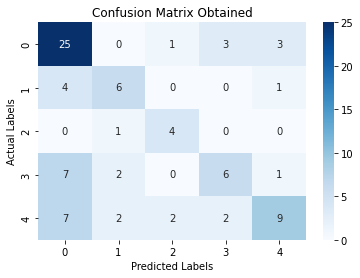

F1-score obtained is  0.5646
Precision obtained is  0.5773
Recall obtained is  0.5822
Classification Report obtained is :
              precision    recall  f1-score   support

           0       0.58      0.78      0.67        32
           1       0.55      0.55      0.55        11
           2       0.57      0.80      0.67         5
           3       0.55      0.38      0.44        16
           4       0.64      0.41      0.50        22

    accuracy                           0.58        86
   macro avg       0.58      0.58      0.56        86
weighted avg       0.59      0.58      0.57        86



In [73]:
stack_estimators = [knn_pca_pipeline,dt_pca_pipeline,rf_pca_pipeline]
stack_estimators = {str(model)+"_pipeline" : estimator for estimator, model in zip(stack_estimators,["knn","dt","rf"])}
print(stack_estimators)

stack_results = dict()
stack_results_table = []
voting_classifier = VotingClassifier([(estName, clone(est)) for estName, est in stack_estimators.items()], voting='hard')
model = voting_classifier
voting_classifier.fit(X_train, y_train)
stack_results[f'{model.__class__.__name__}'+"_yPred"] = voting_classifier.predict(X_test)
stack_list = [f'{model.__class__.__name__}'+" - Stacking Classifier"]
print("Results when {} is used as Voting Classifier")
stack_list.extend(print_metrics(y_test, stack_results[f'{model.__class__.__name__}'+"_yPred"], f'{model.__class__.__name__}'+" - Stacking Classifier"))
stack_results_table.append(stack_list)

{'knn_pipeline': Pipeline(steps=[('adasyn', ADASYN(random_state=0)),
                ('pca', PCA(n_components=227, random_state=0)),
                ('knn', KNeighborsClassifier(n_neighbors=1))]), 'dt_pipeline': Pipeline(steps=[('adasyn', ADASYN(random_state=0)),
                ('pca', PCA(n_components=18, random_state=0)),
                ('dt',
                 DecisionTreeClassifier(criterion='entropy', max_depth=10,
                                        min_samples_leaf=5, random_state=0))])}
Results when {} is used as Voting Classifier


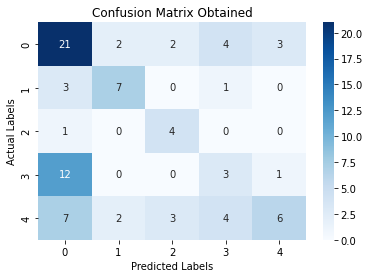

F1-score obtained is  0.4699
Precision obtained is  0.4816
Recall obtained is  0.5106
Classification Report obtained is :
              precision    recall  f1-score   support

           0       0.48      0.66      0.55        32
           1       0.64      0.64      0.64        11
           2       0.44      0.80      0.57         5
           3       0.25      0.19      0.21        16
           4       0.60      0.27      0.37        22

    accuracy                           0.48        86
   macro avg       0.48      0.51      0.47        86
weighted avg       0.48      0.48      0.46        86



In [74]:
stack_estimators = [knn_pca_pipeline,dt_pca_pipeline]
stack_estimators = {str(model)+"_pipeline" : estimator for estimator, model in zip(stack_estimators,["knn","dt"])}
print(stack_estimators)

stack_results = dict()
stack_results_table = []
voting_classifier = VotingClassifier([(estName, clone(est)) for estName, est in stack_estimators.items()], voting='hard')
model = voting_classifier
voting_classifier.fit(X_train, y_train)
stack_results[f'{model.__class__.__name__}'+"_yPred"] = voting_classifier.predict(X_test)
stack_list = [f'{model.__class__.__name__}'+" - Stacking Classifier"]
print("Results when {} is used as Voting Classifier")
stack_list.extend(print_metrics(y_test, stack_results[f'{model.__class__.__name__}'+"_yPred"], f'{model.__class__.__name__}'+" - Stacking Classifier"))
stack_results_table.append(stack_list)

{'dt_pipeline': Pipeline(steps=[('adasyn', ADASYN(random_state=0)),
                ('pca', PCA(n_components=18, random_state=0)),
                ('dt',
                 DecisionTreeClassifier(criterion='entropy', max_depth=10,
                                        min_samples_leaf=5, random_state=0))]), 'knn_pipeline': Pipeline(steps=[('adasyn', ADASYN(random_state=0)),
                ('pca', PCA(n_components=227, random_state=0)),
                ('knn', KNeighborsClassifier(n_neighbors=1))]), 'svm_pipeline': Pipeline(steps=[('adasyn', ADASYN(random_state=0)),
                ('pca', PCA(n_components=86, random_state=0)),
                ('svm', SVC(C=78.47599703514607, random_state=0))]), 'rf_pipeline': Pipeline(steps=[('adasyn', ADASYN(random_state=0)),
                ('pca', PCA(n_components=125, random_state=0)),
                ('rf',
                 RandomForestClassifier(max_depth=20, n_estimators=80,
                                        random_state=0))])}
Results wh

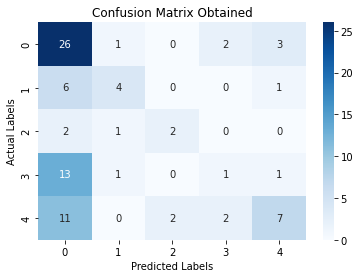

F1-score obtained is  0.3947
Precision obtained is  0.4606
Recall obtained is  0.3914
Classification Report obtained is :
              precision    recall  f1-score   support

           0       0.45      0.81      0.58        32
           1       0.57      0.36      0.44        11
           2       0.50      0.40      0.44         5
           3       0.20      0.06      0.10        16
           4       0.58      0.32      0.41        22

    accuracy                           0.47        86
   macro avg       0.46      0.39      0.39        86
weighted avg       0.46      0.47      0.42        86

Results when AdaBoost is used as Stacking Classifier


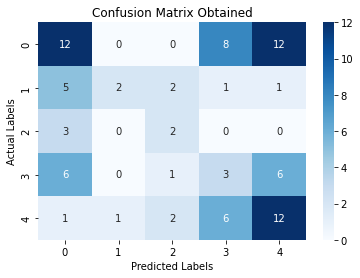

F1-score obtained is  0.331
Precision obtained is  0.3901
Recall obtained is  0.338
Classification Report obtained is :
              precision    recall  f1-score   support

           0       0.44      0.38      0.41        32
           1       0.67      0.18      0.29        11
           2       0.29      0.40      0.33         5
           3       0.17      0.19      0.18        16
           4       0.39      0.55      0.45        22

    accuracy                           0.36        86
   macro avg       0.39      0.34      0.33        86
weighted avg       0.40      0.36      0.36        86

[20:34:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Results when XGBoost is used as Stacking Classifier


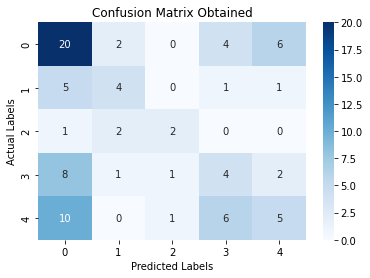

F1-score obtained is  0.3813
Precision obtained is  0.4046
Recall obtained is  0.3732
Classification Report obtained is :
              precision    recall  f1-score   support

           0       0.45      0.62      0.53        32
           1       0.44      0.36      0.40        11
           2       0.50      0.40      0.44         5
           3       0.27      0.25      0.26        16
           4       0.36      0.23      0.28        22

    accuracy                           0.41        86
   macro avg       0.40      0.37      0.38        86
weighted avg       0.40      0.41      0.39        86

Results when Gradient-Boosted Decision Tree is used as Stacking Classifier


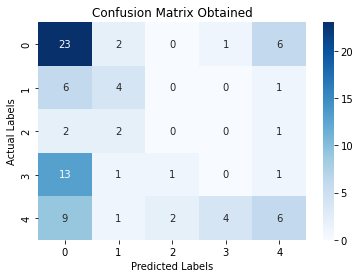

F1-score obtained is  0.2493
Precision obtained is  0.2468
Recall obtained is  0.271
Classification Report obtained is :
              precision    recall  f1-score   support

           0       0.43      0.72      0.54        32
           1       0.40      0.36      0.38        11
           2       0.00      0.00      0.00         5
           3       0.00      0.00      0.00        16
           4       0.40      0.27      0.32        22

    accuracy                           0.38        86
   macro avg       0.25      0.27      0.25        86
weighted avg       0.31      0.38      0.33        86

Results when Decision Tree is used as Stacking Classifier


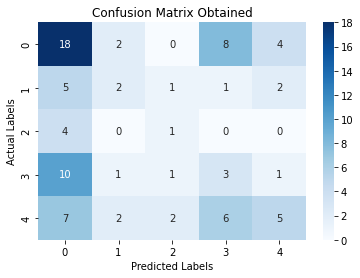

F1-score obtained is  0.2733
Precision obtained is  0.2956
Recall obtained is  0.2718
Classification Report obtained is :
              precision    recall  f1-score   support

           0       0.41      0.56      0.47        32
           1       0.29      0.18      0.22        11
           2       0.20      0.20      0.20         5
           3       0.17      0.19      0.18        16
           4       0.42      0.23      0.29        22

    accuracy                           0.34        86
   macro avg       0.30      0.27      0.27        86
weighted avg       0.34      0.34      0.32        86



,Classifier,f1-score,Precision,Recall
0,RandomForestClassifier - Stacking Classifier,0.3947,0.4606,0.3914
1,AdaBoostClassifier - Stacking Classifier,0.3310,0.3901,0.3380
2,XGBClassifier - Stacking Classifier,0.3813,0.4046,0.3732
3,GradientBoostingClassifier - Stacking Classifier,0.2493,0.2468,0.2710
4,DecisionTreeClassifier - Stacking Classifier,0.2733,0.2956,0.2718


In [75]:
stack_estimators = [dt_pca_pipeline,knn_pca_pipeline,svm_pca_pipeline,rf_pca_pipeline]
stack_estimators = {str(model)+"_pipeline" : estimator for estimator, model in zip(stack_estimators,["dt","knn","svm","rf"])}
print(stack_estimators)

stack_results = dict()
stack_results_table = []

from sklearn.base import clone
for model,model_name in zip([RandomForestClassifier(random_state=rs)],["Random Forest"]):
    stacking = StackingClassifier([(estName, clone(est)) for estName, est in stack_estimators.items()], model)
    stacking.fit(X_train, y_train)
    stack_results[f'{model.__class__.__name__}'+"_yPred"] = stacking.predict(X_test)
    stack_list = [f'{model.__class__.__name__}'+" - Stacking Classifier"]
    print("Results when {} is used as Stacking Classifier".format(model_name))
    stack_list.extend(print_metrics(y_test, stack_results[f'{model.__class__.__name__}'+"_yPred"], f'{model.__class__.__name__}'+" - Stacking Classifier"))
    stack_results_table.append(stack_list)
    rf_stacking = stacking
	
for model,model_name in zip([AdaBoostClassifier(random_state = rs)],["AdaBoost"]):
    stacking = StackingClassifier([(estName, clone(est)) for estName, est in stack_estimators.items()], model)
    stacking.fit(X_train, y_train)
    stack_results[f'{model.__class__.__name__}'+"_yPred"] = stacking.predict(X_test)
    stack_list = [f'{model.__class__.__name__}'+" - Stacking Classifier"]
    print("Results when {} is used as Stacking Classifier".format(model_name))
    stack_list.extend(print_metrics(y_test, stack_results[f'{model.__class__.__name__}'+"_yPred"], f'{model.__class__.__name__}'+" - Stacking Classifier"))
    stack_results_table.append(stack_list)
    adaboost_stacking = stacking

from xgboost import XGBClassifier
for model,model_name in zip([XGBClassifier(objective="binary:logistic", random_state=rs)],["XGBoost"]):
    stacking = StackingClassifier([(estName, clone(est)) for estName, est in stack_estimators.items()], model)
    stacking.fit(X_train, y_train)
    stack_results[f'{model.__class__.__name__}'+"_yPred"] = stacking.predict(X_test)
    stack_list = [f'{model.__class__.__name__}'+" - Stacking Classifier"]
    print("Results when {} is used as Stacking Classifier".format(model_name))
    stack_list.extend(print_metrics(y_test, stack_results[f'{model.__class__.__name__}'+"_yPred"], f'{model.__class__.__name__}'+" - Stacking Classifier"))
    stack_results_table.append(stack_list)
    xgboost_stacking = stacking

for model,model_name in zip([GradientBoostingClassifier(random_state = rs)],["Gradient-Boosted Decision Tree"]):
    stacking = StackingClassifier([(estName, clone(est)) for estName, est in stack_estimators.items()], model)
    stacking.fit(X_train, y_train)
    stack_results[f'{model.__class__.__name__}'+"_yPred"] = stacking.predict(X_test)
    stack_list = [f'{model.__class__.__name__}'+" - Stacking Classifier"]
    print("Results when {} is used as Stacking Classifier".format(model_name))
    stack_list.extend(print_metrics(y_test, stack_results[f'{model.__class__.__name__}'+"_yPred"], f'{model.__class__.__name__}'+" - Stacking Classifier"))
    stack_results_table.append(stack_list)
    gbdt_stacking = stacking

for model,model_name in zip([DecisionTreeClassifier(random_state=rs)],["Decision Tree"]):
    stacking = StackingClassifier([(estName, clone(est)) for estName, est in stack_estimators.items()], model)
    stacking.fit(X_train, y_train)
    stack_results[f'{model.__class__.__name__}'+"_yPred"] = stacking.predict(X_test)
    stack_list = [f'{model.__class__.__name__}'+" - Stacking Classifier"]
    print("Results when {} is used as Stacking Classifier".format(model_name))
    stack_list.extend(print_metrics(y_test, stack_results[f'{model.__class__.__name__}'+"_yPred"], f'{model.__class__.__name__}'+" - Stacking Classifier"))
    stack_results_table.append(stack_list)
    dt_stacking = stacking

stack_results_table

#Tabulating the obtained results and displaying the results by formatting
results_df = pd.DataFrame(stack_results_table,columns = ["Classifier","f1-score","Precision","Recall"])
with pd.option_context('display.precision', 4):
    formatted_table=(results_df.style.background_gradient(cmap ='Blues'))
formatted_table

{'rf_stack_pipeline': StackingClassifier(estimators=[('dt_pipeline',
                                Pipeline(steps=[('adasyn',
                                                 ADASYN(random_state=0)),
                                                ('pca',
                                                 PCA(n_components=18,
                                                     random_state=0)),
                                                ('dt',
                                                 DecisionTreeClassifier(criterion='entropy',
                                                                        max_depth=10,
                                                                        min_samples_leaf=5,
                                                                        random_state=0))])),
                               ('knn_pipeline',
                                Pipeline(steps=[('adasyn',
                                                 ADASYN(random_state=0)),
 

[20:38:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Results when {} is used as Voting Classifier


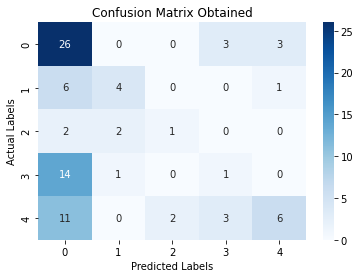

F1-score obtained is  0.3456
Precision obtained is  0.4177
Recall obtained is  0.3423
Classification Report obtained is :
              precision    recall  f1-score   support

           0       0.44      0.81      0.57        32
           1       0.57      0.36      0.44        11
           2       0.33      0.20      0.25         5
           3       0.14      0.06      0.09        16
           4       0.60      0.27      0.37        22

    accuracy                           0.44        86
   macro avg       0.42      0.34      0.35        86
weighted avg       0.44      0.44      0.40        86



In [76]:
stack_estimators = [rf_stacking,gbdt_stacking,adaboost_stacking,xgboost_stacking,dt_stacking]
stack_estimators = {str(model)+"_pipeline" : estimator for estimator, model in zip(stack_estimators,["rf_stack","gbdt_stack","adaboost_stack","xgboost_stack","dt_stack"])}
print(stack_estimators)

stack_results = dict()
stack_results_table = []
voting_classifier = VotingClassifier([(estName, clone(est)) for estName, est in stack_estimators.items()], voting='hard')
model = voting_classifier
voting_classifier.fit(X_train, y_train)
stack_results[f'{model.__class__.__name__}'+"_yPred"] = voting_classifier.predict(X_test)
stack_list = [f'{model.__class__.__name__}'+" - Stacking Classifier"]
print("Results when {} is used as Voting Classifier")
stack_list.extend(print_metrics(y_test, stack_results[f'{model.__class__.__name__}'+"_yPred"], f'{model.__class__.__name__}'+" - Stacking Classifier"))
stack_results_table.append(stack_list)

{'rf_stack_pipeline': StackingClassifier(estimators=[('dt_pipeline',
                                Pipeline(steps=[('adasyn',
                                                 ADASYN(random_state=0)),
                                                ('pca',
                                                 PCA(n_components=18,
                                                     random_state=0)),
                                                ('dt',
                                                 DecisionTreeClassifier(criterion='entropy',
                                                                        max_depth=10,
                                                                        min_samples_leaf=5,
                                                                        random_state=0))])),
                               ('knn_pipeline',
                                Pipeline(steps=[('adasyn',
                                                 ADASYN(random_state=0)),
 

[20:42:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Results when {} is used as Voting Classifier


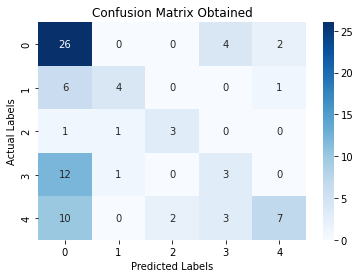

F1-score obtained is  0.4673
Precision obtained is  0.5479
Recall obtained is  0.4564
Classification Report obtained is :
              precision    recall  f1-score   support

           0       0.47      0.81      0.60        32
           1       0.67      0.36      0.47        11
           2       0.60      0.60      0.60         5
           3       0.30      0.19      0.23        16
           4       0.70      0.32      0.44        22

    accuracy                           0.50        86
   macro avg       0.55      0.46      0.47        86
weighted avg       0.53      0.50      0.47        86



In [77]:
stack_estimators = [rf_stacking,gbdt_stacking,adaboost_stacking,xgboost_stacking,dt_stacking,dt_pca_pipeline,knn_pca_pipeline,svm_pca_pipeline,rf_pca_pipeline]
stack_estimators = {str(model)+"_pipeline" : estimator for estimator, model in zip(stack_estimators,["rf_stack","gbdt_stack","adaboost_stack","xgboost_stack","dt_stack","dt","knn","svm","rf"])}
print(stack_estimators)

stack_results = dict()
stack_results_table = []
voting_classifier = VotingClassifier([(estName, clone(est)) for estName, est in stack_estimators.items()], voting='hard')
model = voting_classifier
voting_classifier.fit(X_train, y_train)
stack_results[f'{model.__class__.__name__}'+"_yPred"] = voting_classifier.predict(X_test)
stack_list = [f'{model.__class__.__name__}'+" - Stacking Classifier"]
print("Results when {} is used as Voting Classifier")
stack_list.extend(print_metrics(y_test, stack_results[f'{model.__class__.__name__}'+"_yPred"], f'{model.__class__.__name__}'+" - Stacking Classifier"))
stack_results_table.append(stack_list)

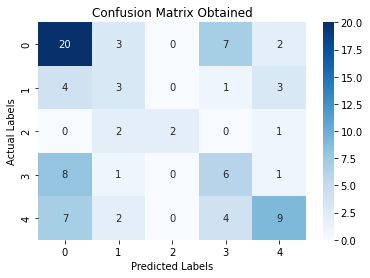

F1-score obtained is  0.4468
Precision obtained is  0.5363
Recall obtained is  0.4164
Classification Report obtained is :
              precision    recall  f1-score   support

           0       0.51      0.62      0.56        32
           1       0.27      0.27      0.27        11
           2       1.00      0.40      0.57         5
           3       0.33      0.38      0.35        16
           4       0.56      0.41      0.47        22

    accuracy                           0.47        86
   macro avg       0.54      0.42      0.45        86
weighted avg       0.49      0.47      0.46        86



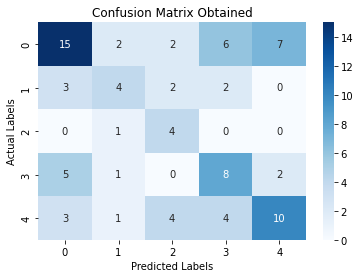

F1-score obtained is  0.464
Precision obtained is  0.4562
Recall obtained is  0.5174
Classification Report obtained is :
              precision    recall  f1-score   support

           0       0.58      0.47      0.52        32
           1       0.44      0.36      0.40        11
           2       0.33      0.80      0.47         5
           3       0.40      0.50      0.44        16
           4       0.53      0.45      0.49        22

    accuracy                           0.48        86
   macro avg       0.46      0.52      0.46        86
weighted avg       0.50      0.48      0.48        86



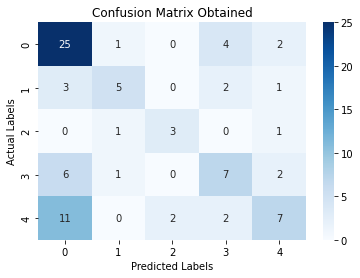

F1-score obtained is  0.5255
Precision obtained is  0.5571
Recall obtained is  0.5183
Classification Report obtained is :
              precision    recall  f1-score   support

           0       0.56      0.78      0.65        32
           1       0.62      0.45      0.53        11
           2       0.60      0.60      0.60         5
           3       0.47      0.44      0.45        16
           4       0.54      0.32      0.40        22

    accuracy                           0.55        86
   macro avg       0.56      0.52      0.53        86
weighted avg       0.55      0.55      0.53        86



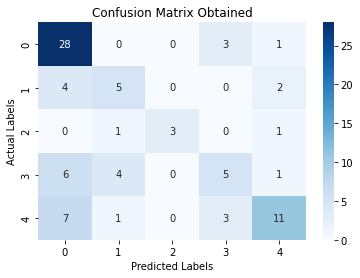

F1-score obtained is  0.5762
Precision obtained is  0.6438
Recall obtained is  0.5484
Classification Report obtained is :
              precision    recall  f1-score   support

           0       0.62      0.88      0.73        32
           1       0.45      0.45      0.45        11
           2       1.00      0.60      0.75         5
           3       0.45      0.31      0.37        16
           4       0.69      0.50      0.58        22

    accuracy                           0.60        86
   macro avg       0.64      0.55      0.58        86
weighted avg       0.61      0.60      0.59        86



,Classifier,f1-score,Precision,Recall
0,Decision Tree - After Hyperparameter Tuning and Feature Selection based on PCA,0.4468,0.5363,0.4164
1,KNN ADASYN- After Hyperparameter Tuning and Feature Selection based on PCA,0.4640,0.4562,0.5174
2,SVM - After Hyperparameter Tuning and Feature Selection based on PCA,0.5255,0.5571,0.5183
3,RF ADASYN- After Hyperparameter Tuning and Feature Selection based on PCA,0.5762,0.6438,0.5484


In [80]:
best_results_table = []

dt = DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=10, random_state=0)
pca = PCA(n_components=102,random_state=rs)
dt_pca_pipeline = Pipeline([('pca', pca), ('dt', dt)])
dt_pca_pipeline.fit(X_train,y_train)
dt_pca_pipeline_yPred = dt_pca_pipeline.predict(X_test)
dt_list = ["Decision Tree - After Hyperparameter Tuning and Feature Selection based on PCA"]
dt_list.extend(print_metrics(y_test, dt_pca_pipeline_yPred,"Decision Tree - PCA"))
best_results_table.append(dt_list)

knn = KNeighborsClassifier(n_neighbors=1)
adasyn = ADASYN(random_state=rs)
pca = PCA(n_components=227,random_state=rs)
knn_pca_pipeline = Pipeline([('adasyn',adasyn),('pca', pca), ('knn', knn)])
knn_pca_pipeline.fit(X_train,y_train)
knn_pca_pipeline_yPred = knn_pca_pipeline.predict(X_test)
knn_list = ["KNN ADASYN- After Hyperparameter Tuning and Feature Selection based on PCA"]
knn_list.extend(print_metrics(y_test, knn_pca_pipeline_yPred,"KNN - PCA"))
best_results_table.append(knn_list)

svm = SVC(C=29.763514416313132, random_state=0)
pca = PCA(n_components=76,random_state=rs)
svm_pca_pipeline = Pipeline([('pca', pca), ('svm', svm)])
svm_pca_pipeline.fit(X_train,y_train)
svm_pca_pipeline_yPred = svm_pca_pipeline.predict(X_test)
svm_list = ["SVM - After Hyperparameter Tuning and Feature Selection based on PCA"]
svm_list.extend(print_metrics(y_test, svm_pca_pipeline_yPred,"SVM - PCA"))
best_results_table.append(svm_list)

rf = RandomForestClassifier(max_depth=20, n_estimators=80, random_state=0)
adasyn = ADASYN(random_state=rs)
pca = PCA(n_components=125,random_state=rs)
rf_pca_pipeline = Pipeline([('adasyn',adasyn),('pca', pca), ('rf', rf)])
rf_pca_pipeline.fit(X_train,y_train)
rf_pca_pipeline_yPred = rf_pca_pipeline.predict(X_test)
rf_list = ["RF ADASYN- After Hyperparameter Tuning and Feature Selection based on PCA"]
rf_list.extend(print_metrics(y_test, rf_pca_pipeline_yPred,"RF - PCA"))
best_results_table.append(rf_list)

best_results_table

#Tabulating the obtained results and displaying the results by formatting
results_df = pd.DataFrame(best_results_table,columns = ["Classifier","f1-score","Precision","Recall"])
with pd.option_context('display.precision', 4):
    formatted_table=(results_df.style.background_gradient(cmap ='Blues'))
formatted_table

{'dt_pipeline': Pipeline(steps=[('pca', PCA(n_components=102, random_state=0)),
                ('dt',
                 DecisionTreeClassifier(criterion='entropy', max_depth=5,
                                        min_samples_leaf=10, random_state=0))]), 'knn_pipeline': Pipeline(steps=[('adasyn', ADASYN(random_state=0)),
                ('pca', PCA(n_components=227, random_state=0)),
                ('knn', KNeighborsClassifier(n_neighbors=1))]), 'svm_pipeline': Pipeline(steps=[('pca', PCA(n_components=76, random_state=0)),
                ('svm', SVC(C=29.763514416313132, random_state=0))]), 'rf_pipeline': Pipeline(steps=[('adasyn', ADASYN(random_state=0)),
                ('pca', PCA(n_components=125, random_state=0)),
                ('rf',
                 RandomForestClassifier(max_depth=20, n_estimators=80,
                                        random_state=0))])}
Results when {} is used as Voting Classifier


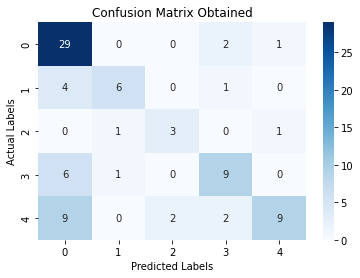

F1-score obtained is  0.6204
Precision obtained is  0.683
Recall obtained is  0.6047
Classification Report obtained is :
              precision    recall  f1-score   support

           0       0.60      0.91      0.72        32
           1       0.75      0.55      0.63        11
           2       0.60      0.60      0.60         5
           3       0.64      0.56      0.60        16
           4       0.82      0.41      0.55        22

    accuracy                           0.65        86
   macro avg       0.68      0.60      0.62        86
weighted avg       0.68      0.65      0.64        86



In [81]:
stack_estimators = [dt_pca_pipeline,knn_pca_pipeline,svm_pca_pipeline,rf_pca_pipeline]
stack_estimators = {str(model)+"_pipeline" : estimator for estimator, model in zip(stack_estimators,["dt","knn","svm","rf"])}
print(stack_estimators)

stack_results = dict()
stack_results_table = []
voting_classifier = VotingClassifier([(estName, clone(est)) for estName, est in stack_estimators.items()], voting='hard')
model = voting_classifier
voting_classifier.fit(X_train, y_train)
stack_results[f'{model.__class__.__name__}'+"_yPred"] = voting_classifier.predict(X_test)
stack_list = [f'{model.__class__.__name__}'+" - Stacking Classifier"]
print("Results when {} is used as Voting Classifier")
stack_list.extend(print_metrics(y_test, stack_results[f'{model.__class__.__name__}'+"_yPred"], f'{model.__class__.__name__}'+" - Stacking Classifier"))
stack_results_table.append(stack_list)

{'dt_pipeline': Pipeline(steps=[('pca', PCA(n_components=102, random_state=0)),
                ('dt',
                 DecisionTreeClassifier(criterion='entropy', max_depth=5,
                                        min_samples_leaf=10, random_state=0))]), 'knn_pipeline': Pipeline(steps=[('adasyn', ADASYN(random_state=0)),
                ('pca', PCA(n_components=227, random_state=0)),
                ('knn', KNeighborsClassifier(n_neighbors=1))]), 'svm_pipeline': Pipeline(steps=[('pca', PCA(n_components=76, random_state=0)),
                ('svm', SVC(C=29.763514416313132, random_state=0))]), 'rf_pipeline': Pipeline(steps=[('adasyn', ADASYN(random_state=0)),
                ('pca', PCA(n_components=125, random_state=0)),
                ('rf',
                 RandomForestClassifier(max_depth=20, n_estimators=80,
                                        random_state=0))])}
Results when Random Forest is used as Stacking Classifier


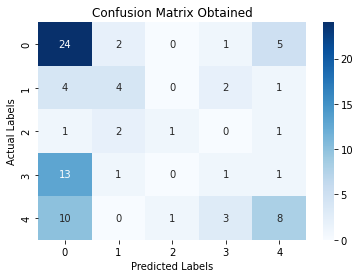

F1-score obtained is  0.353
Precision obtained is  0.4098
Recall obtained is  0.348
Classification Report obtained is :
              precision    recall  f1-score   support

           0       0.46      0.75      0.57        32
           1       0.44      0.36      0.40        11
           2       0.50      0.20      0.29         5
           3       0.14      0.06      0.09        16
           4       0.50      0.36      0.42        22

    accuracy                           0.44        86
   macro avg       0.41      0.35      0.35        86
weighted avg       0.41      0.44      0.40        86

Results when AdaBoost is used as Stacking Classifier


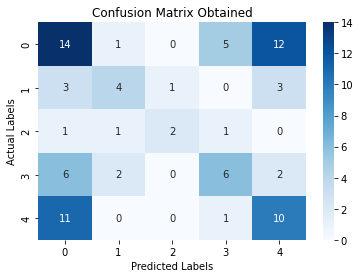

F1-score obtained is  0.4322
Precision obtained is  0.4797
Recall obtained is  0.4061
Classification Report obtained is :
              precision    recall  f1-score   support

           0       0.40      0.44      0.42        32
           1       0.50      0.36      0.42        11
           2       0.67      0.40      0.50         5
           3       0.46      0.38      0.41        16
           4       0.37      0.45      0.41        22

    accuracy                           0.42        86
   macro avg       0.48      0.41      0.43        86
weighted avg       0.43      0.42      0.42        86

[20:51:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Results when XGBoost is used as Stacking Classifier


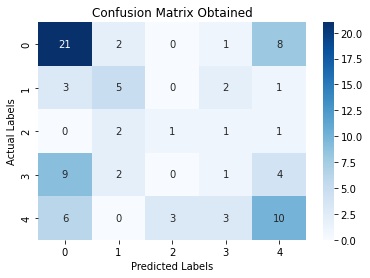

F1-score obtained is  0.3573
Precision obtained is  0.3569
Recall obtained is  0.3656
Classification Report obtained is :
              precision    recall  f1-score   support

           0       0.54      0.66      0.59        32
           1       0.45      0.45      0.45        11
           2       0.25      0.20      0.22         5
           3       0.12      0.06      0.08        16
           4       0.42      0.45      0.43        22

    accuracy                           0.44        86
   macro avg       0.36      0.37      0.36        86
weighted avg       0.40      0.44      0.42        86

Results when Gradient-Boosted Decision Tree is used as Stacking Classifier


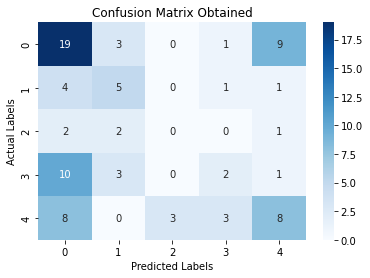

F1-score obtained is  0.2956
Precision obtained is  0.3024
Recall obtained is  0.3074
Classification Report obtained is :
              precision    recall  f1-score   support

           0       0.44      0.59      0.51        32
           1       0.38      0.45      0.42        11
           2       0.00      0.00      0.00         5
           3       0.29      0.12      0.17        16
           4       0.40      0.36      0.38        22

    accuracy                           0.40        86
   macro avg       0.30      0.31      0.30        86
weighted avg       0.37      0.40      0.37        86

Results when Decision Tree is used as Stacking Classifier


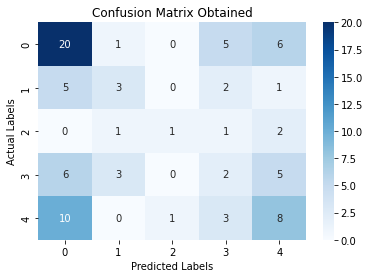

F1-score obtained is  0.3302
Precision obtained is  0.3761
Recall obtained is  0.3173
Classification Report obtained is :
              precision    recall  f1-score   support

           0       0.49      0.62      0.55        32
           1       0.38      0.27      0.32        11
           2       0.50      0.20      0.29         5
           3       0.15      0.12      0.14        16
           4       0.36      0.36      0.36        22

    accuracy                           0.40        86
   macro avg       0.38      0.32      0.33        86
weighted avg       0.38      0.40      0.38        86



,Classifier,f1-score,Precision,Recall
0,RandomForestClassifier - Stacking Classifier,0.3530,0.4098,0.3480
1,AdaBoostClassifier - Stacking Classifier,0.4322,0.4797,0.4061
2,XGBClassifier - Stacking Classifier,0.3573,0.3569,0.3656
3,GradientBoostingClassifier - Stacking Classifier,0.2956,0.3024,0.3074
4,DecisionTreeClassifier - Stacking Classifier,0.3302,0.3761,0.3173


In [82]:
stack_estimators = [dt_pca_pipeline,knn_pca_pipeline,svm_pca_pipeline,rf_pca_pipeline]
stack_estimators = {str(model)+"_pipeline" : estimator for estimator, model in zip(stack_estimators,["dt","knn","svm","rf"])}
print(stack_estimators)

stack_results = dict()
stack_results_table = []

from sklearn.base import clone
for model,model_name in zip([RandomForestClassifier(random_state=rs)],["Random Forest"]):
    stacking = StackingClassifier([(estName, clone(est)) for estName, est in stack_estimators.items()], model)
    stacking.fit(X_train, y_train)
    stack_results[f'{model.__class__.__name__}'+"_yPred"] = stacking.predict(X_test)
    stack_list = [f'{model.__class__.__name__}'+" - Stacking Classifier"]
    print("Results when {} is used as Stacking Classifier".format(model_name))
    stack_list.extend(print_metrics(y_test, stack_results[f'{model.__class__.__name__}'+"_yPred"], f'{model.__class__.__name__}'+" - Stacking Classifier"))
    stack_results_table.append(stack_list)
    rf_stacking = stacking
	
for model,model_name in zip([AdaBoostClassifier(random_state = rs)],["AdaBoost"]):
    stacking = StackingClassifier([(estName, clone(est)) for estName, est in stack_estimators.items()], model)
    stacking.fit(X_train, y_train)
    stack_results[f'{model.__class__.__name__}'+"_yPred"] = stacking.predict(X_test)
    stack_list = [f'{model.__class__.__name__}'+" - Stacking Classifier"]
    print("Results when {} is used as Stacking Classifier".format(model_name))
    stack_list.extend(print_metrics(y_test, stack_results[f'{model.__class__.__name__}'+"_yPred"], f'{model.__class__.__name__}'+" - Stacking Classifier"))
    stack_results_table.append(stack_list)
    adaboost_stacking = stacking

from xgboost import XGBClassifier
for model,model_name in zip([XGBClassifier(objective="binary:logistic", random_state=rs)],["XGBoost"]):
    stacking = StackingClassifier([(estName, clone(est)) for estName, est in stack_estimators.items()], model)
    stacking.fit(X_train, y_train)
    stack_results[f'{model.__class__.__name__}'+"_yPred"] = stacking.predict(X_test)
    stack_list = [f'{model.__class__.__name__}'+" - Stacking Classifier"]
    print("Results when {} is used as Stacking Classifier".format(model_name))
    stack_list.extend(print_metrics(y_test, stack_results[f'{model.__class__.__name__}'+"_yPred"], f'{model.__class__.__name__}'+" - Stacking Classifier"))
    stack_results_table.append(stack_list)
    xgboost_stacking = stacking

for model,model_name in zip([GradientBoostingClassifier(random_state = rs)],["Gradient-Boosted Decision Tree"]):
    stacking = StackingClassifier([(estName, clone(est)) for estName, est in stack_estimators.items()], model)
    stacking.fit(X_train, y_train)
    stack_results[f'{model.__class__.__name__}'+"_yPred"] = stacking.predict(X_test)
    stack_list = [f'{model.__class__.__name__}'+" - Stacking Classifier"]
    print("Results when {} is used as Stacking Classifier".format(model_name))
    stack_list.extend(print_metrics(y_test, stack_results[f'{model.__class__.__name__}'+"_yPred"], f'{model.__class__.__name__}'+" - Stacking Classifier"))
    stack_results_table.append(stack_list)
    gbdt_stacking = stacking

for model,model_name in zip([DecisionTreeClassifier(random_state=rs)],["Decision Tree"]):
    stacking = StackingClassifier([(estName, clone(est)) for estName, est in stack_estimators.items()], model)
    stacking.fit(X_train, y_train)
    stack_results[f'{model.__class__.__name__}'+"_yPred"] = stacking.predict(X_test)
    stack_list = [f'{model.__class__.__name__}'+" - Stacking Classifier"]
    print("Results when {} is used as Stacking Classifier".format(model_name))
    stack_list.extend(print_metrics(y_test, stack_results[f'{model.__class__.__name__}'+"_yPred"], f'{model.__class__.__name__}'+" - Stacking Classifier"))
    stack_results_table.append(stack_list)
    dt_stacking = stacking

stack_results_table

#Tabulating the obtained results and displaying the results by formatting
results_df = pd.DataFrame(stack_results_table,columns = ["Classifier","f1-score","Precision","Recall"])
with pd.option_context('display.precision', 4):
    formatted_table=(results_df.style.background_gradient(cmap ='Blues'))
formatted_table

{'rf_stack_pipeline': StackingClassifier(estimators=[('dt_pipeline',
                                Pipeline(steps=[('pca',
                                                 PCA(n_components=102,
                                                     random_state=0)),
                                                ('dt',
                                                 DecisionTreeClassifier(criterion='entropy',
                                                                        max_depth=5,
                                                                        min_samples_leaf=10,
                                                                        random_state=0))])),
                               ('knn_pipeline',
                                Pipeline(steps=[('adasyn',
                                                 ADASYN(random_state=0)),
                                                ('pca',
                                                 PCA(n_components=227,
      

[20:55:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Results when {} is used as Voting Classifier


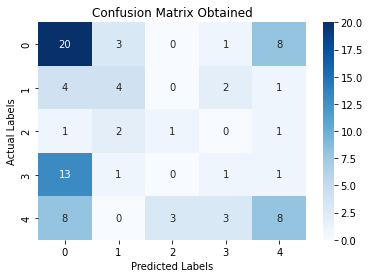

F1-score obtained is  0.3186
Precision obtained is  0.3297
Recall obtained is  0.323
Classification Report obtained is :
              precision    recall  f1-score   support

           0       0.43      0.62      0.51        32
           1       0.40      0.36      0.38        11
           2       0.25      0.20      0.22         5
           3       0.14      0.06      0.09        16
           4       0.42      0.36      0.39        22

    accuracy                           0.40        86
   macro avg       0.33      0.32      0.32        86
weighted avg       0.36      0.40      0.37        86



In [83]:
stack_estimators = [rf_stacking,gbdt_stacking,adaboost_stacking,xgboost_stacking,dt_stacking]
stack_estimators = {str(model)+"_pipeline" : estimator for estimator, model in zip(stack_estimators,["rf_stack","gbdt_stack","adaboost_stack","xgboost_stack","dt_stack"])}
print(stack_estimators)

stack_results = dict()
stack_results_table = []
voting_classifier = VotingClassifier([(estName, clone(est)) for estName, est in stack_estimators.items()], voting='hard')
model = voting_classifier
voting_classifier.fit(X_train, y_train)
stack_results[f'{model.__class__.__name__}'+"_yPred"] = voting_classifier.predict(X_test)
stack_list = [f'{model.__class__.__name__}'+" - Stacking Classifier"]
print("Results when {} is used as Voting Classifier")
stack_list.extend(print_metrics(y_test, stack_results[f'{model.__class__.__name__}'+"_yPred"], f'{model.__class__.__name__}'+" - Stacking Classifier"))
stack_results_table.append(stack_list)

{'rf_stack_pipeline': StackingClassifier(estimators=[('dt_pipeline',
                                Pipeline(steps=[('pca',
                                                 PCA(n_components=102,
                                                     random_state=0)),
                                                ('dt',
                                                 DecisionTreeClassifier(criterion='entropy',
                                                                        max_depth=5,
                                                                        min_samples_leaf=10,
                                                                        random_state=0))])),
                               ('knn_pipeline',
                                Pipeline(steps=[('adasyn',
                                                 ADASYN(random_state=0)),
                                                ('pca',
                                                 PCA(n_components=227,
      

[20:58:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Results when {} is used as Voting Classifier


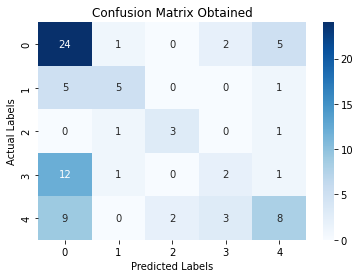

F1-score obtained is  0.4613
Precision obtained is  0.4981
Recall obtained is  0.4586
Classification Report obtained is :
              precision    recall  f1-score   support

           0       0.48      0.75      0.59        32
           1       0.62      0.45      0.53        11
           2       0.60      0.60      0.60         5
           3       0.29      0.12      0.17        16
           4       0.50      0.36      0.42        22

    accuracy                           0.49        86
   macro avg       0.50      0.46      0.46        86
weighted avg       0.47      0.49      0.46        86



In [84]:
stack_estimators = [rf_stacking,gbdt_stacking,adaboost_stacking,xgboost_stacking,dt_stacking,dt_pca_pipeline,knn_pca_pipeline,svm_pca_pipeline,rf_pca_pipeline]
stack_estimators = {str(model)+"_pipeline" : estimator for estimator, model in zip(stack_estimators,["rf_stack","gbdt_stack","adaboost_stack","xgboost_stack","dt_stack","dt","knn","svm","rf"])}
print(stack_estimators)

stack_results = dict()
stack_results_table = []
voting_classifier = VotingClassifier([(estName, clone(est)) for estName, est in stack_estimators.items()], voting='hard')
model = voting_classifier
voting_classifier.fit(X_train, y_train)
stack_results[f'{model.__class__.__name__}'+"_yPred"] = voting_classifier.predict(X_test)
stack_list = [f'{model.__class__.__name__}'+" - Stacking Classifier"]
print("Results when {} is used as Voting Classifier")
stack_list.extend(print_metrics(y_test, stack_results[f'{model.__class__.__name__}'+"_yPred"], f'{model.__class__.__name__}'+" - Stacking Classifier"))
stack_results_table.append(stack_list)